# Analyse Experiments Results

## Introduction
The results obtained from the three types of synthetic data (duplicate, synergy, complementary).

Comparison through all the different methods will be done (exact shap, contextcite, tmc, ...).

## Imports

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import string
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import random
import matplotlib
import re

## First Experiment Plots

### Variables

In [ ]:
available_models = {
    "qwen_3B": "Qwen/Qwen2.5-3B-Instruct",
    "llama_3B": "meta-llama/Llama-3.2-3B-Instruct",
    "llama_8B": "meta-llama/Llama-3.1-8B-Instruct",
    "mistral_7B": "mistralai/Mistral-7B-Instruct-v0.3",
}


model_name = "qwen_3B"


model_name = available_models[model_name].split("/")[1]

In [44]:
data_directory = f"../Experiment_data/NQ/{model_name}"

In [45]:
df = pd.read_csv(data_directory + "/SHUFFLE_shapley_rag_experiment_summary3bcp.csv")
df

Method  Avg_Pearson  ...  Avg_Reciprocal_rank  Num_Valid_Queries
0           TMC100     0.917091  ...             0.992500                100
1   ContextCite100     0.932253  ...             1.000000                100
2    ContextCite64     0.907917  ...             0.990000                100
3            TMC64     0.889329  ...             0.992500                100
4    ContextCite32     0.848475  ...             0.987500                100
5  BetaShap (U)100     0.751504  ...             0.985000                100
6            TMC32     0.800638  ...             0.995000                100
7   BetaShap (U)64     0.744609  ...             0.985000                100
8   BetaShap (U)32     0.692796  ...             0.990000                100
9              LOO     0.682210  ...             0.976667                100

[10 rows x 9 columns]

In [46]:
simple_model_name = "Qwen"
dataset_name = "NQ"

df_melted = df.melt(
    id_vars=["Method"], value_vars=df.columns[1:], var_name="metric", value_name="value"
)

df_melted["group"] = df_melted["Method"].apply(
    lambda x: "LOO" if x == "LOO" else re.findall(r"\d+", x)[0]
)
df_melted["category"] = df_melted["Method"].apply(
    lambda x: "LOO" if x == "LOO" else "".join(x.strip(re.findall(r"\d+", x)[0]))
)

plot_data = df_melted[df_melted.group != "LOO"]

methods = plot_data["category"].unique()
colors = sns.color_palette("husl", len(methods))
# for elem in zip(methods, colors):
#     print(elem)

df_melted

Method             metric       value group      category
0            TMC100        Avg_Pearson    0.917091   100           TMC
1    ContextCite100        Avg_Pearson    0.932253   100   ContextCite
2     ContextCite64        Avg_Pearson    0.907917    64   ContextCite
3             TMC64        Avg_Pearson    0.889329    64           TMC
4     ContextCite32        Avg_Pearson    0.848475    32   ContextCite
..              ...                ...         ...   ...           ...
75  BetaShap (U)100  Num_Valid_Queries  100.000000   100  BetaShap (U)
76            TMC32  Num_Valid_Queries  100.000000    32           TMC
77   BetaShap (U)64  Num_Valid_Queries  100.000000    64  BetaShap (U)
78   BetaShap (U)32  Num_Valid_Queries  100.000000    32  BetaShap (U)
79              LOO  Num_Valid_Queries  100.000000   LOO           LOO

[80 rows x 5 columns]

In [47]:
df_melted[df_melted.group == "64"].head()

Method        metric     value group      category
2    ContextCite64   Avg_Pearson  0.907917    64   ContextCite
3            TMC64   Avg_Pearson  0.889329    64           TMC
7   BetaShap (U)64   Avg_Pearson  0.744609    64  BetaShap (U)
12   ContextCite64  Avg_Spearman  0.751826    64   ContextCite
13           TMC64  Avg_Spearman  0.733333    64           TMC

In [48]:
df_melted[df_melted.group == "32"]

Method               metric       value group      category
4    ContextCite32          Avg_Pearson    0.848475    32   ContextCite
6            TMC32          Avg_Pearson    0.800638    32           TMC
8   BetaShap (U)32          Avg_Pearson    0.692796    32  BetaShap (U)
14   ContextCite32         Avg_Spearman    0.648528    32   ContextCite
16           TMC32         Avg_Spearman    0.599273    32           TMC
18  BetaShap (U)32         Avg_Spearman    0.488727    32  BetaShap (U)
24   ContextCite32          Avg_Kendall    0.525454    32   ContextCite
26           TMC32          Avg_Kendall    0.477778    32           TMC
28  BetaShap (U)32          Avg_Kendall    0.378667    32  BetaShap (U)
34   ContextCite32             Avg_NDCG    0.923493    32   ContextCite
36           TMC32             Avg_NDCG    0.889268    32           TMC
38  BetaShap (U)32             Avg_NDCG    0.832944    32  BetaShap (U)
44   ContextCite32   Avg_Precision_at_k    0.856667    32   ContextCite
46           TMC32   Avg_Precision_at_k    0.830000    32           TMC
48  BetaShap (U)32   Avg_Precision_at_k    0.796667    32  BetaShap (U)
54   ContextCite32    Avg_Hit_rate_at_k    0.990000    32   ContextCite
56           TMC32    Avg_Hit_rate_at_k    1.000000    32           TMC
58  BetaShap (U)32    Avg_Hit_rate_at_k    1.000000    32  BetaShap (U)
64   ContextCite32  Avg_Reciprocal_rank    0.987500    32   ContextCite
66           TMC32  Avg_Reciprocal_rank    0.995000    32           TMC
68  BetaShap (U)32  Avg_Reciprocal_rank    0.990000    32  BetaShap (U)
74   ContextCite32    Num_Valid_Queries  100.000000    32   ContextCite
76           TMC32    Num_Valid_Queries  100.000000    32           TMC
78  BetaShap (U)32    Num_Valid_Queries  100.000000    32  BetaShap (U)

### Line Chart

C:\Users\gabri\AppData\Local\Temp\ipykernel_24056\2040944507.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data.group = plot_data.group.astype(int)


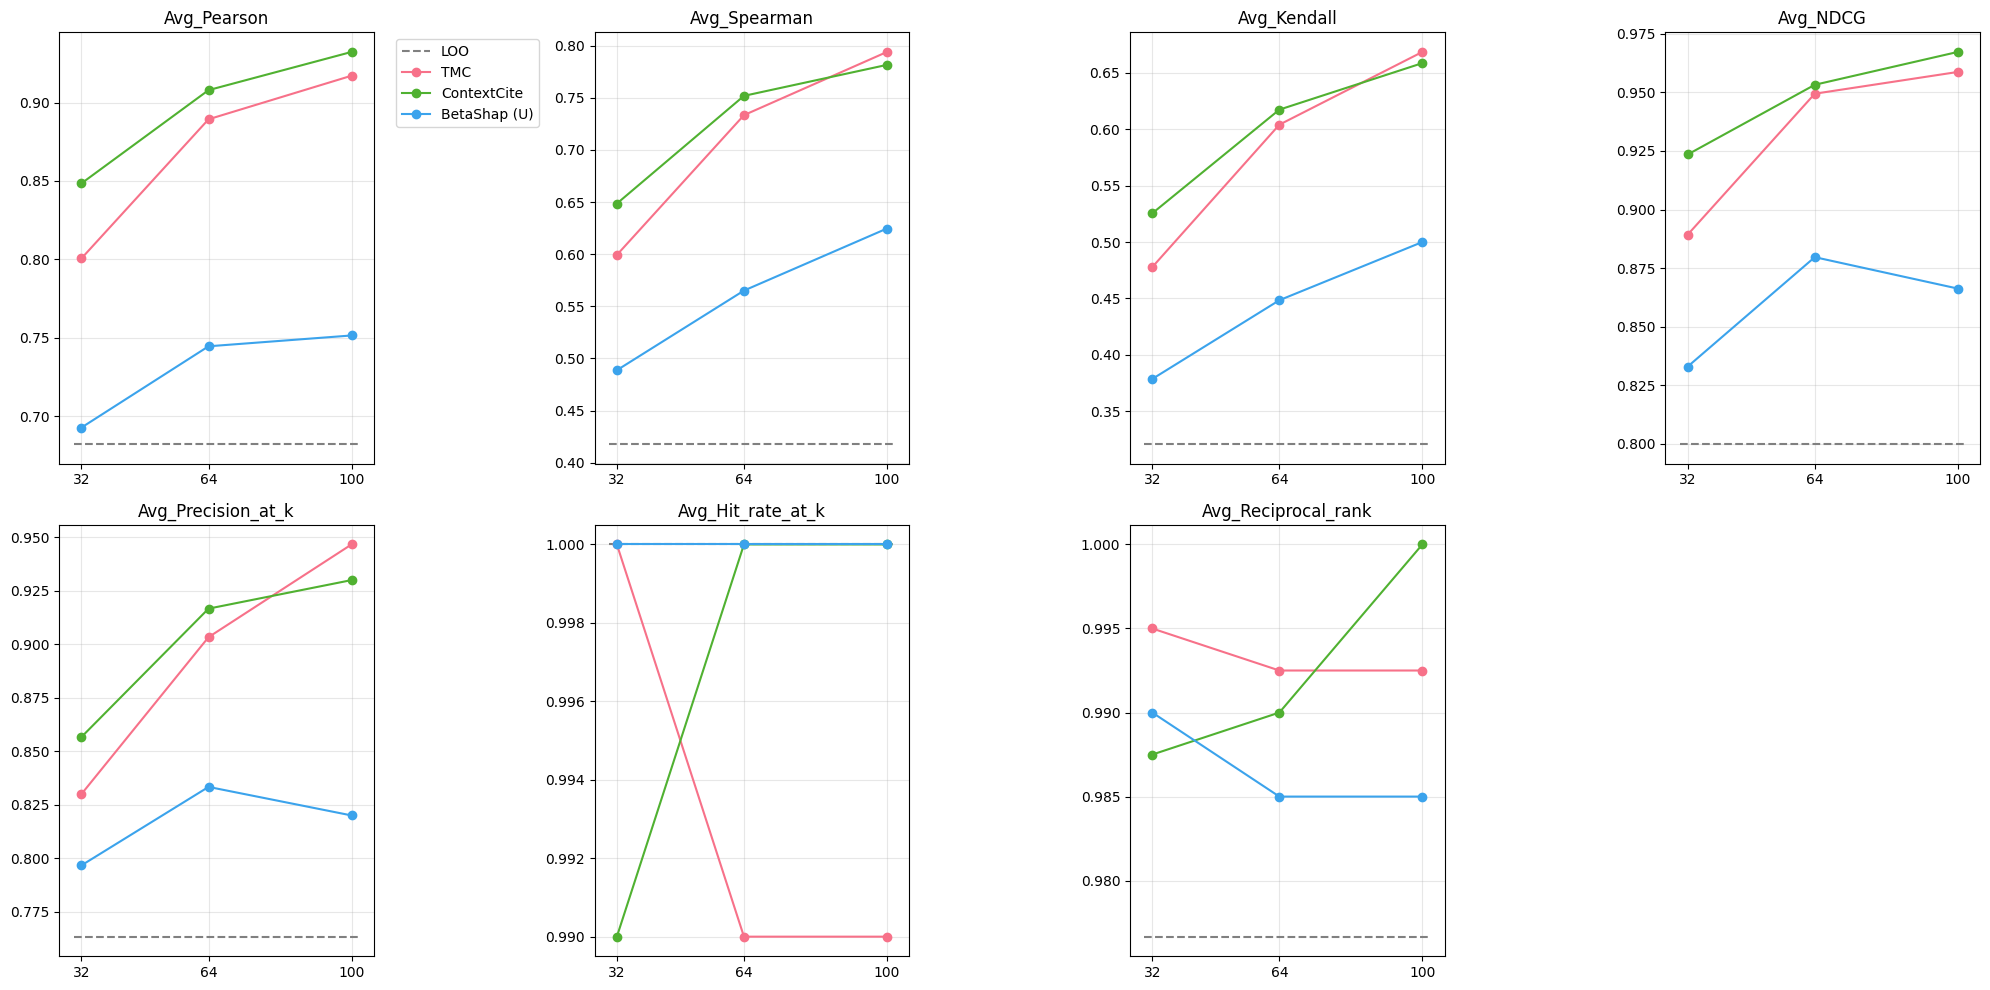

In [49]:
simple_model_name = "Qwen"
dataset_name = "NQ"

df_melted = df.melt(
    id_vars=["Method"], value_vars=df.columns[1:], var_name="metric", value_name="value"
)

df_melted["group"] = df_melted["Method"].apply(
    lambda x: "LOO" if x == "LOO" else re.findall(r"\d+", x)[0]
)
df_melted["category"] = df_melted["Method"].apply(
    lambda x: "LOO" if x == "LOO" else "".join(x.strip(re.findall(r"\d+", x)[0]))
)

plot_data = df_melted[df_melted.group != "LOO"]
loo_data = df_melted[df_melted.group == "LOO"]
plot_data.group = plot_data.group.astype(int)

methods = plot_data["category"].unique()
colors = sns.color_palette("husl", len(methods))
method_colors = dict(zip(methods, colors))
method_colors["LOO"] = "#808080"  # Gray for LOO

metrics = df.columns[1:-1]  # remove the Num querries column
n_cols = 4
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), squeeze=False)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

x_values = [32, 64, 100]

for i, metric in enumerate(metrics):
    ax = axes[i // n_cols, i % n_cols]
    metric_data = plot_data[plot_data["metric"] == metric]
    loo_value = loo_data[loo_data["metric"] == metric]["value"].values[0]
    ax.hlines(
        y=loo_value,
        xmin=30,
        xmax=102,
        colors=method_colors["LOO"],
        linestyles="--",
        label="LOO",
    )

    for method in methods:
        method_data = metric_data[metric_data["category"] == method]
        method_data = method_data.sort_values("group")

        ax.plot(
            x_values,
            method_data["value"],
            marker="o",
            color=method_colors[method],
            label=method,
        )

    ax.set_title(metric)
    ax.set_xlabel("")
    ax.set_ylabel("")
    # ax.set_ylim(0, 1)
    ax.set_xticks(x_values)
    ax.grid(True, alpha=0.3)

    # Only add legend to first subplot
    if i == 0:
        ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Remove empty subplots
for i in range(len(metrics), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

### Grouped Bar Chart

In [50]:
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

In [51]:
simple_model_name = "Qwen"
dataset_name = "NQ"

df_melted = df.melt(
    id_vars=["Method"], value_vars=df.columns[1:], var_name="metric", value_name="value"
)

df_melted["group"] = df_melted["Method"].apply(
    lambda x: "LOO" if x == "LOO" else re.findall(r"\d+", x)[0]
)
df_melted["category"] = df_melted["Method"].apply(
    lambda x: "LOO" if x == "LOO" else "".join(x.strip(re.findall(r"\d+", x)[0]))
)

categories = [c for c in df_melted["category"].unique() if c != "LOO"]
base_colors = sns.color_palette("husl", len(categories))
color_map = {"LOO": "#808080"}

for i, cat in enumerate(categories):
    base_color = base_colors[i]
    color_map.update(
        {
            f"{cat}32": sns.light_palette(base_color, n_colors=4)[1],  # Light Shade
            f"{cat}64": sns.light_palette(base_color, n_colors=4)[2],  # Medium Shade
            f"{cat}100": sns.light_palette(base_color, n_colors=4)[3],  # Dark Shade
        }
    )

metrics = df.columns[1:]
n_cols = 4
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20), squeeze=False)
fig.tight_layout(pad=5.0)

palette = {"LOO": "#808080", "32": "#1f77b4", "64": "#ff7f0e", "100": "#2ca02c"}

for i, metric in enumerate(metrics):

    ax = axes[i // n_cols, i % n_cols]

    data = df_melted[df_melted["metric"] == metric]

    loo_data = data[data["group"] == "LOO"]
    sns.barplot(data=loo_data, x="category", y="value", color=palette["LOO"], ax=ax)

    grouped_data = data[data["group"] != "LOO"]
    sns.barplot(
        data=grouped_data, x="category", y="value", hue="group", palette=palette, ax=ax
    )

    ax.set_title(f"Evaluation for {simple_model_name} for {dataset_name} dataset.")
    ax.set_xlabel("Methods")
    ax.set_ylabel(metric)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# REMOVE EMPTY SUBPLTOS
for i in range(len(metrics), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()


# df_melted

KeyboardInterrupt: 

In [ ]:
def plot_figures(df : pd.DataFrame) : 
    

## Load & Process Data

In [58]:
df

query  ...                              id
0       What is the traditional greeting in Blimpton?  ...  [A, B, C, D, E, F, G, H, I, J]
1       What is the traditional greeting in Blimpton?  ...  [B, A, C, D, E, F, G, H, I, J]
2       What is the traditional greeting in Blimpton?  ...  [A, J, C, D, E, F, G, H, I, B]
3   In the game of Gravity Chess, what does the 'I...  ...  [A, B, C, D, E, F, G, H, I, J]
4   In the game of Gravity Chess, what does the 'I...  ...  [B, A, C, D, E, F, G, H, I, J]
5   In the game of Gravity Chess, what does the 'I...  ...  [A, J, C, D, E, F, G, H, I, B]
6      What is the gestation period of a Cloud Whale?  ...  [A, B, C, D, E, F, G, H, I, J]
7      What is the gestation period of a Cloud Whale?  ...  [B, A, C, D, E, F, G, H, I, J]
8      What is the gestation period of a Cloud Whale?  ...  [A, J, C, D, E, F, G, H, I, B]
9   What special abilities do the Gleepglorp and t...  ...  [A, B, C, D, E, F, G, H, I, J]
10  What special abilities do the Gleepglorp and t...  ...  [B, A, C, D, E, F, G, H, I, J]
11  What special abilities do the Gleepglorp and t...  ...  [A, J, C, D, E, F, G, H, I, B]
12  What are the two fundamental components of Ast...  ...  [A, B, C, D, E, F, G, H, I, J]
13  What are the two fundamental components of Ast...  ...  [B, A, C, D, E, F, G, H, I, J]
14  What are the two fundamental components of Ast...  ...  [A, J, C, D, E, F, G, H, I, B]
15  What two functions does the Mystic 'Dream-Weav...  ...  [A, B, C, D, E, F, G, H, I, J]
16  What two functions does the Mystic 'Dream-Weav...  ...  [B, A, C, D, E, F, G, H, I, J]
17  What two functions does the Mystic 'Dream-Weav...  ...  [A, J, C, D, E, F, G, H, I, B]
18  What is the effect of drinking water from the ...  ...  [A, B, C, D, E, F, G, H, I, J]
19  What is the effect of drinking water from the ...  ...  [B, A, C, D, E, F, G, H, I, J]
20  What is the effect of drinking water from the ...  ...  [A, J, C, D, E, F, G, H, I, B]
21  What is the salary of the most popular actor o...  ...  [A, B, C, D, E, F, G, H, I, J]
22  What is the salary of the most popular actor o...  ...  [B, A, C, D, E, F, G, H, I, J]
23  What is the salary of the most popular actor o...  ...  [A, J, C, D, E, F, G, H, I, B]
24  What is the population of the smallest planet ...  ...  [A, B, C, D, E, F, G, H, I, J]
25  What is the population of the smallest planet ...  ...  [B, A, C, D, E, F, G, H, I, J]
26  What is the population of the smallest planet ...  ...  [A, J, C, D, E, F, G, H, I, B]

[27 rows x 5 columns]

In [ ]:
df = pd.read_csv(f'mistral7B.csv')
eval(df.context.loc[0])[0][0]

df.context = df.context.apply(lambda x: eval(x)[0][0])
df.id = df.id.apply(lambda x: eval(x)[0][0])

# df["sample_size"] = df.Method.apply(lambda x: re.findall(r"\d+", x)[0]) 
# df = df[(df["sample_size"] == "64") | ((df["Method"].isin(["LOO", "Exact"])))]

select_keys = ["LOO", "Exact", "ContextCite64", "KernelShap64", "BetaShap (U)64", "TMC64"]

scores_agg = {}
for i in range(df.shape[0]): 
    scores_agg[i] = eval(df.scoring.loc[i].replace("array", ""))[0]
new_scores ={}

for i in scores_agg.keys():
    for method in scores_agg[i].keys():
        if method in select_keys:
            new_scores[i] = 



In [60]:
scores_agg

{0: {'Exact': [47.34445599,
   34.4357185,
   0.054824,
   -0.78222324,
   0.51143896,
   1.23542395,
   0.08384098,
   1.04950153,
   0.4861426,
   0.73990719],
  'ContextCite32': [75.07898211,
   32.74893029,
   0.35259531,
   -6.7046341,
   -1.27815756,
   3.26138206,
   2.70540457,
   -2.9268823,
   -4.46874769,
   4.92058847],
  'KernelShap32': [49.39414729,
   31.94599648,
   -14.37419178,
   2.271652,
   6.18122166,
   18.15525029,
   -0.93664329,
   -0.15418275,
   -0.21903355,
   -0.21133316],
  'BetaShap (U)32': [87.3456741,
   71.0090421,
   -0.176174617,
   2.91074784,
   -0.456226251,
   0.511416244,
   -0.460277461,
   0.5362797,
   0.0851353634,
   -0.360949889],
  'TMC32': [49.62410009,
   34.22280774,
   -0.14513222,
   1.18242902,
   -0.42370486,
   0.13951045,
   -0.42725531,
   1.14764007,
   0.07843773,
   -0.33728382],
  'ContextCite64': [58.7338862,
   39.2893305,
   2.89164649,
   1.33172438,
   -4.89240239,
   0.00941472329,
   0.488789259,
   3.1378882,
   -1.

In [ ]:
def load_and_process(data_type: str):
    df = pd.read_csv(f"mistral7B.csv")
    # df.drop(columns = "doc_flags", inplace=True)
    df_ref = pd.read_csv(f"../data/synthetic_data/{data_type}.csv")

    df_ref.rename(columns={"question": "query"}, inplace=True)
    df.context = df.context.apply(lambda x: eval(x)[0][0])
    df = df.merge(df_ref[["query", "answer"]], how="left", on="query")[
        ["query", "context", "answer", "provided_answer", "scoring"]
    ]

    scores_agg = {}
    for i in range(df.shape[0]):
        scores_agg[i] = eval(df.scoring.loc[i].replace("array", ""))[0]

    return df, scores_agg

In [ ]:
def compute_cosine_similarity(row, embedding_model):
    embeddings = embedding_model.encode([row["answer"], row["provided_answer"]])
    return cosine_similarity([embeddings[0], embeddings[1]])[0][1]

In [ ]:
def plot_scoring_per_query(results: dict, query_id: int, dataset: pd.DataFrame):


    fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20), squeeze=False)

    fig.tight_layout(pad=4.0)
    axes = axes.flatten()

    # fig.text(0.5, 0.02, f"Similarity Score: {dataset.loc[query_id, "similarity_score"]: .3f}",

    #         fontweight="bold",

    #          ha = "center", fontsize = 13, bbox=dict(facecolor="white", alpha=0.8))

    for i, (key, values) in enumerate(results.items()):

        indices = dataset.loc[query_id].id


        bars = axes[i].bar(range(10), values)  # get the current subplot axis


        for j, bar in enumerate(bars):

            if indices[j] == "A":
                bar.set_color("green")
            elif indices[j] == "B":

                bar.set_color("blue")
            else:

                bar.set_color("gray")


        # for j, (val, score) in enumerate(zip(values, dataset['similarity_score'])):

        axes[i].set_title(key)

        axes[i].set_xlabel("Document Index")

        axes[i].set_ylabel("Attribution Scores")

        axes[i].grid(True, axis="y", linestyle="--", alpha=0.7)

    if 0 <= query_id < 9:
        if query_id % 3 == 0:
            fig.suptitle("DUPLICATE AB", fontsize="xx-large", y=1)
        elif query_id % 3 == 1:
            fig.suptitle("DUPLICATE BA", fontsize="xx-large", y=1)
        else:
            fig.suptitle("DUPLICATE A...B", fontsize="xx-large", y=1)

    elif 9 <= query_id < 18:
        if query_id % 3 == 0:
            fig.suptitle("COMPLEMENTARY AB", fontsize="xx-large", y=1)
        elif query_id % 3 == 1:
            fig.suptitle("COMPLEMENTARY BA", fontsize="xx-large", y=1)
        else:
            fig.suptitle("COMPLEMENTARY A...B", fontsize="xx-large", y=1)
    else:
        if query_id % 3 == 0:
            fig.suptitle("SYNERGY AB", fontsize="xx-large", y=1)
        elif query_id % 3 == 1:
            fig.suptitle("SYNERGY BA", fontsize="xx-large", y=1)
        else:
            fig.suptitle("SYNERGY A...B", fontsize="xx-large", y=1)


    plt.tight_layout()

    plt.savefig(f"plots/Query_{query_id}.png")

    plt.show()

    plt.close()

In [23]:
scores_agg[0]

{'Exact': [47.34445599,
  34.4357185,
  0.054824,
  -0.78222324,
  0.51143896,
  1.23542395,
  0.08384098,
  1.04950153,
  0.4861426,
  0.73990719],
 'ContextCite32': [75.07898211,
  32.74893029,
  0.35259531,
  -6.7046341,
  -1.27815756,
  3.26138206,
  2.70540457,
  -2.9268823,
  -4.46874769,
  4.92058847],
 'KernelShap32': [49.39414729,
  31.94599648,
  -14.37419178,
  2.271652,
  6.18122166,
  18.15525029,
  -0.93664329,
  -0.15418275,
  -0.21903355,
  -0.21133316],
 'BetaShap (U)32': [87.3456741,
  71.0090421,
  -0.176174617,
  2.91074784,
  -0.456226251,
  0.511416244,
  -0.460277461,
  0.5362797,
  0.0851353634,
  -0.360949889],
 'TMC32': [49.62410009,
  34.22280774,
  -0.14513222,
  1.18242902,
  -0.42370486,
  0.13951045,
  -0.42725531,
  1.14764007,
  0.07843773,
  -0.33728382],
 'ContextCite64': [58.7338862,
  39.2893305,
  2.89164649,
  1.33172438,
  -4.89240239,
  0.00941472329,
  0.488789259,
  3.1378882,
  -1.65108903,
  4.15623395],
 'KernelShap64': [48.48662279,
  37.2

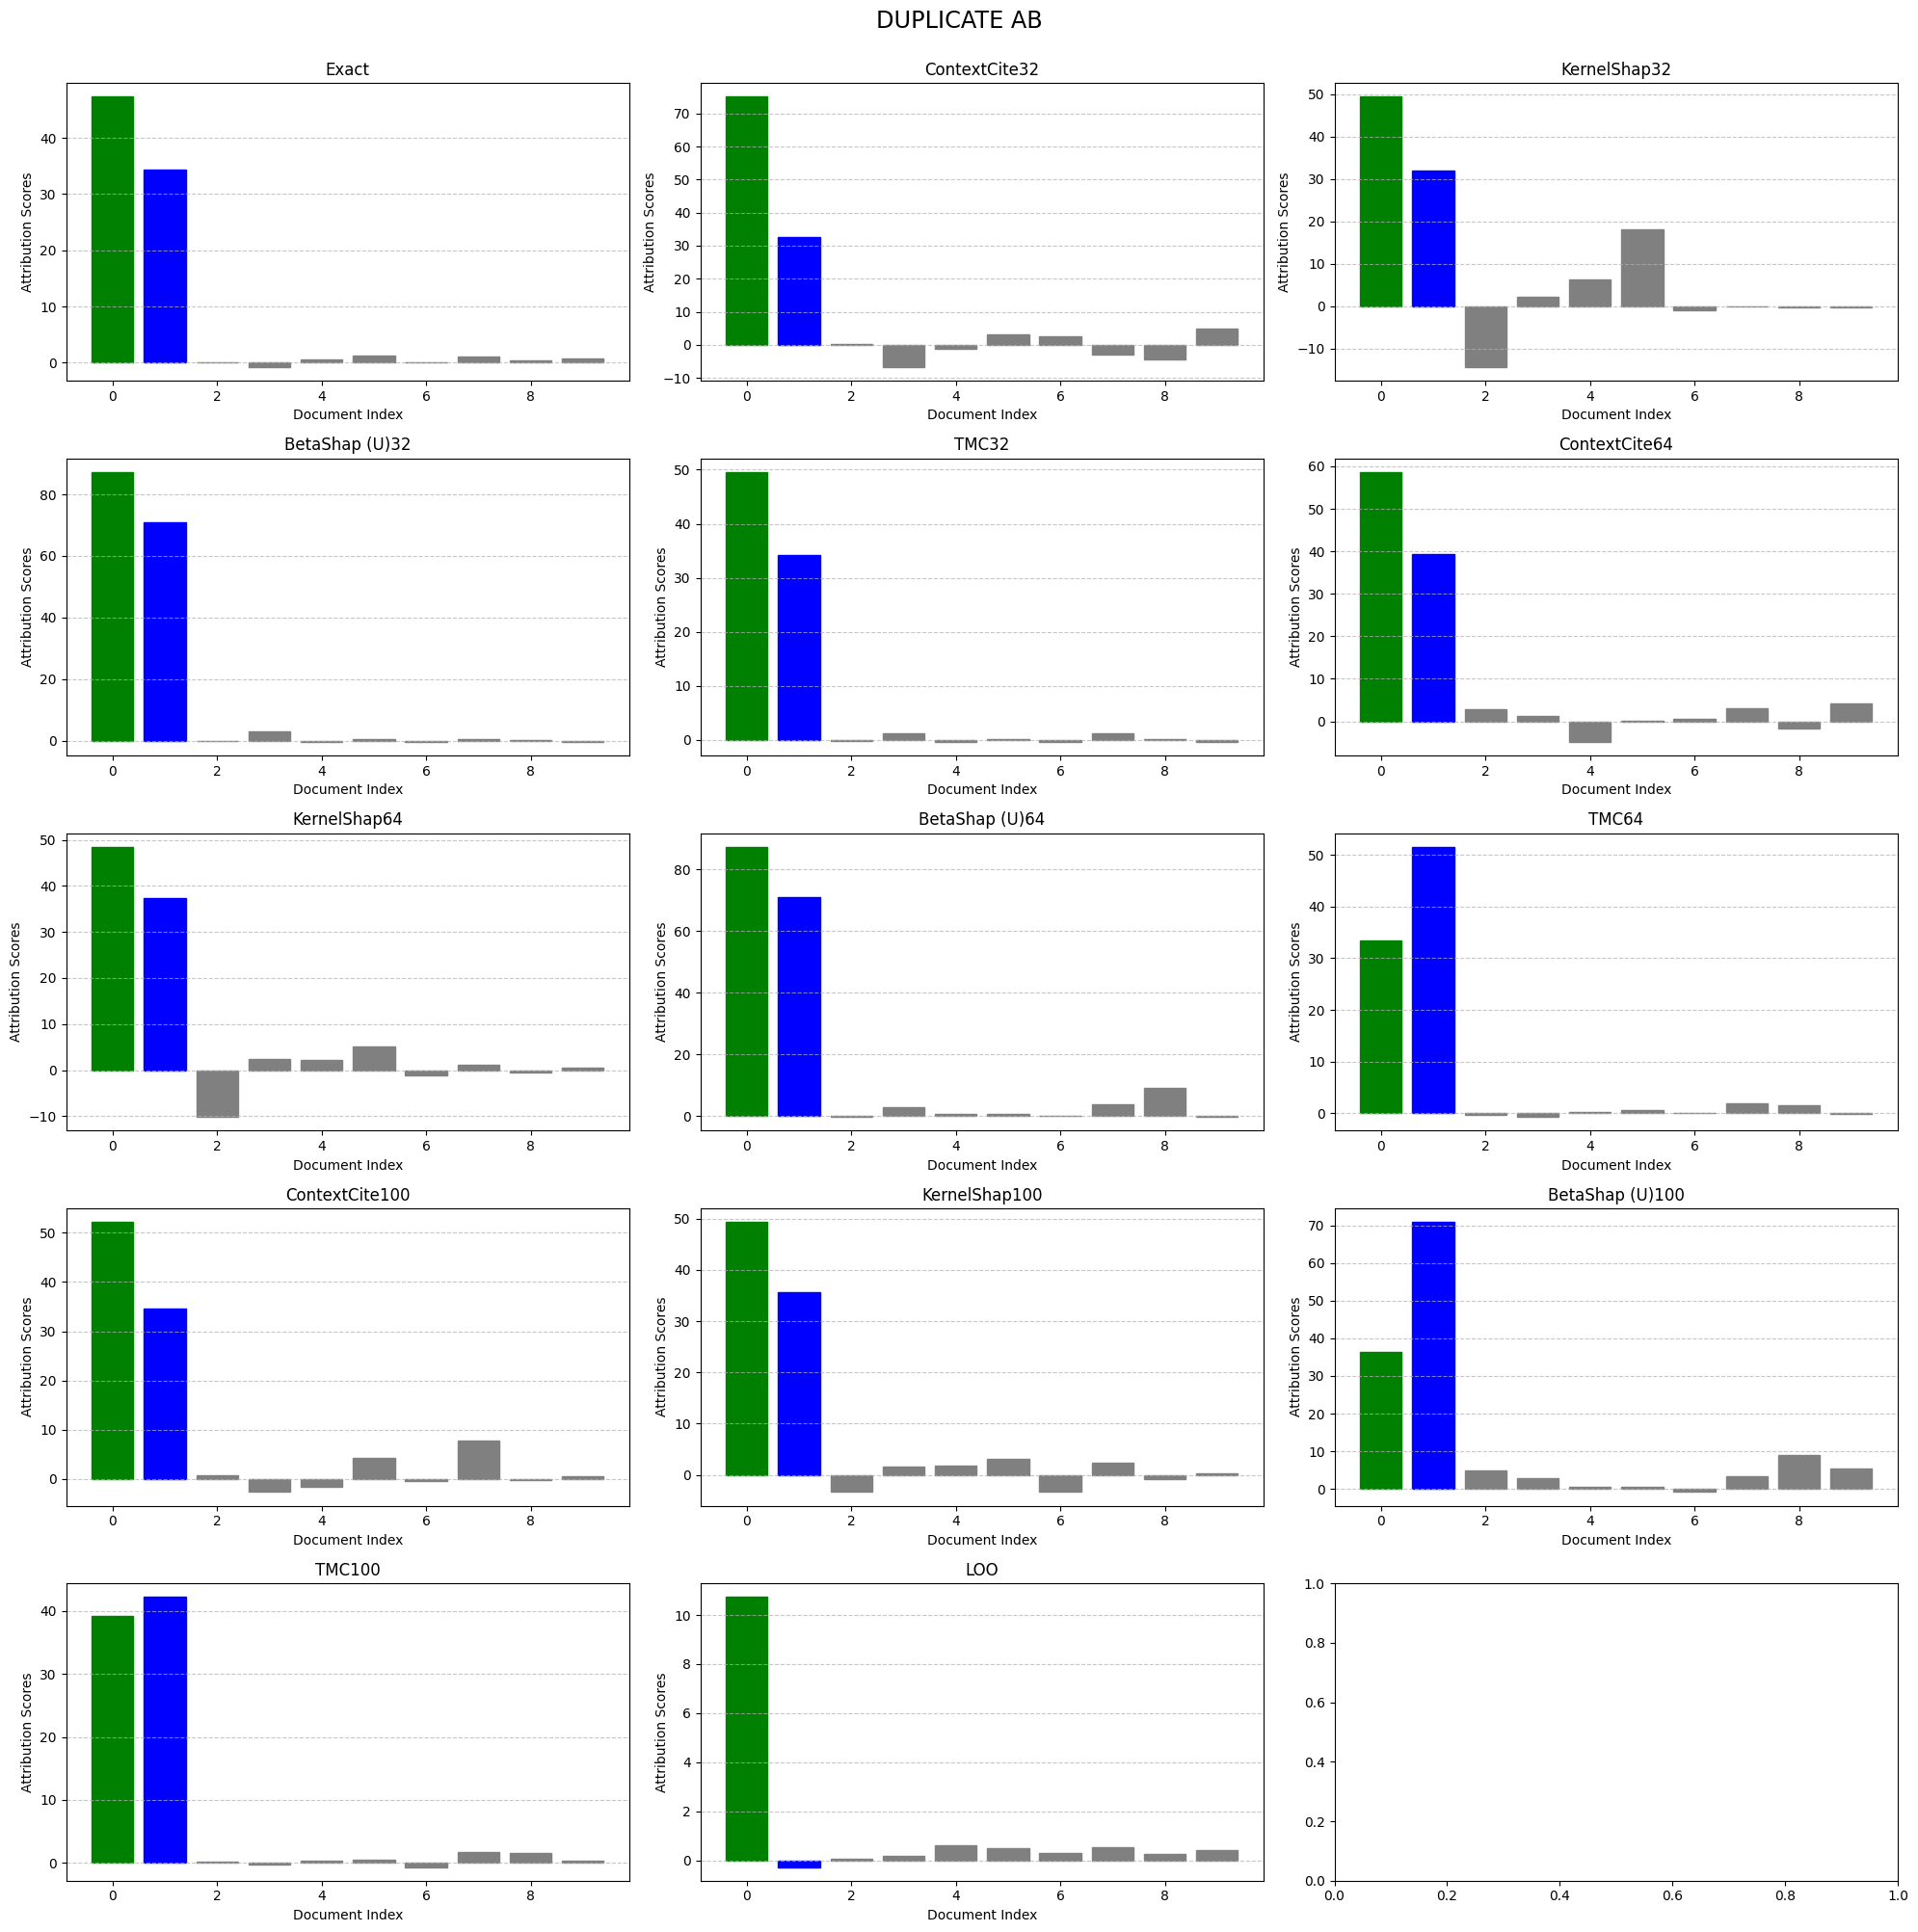

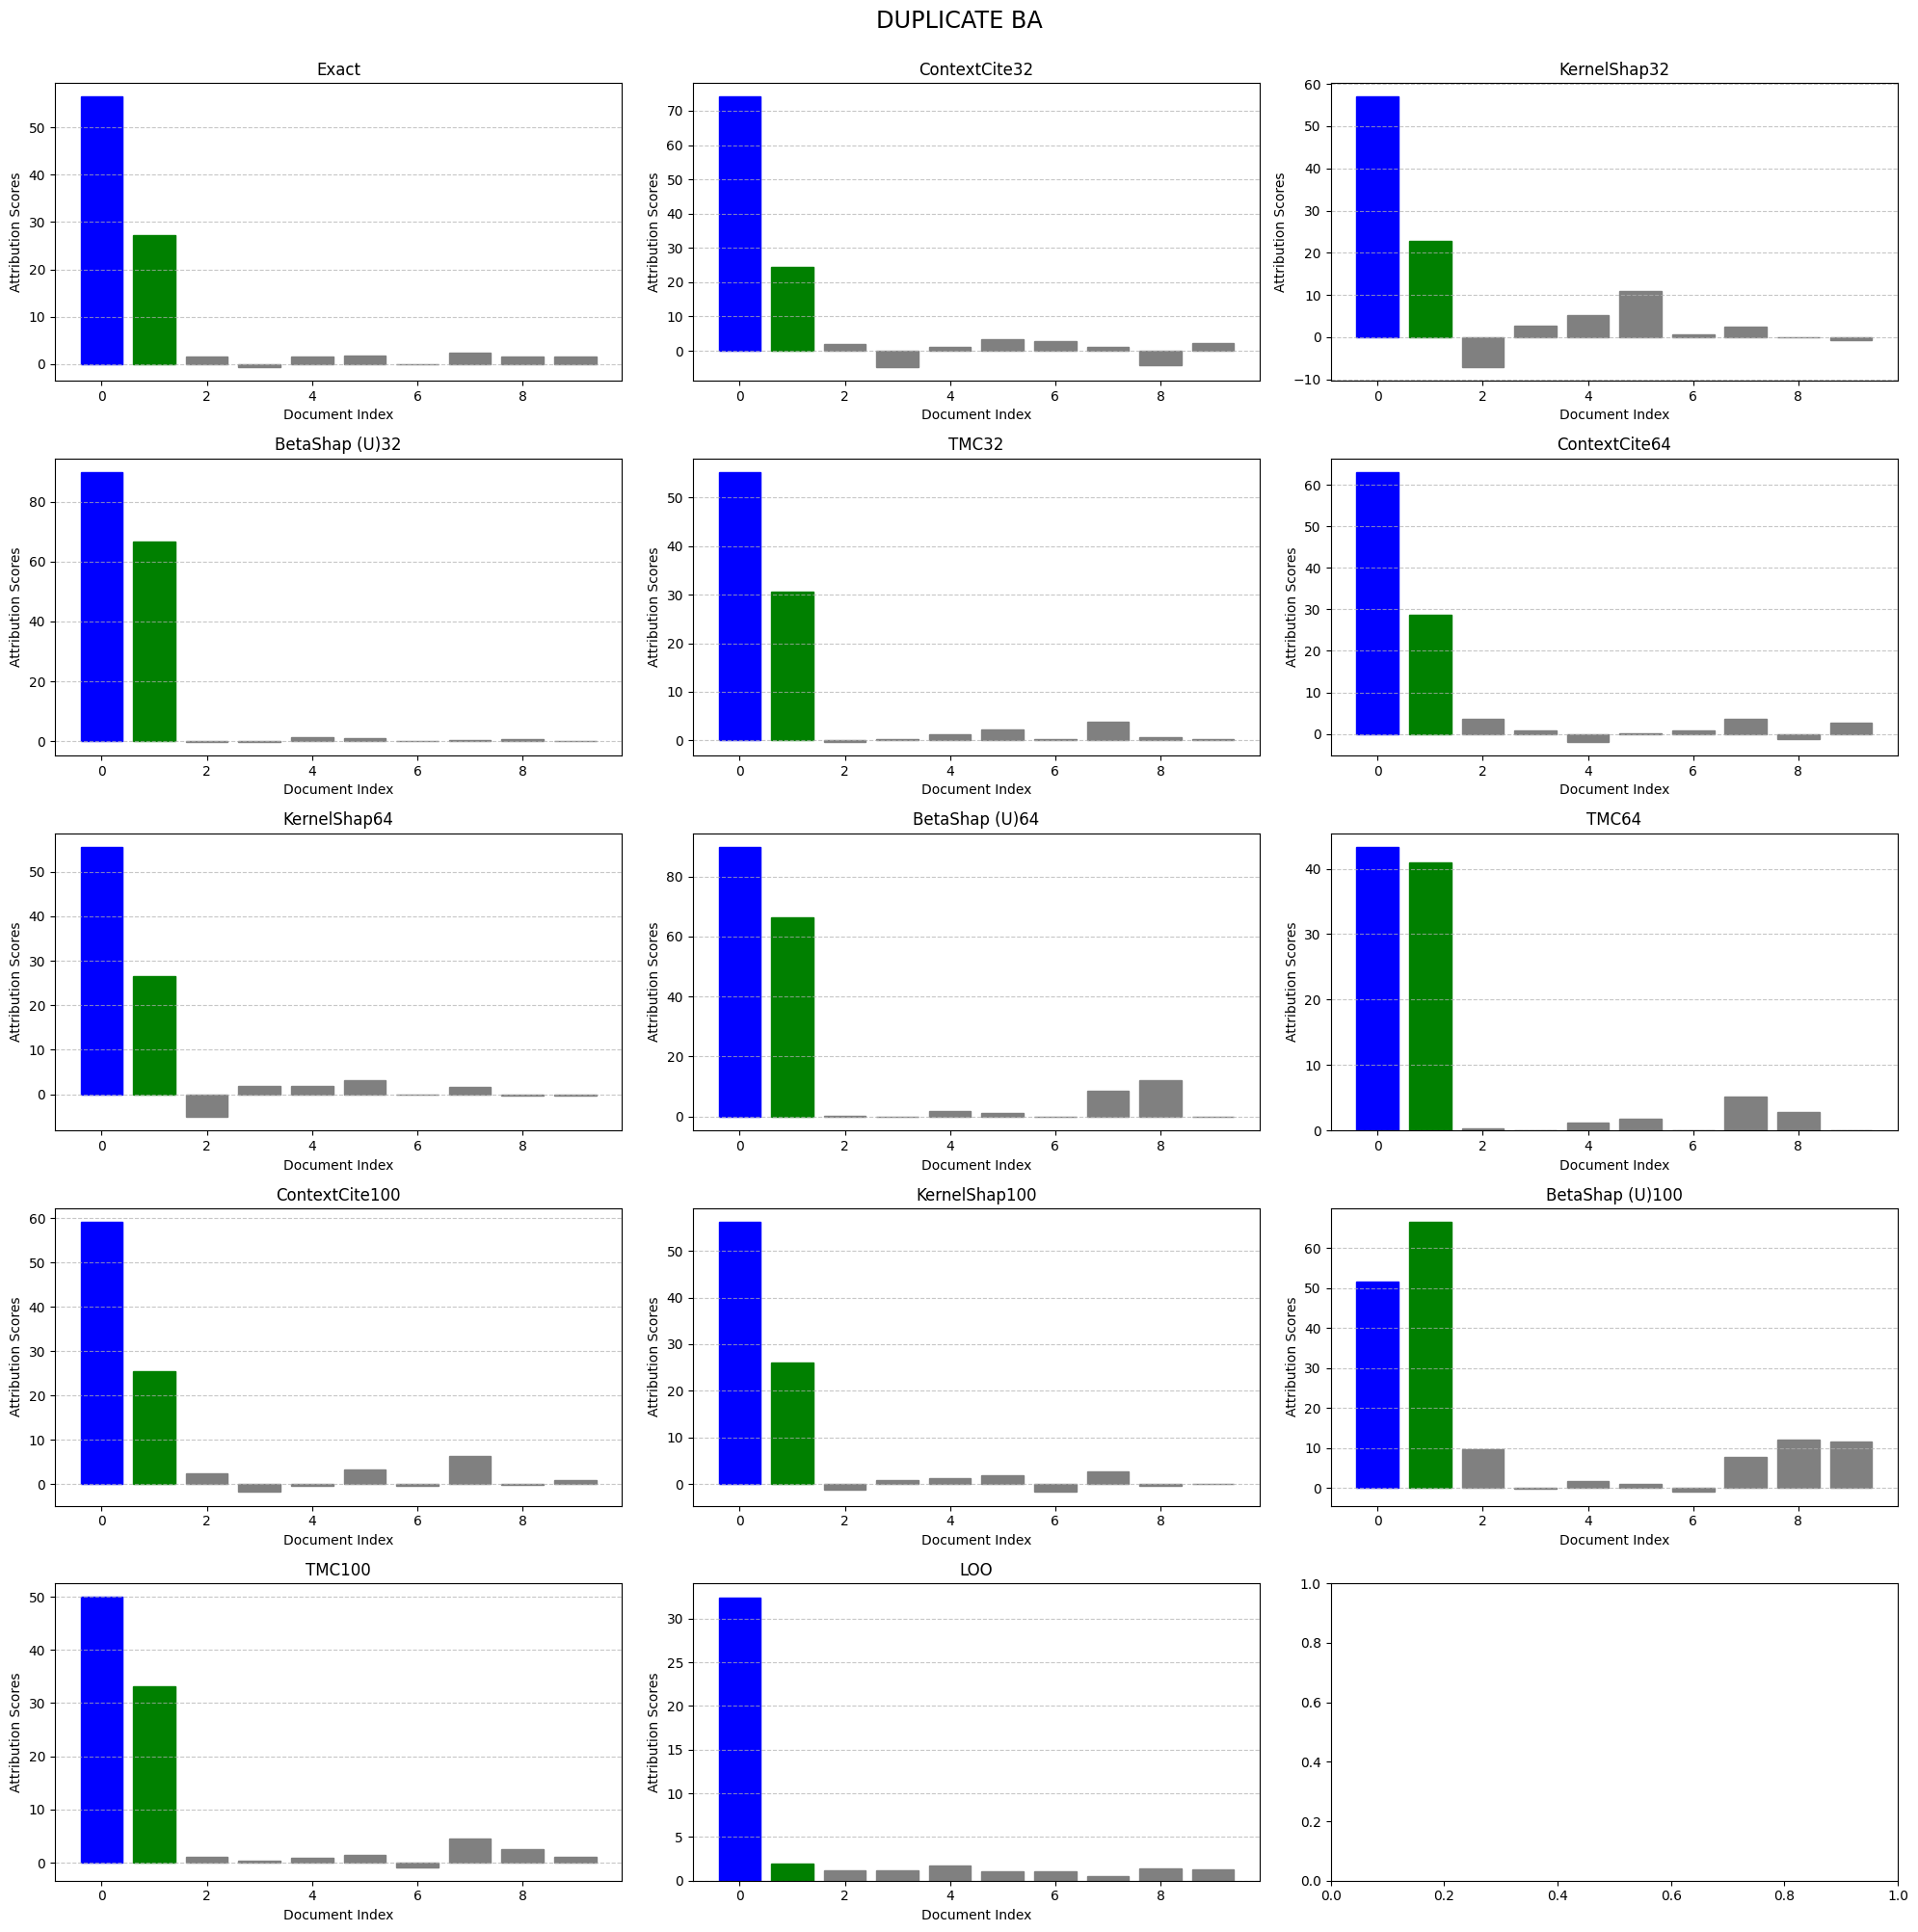

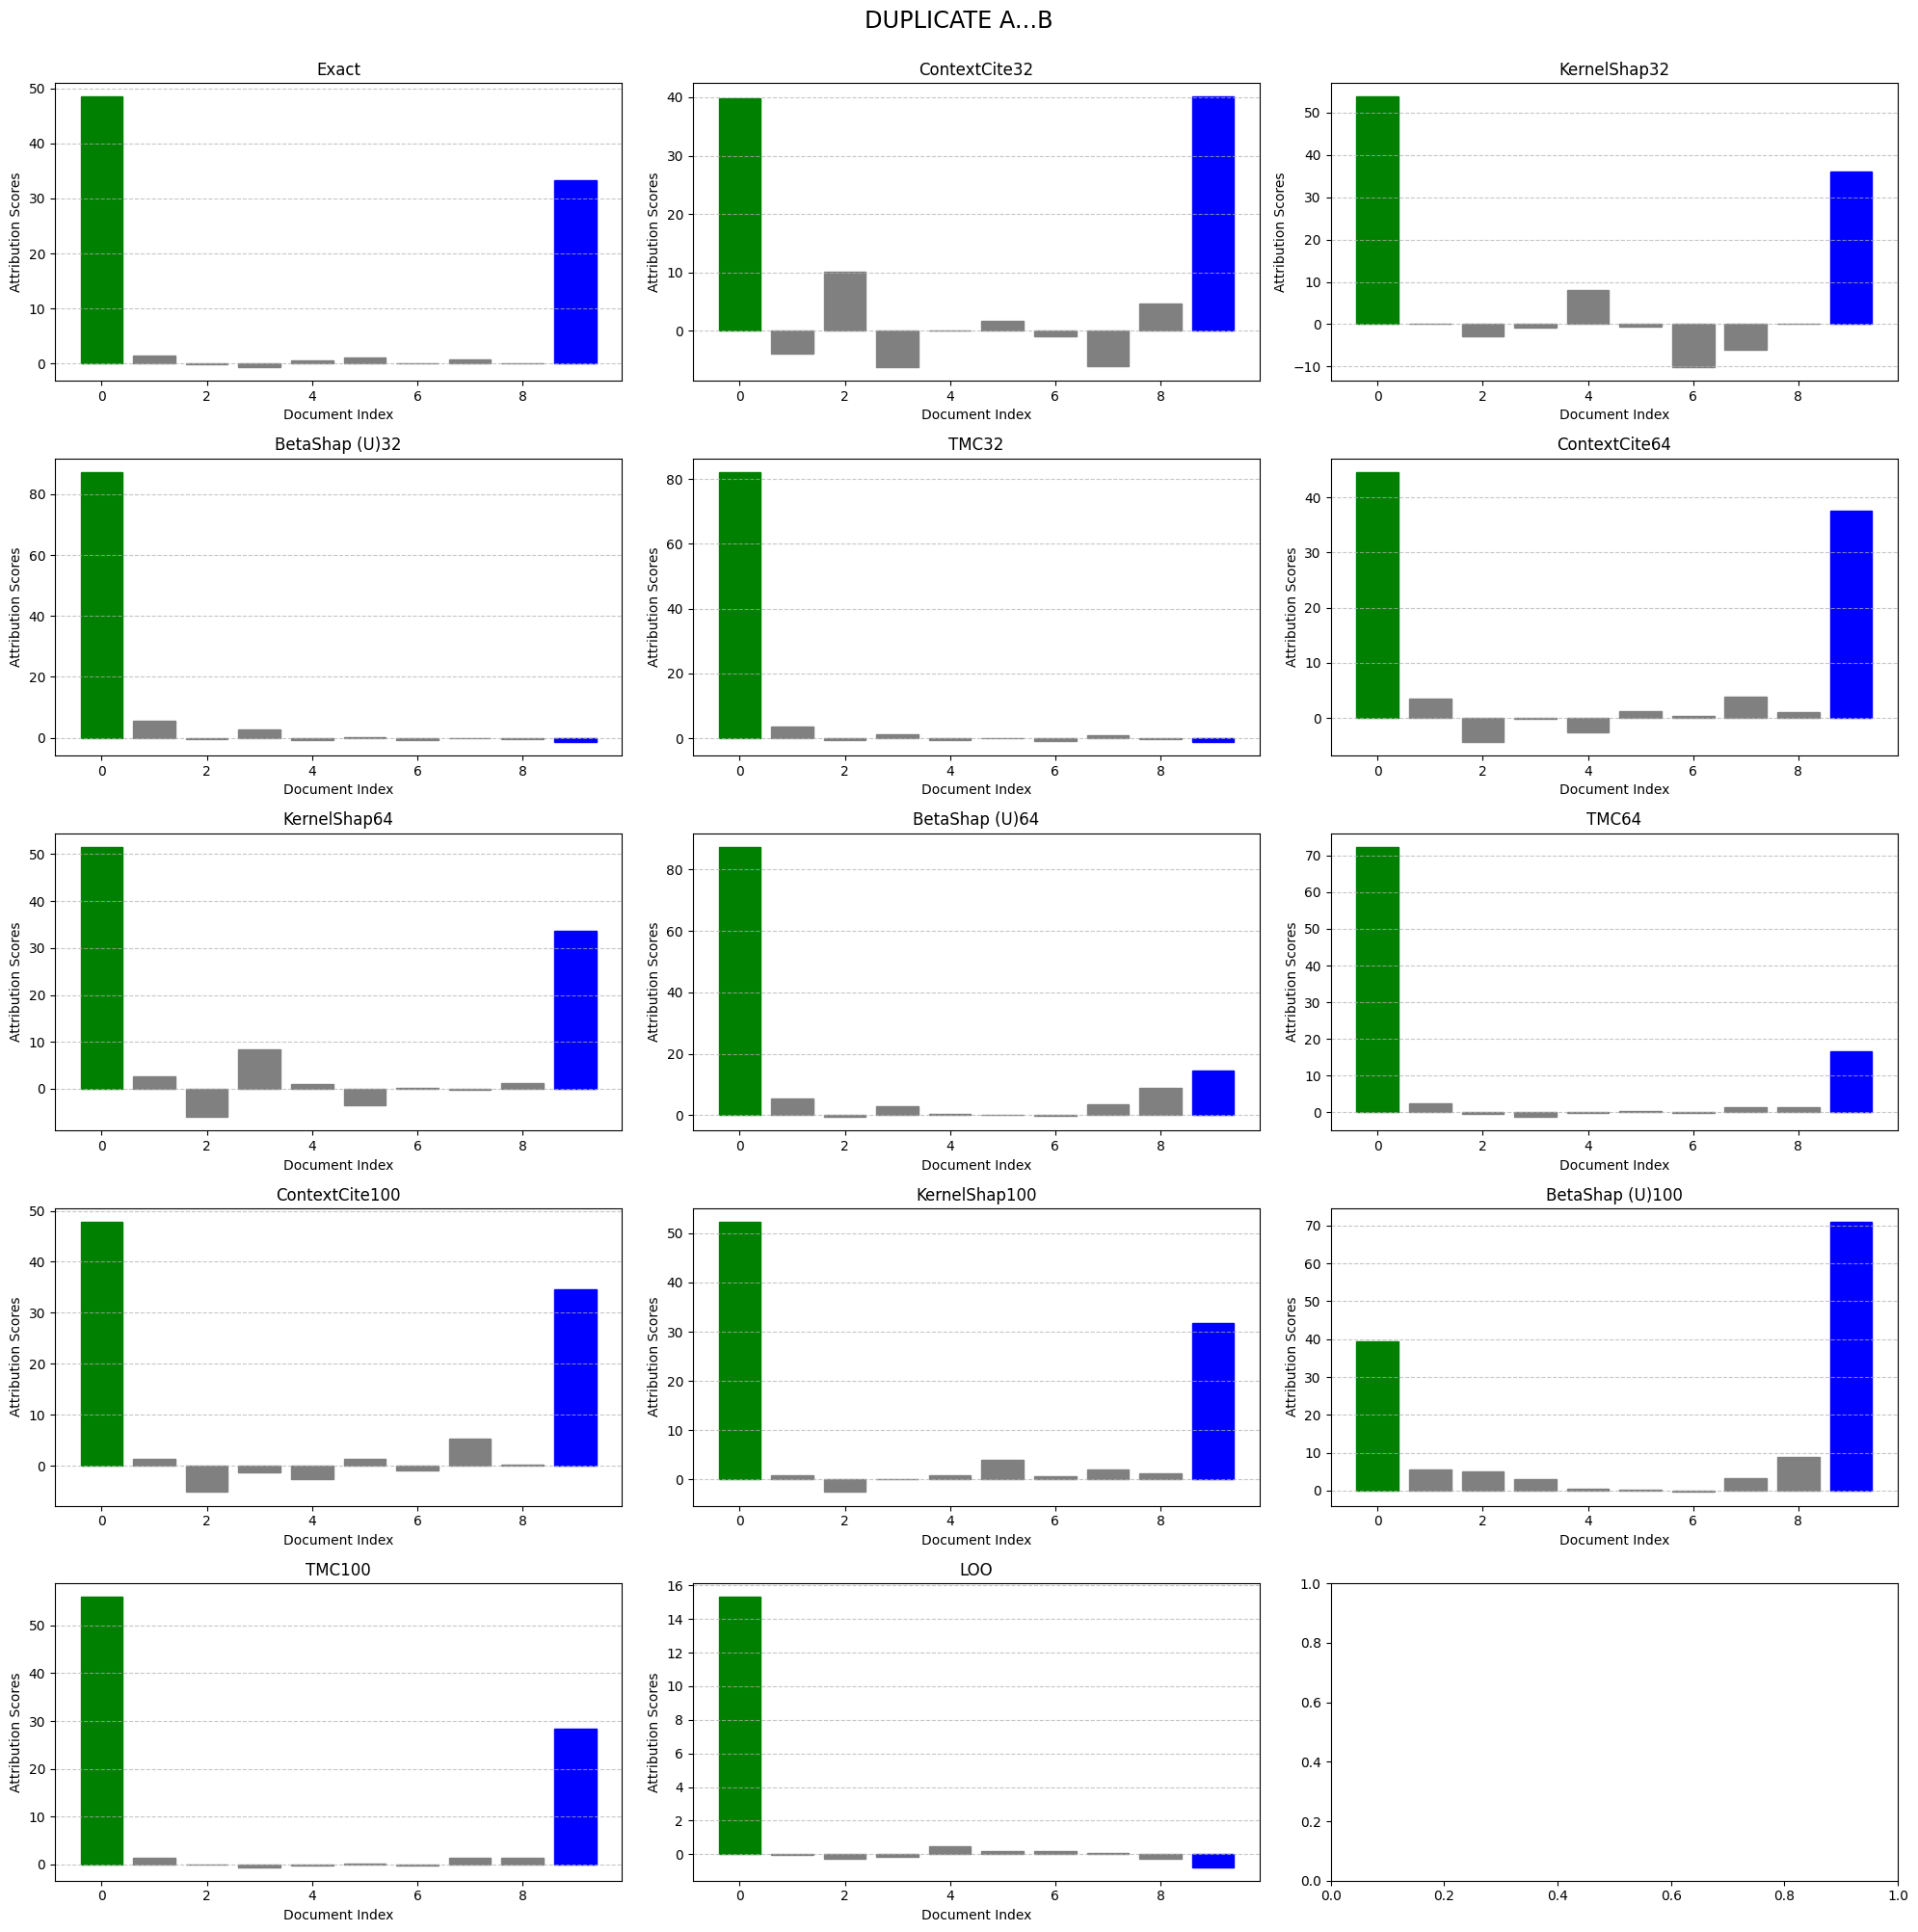

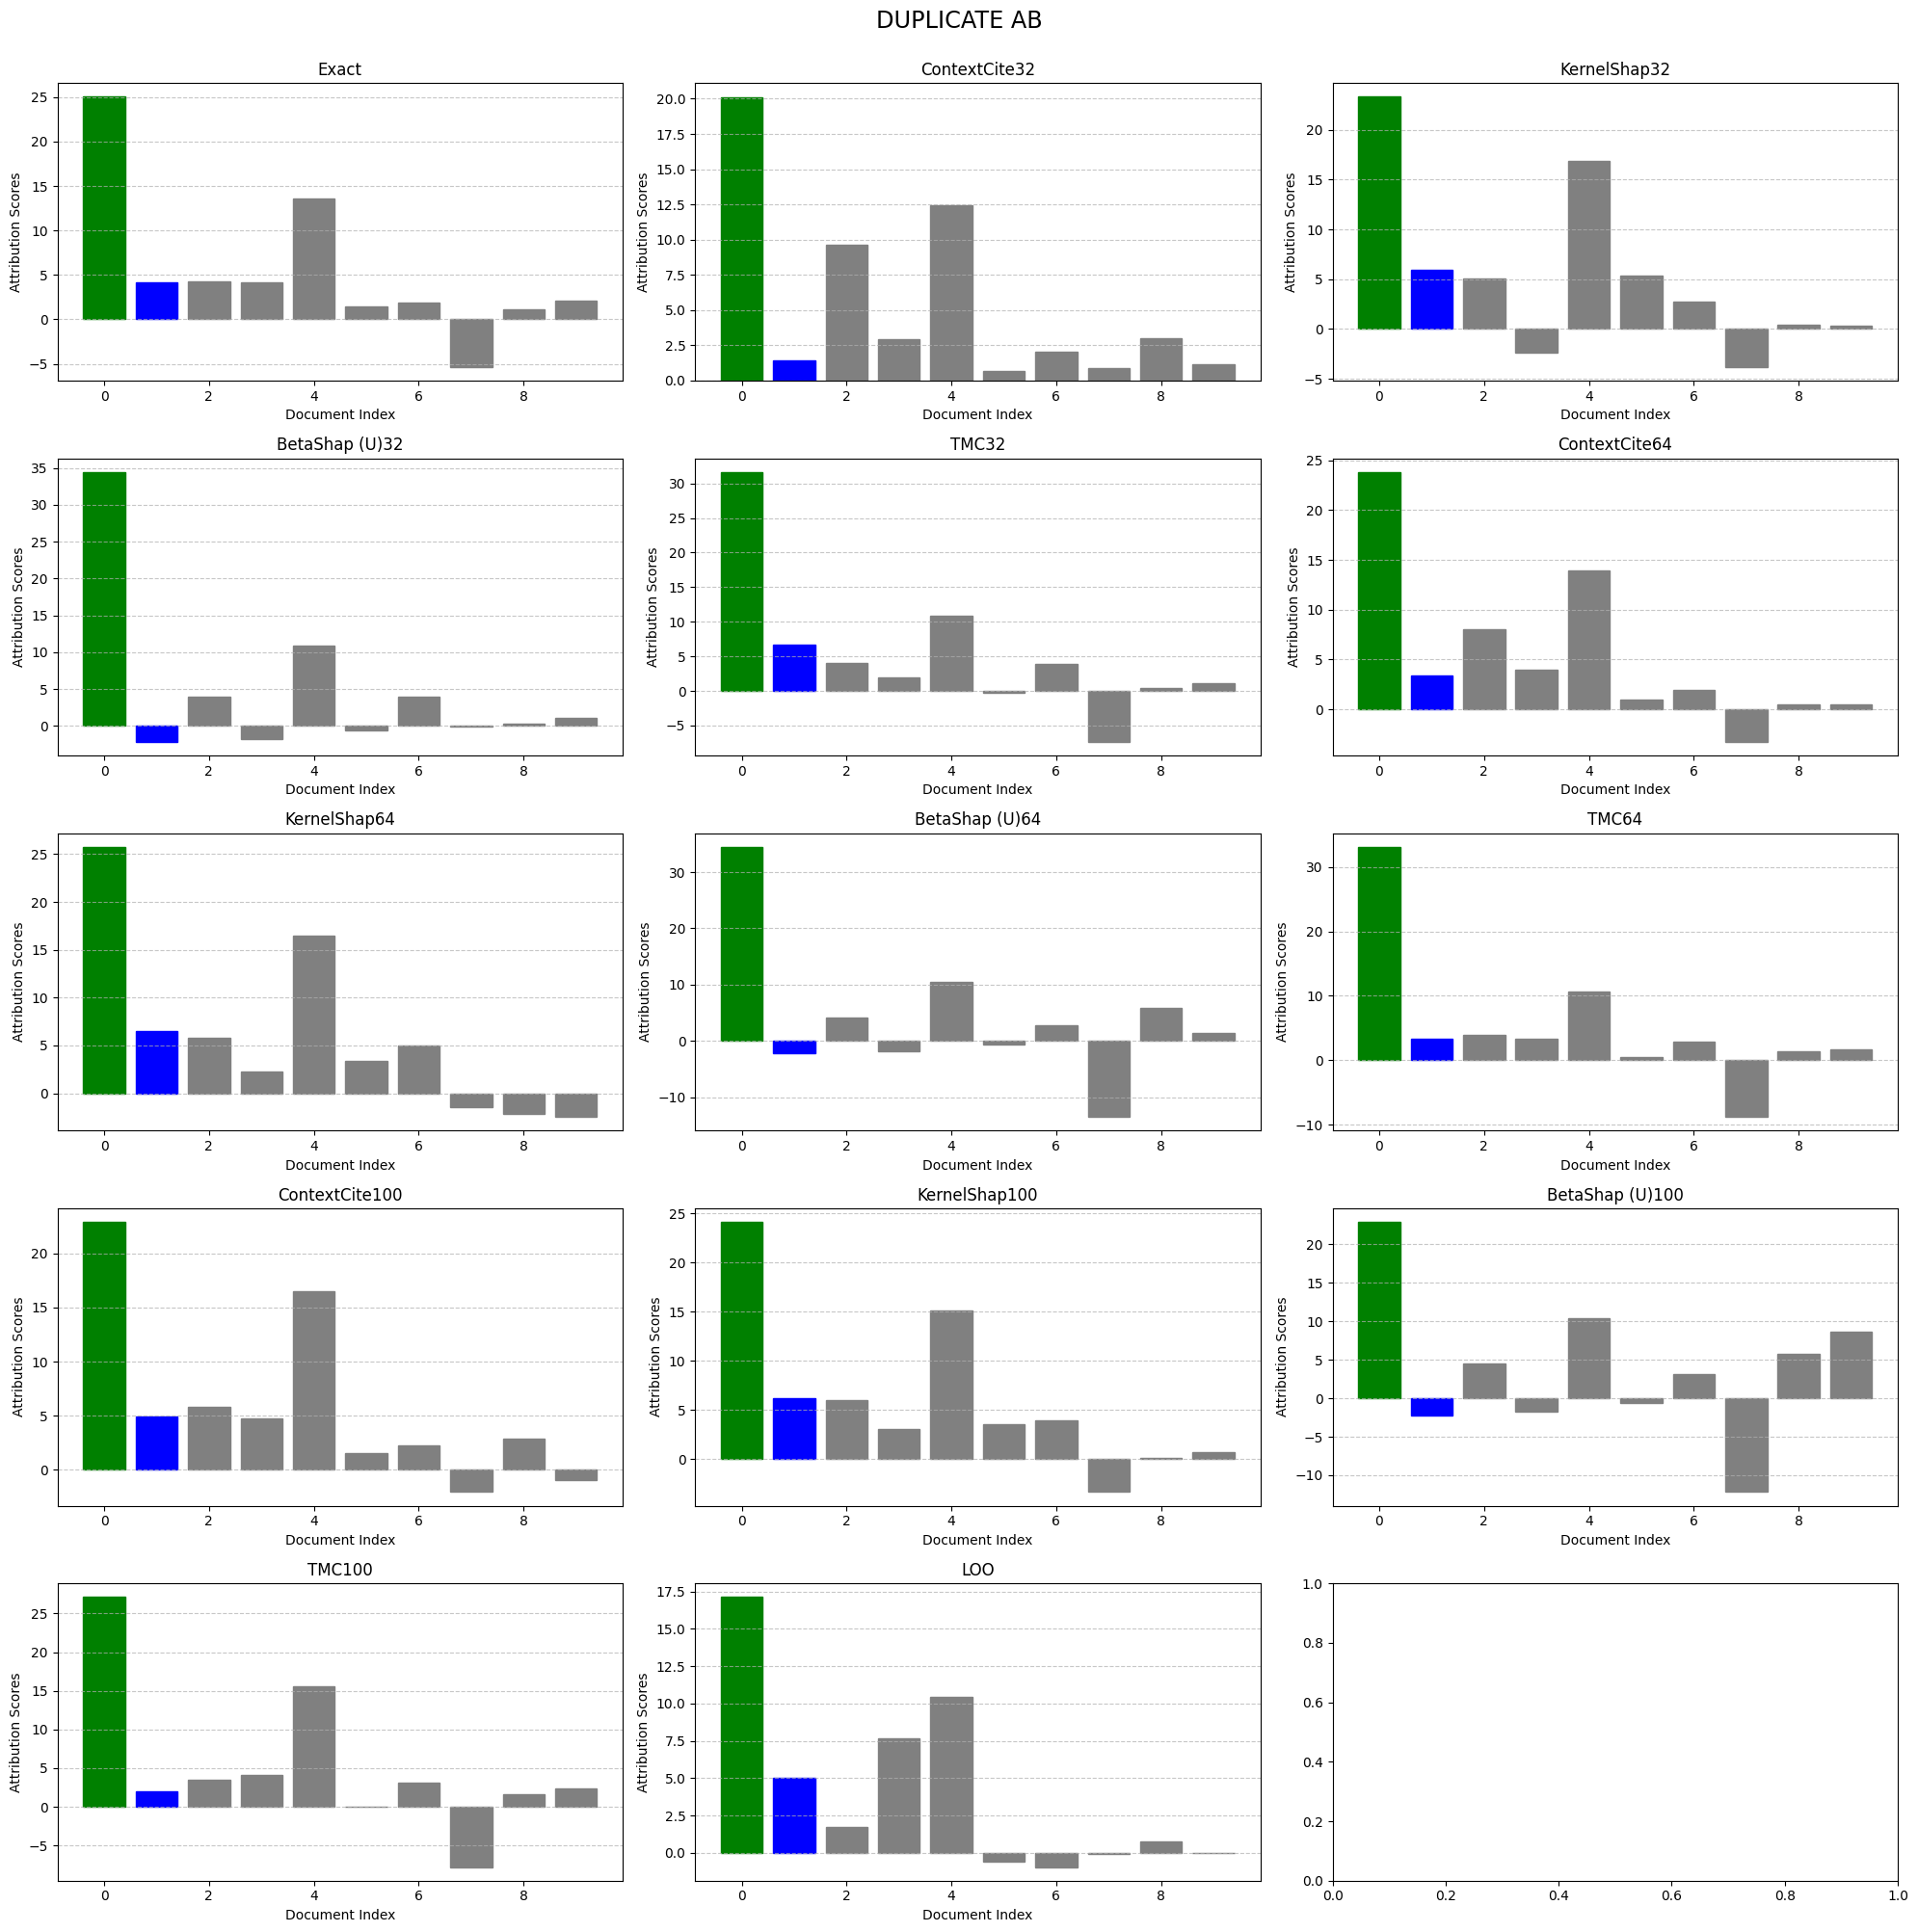

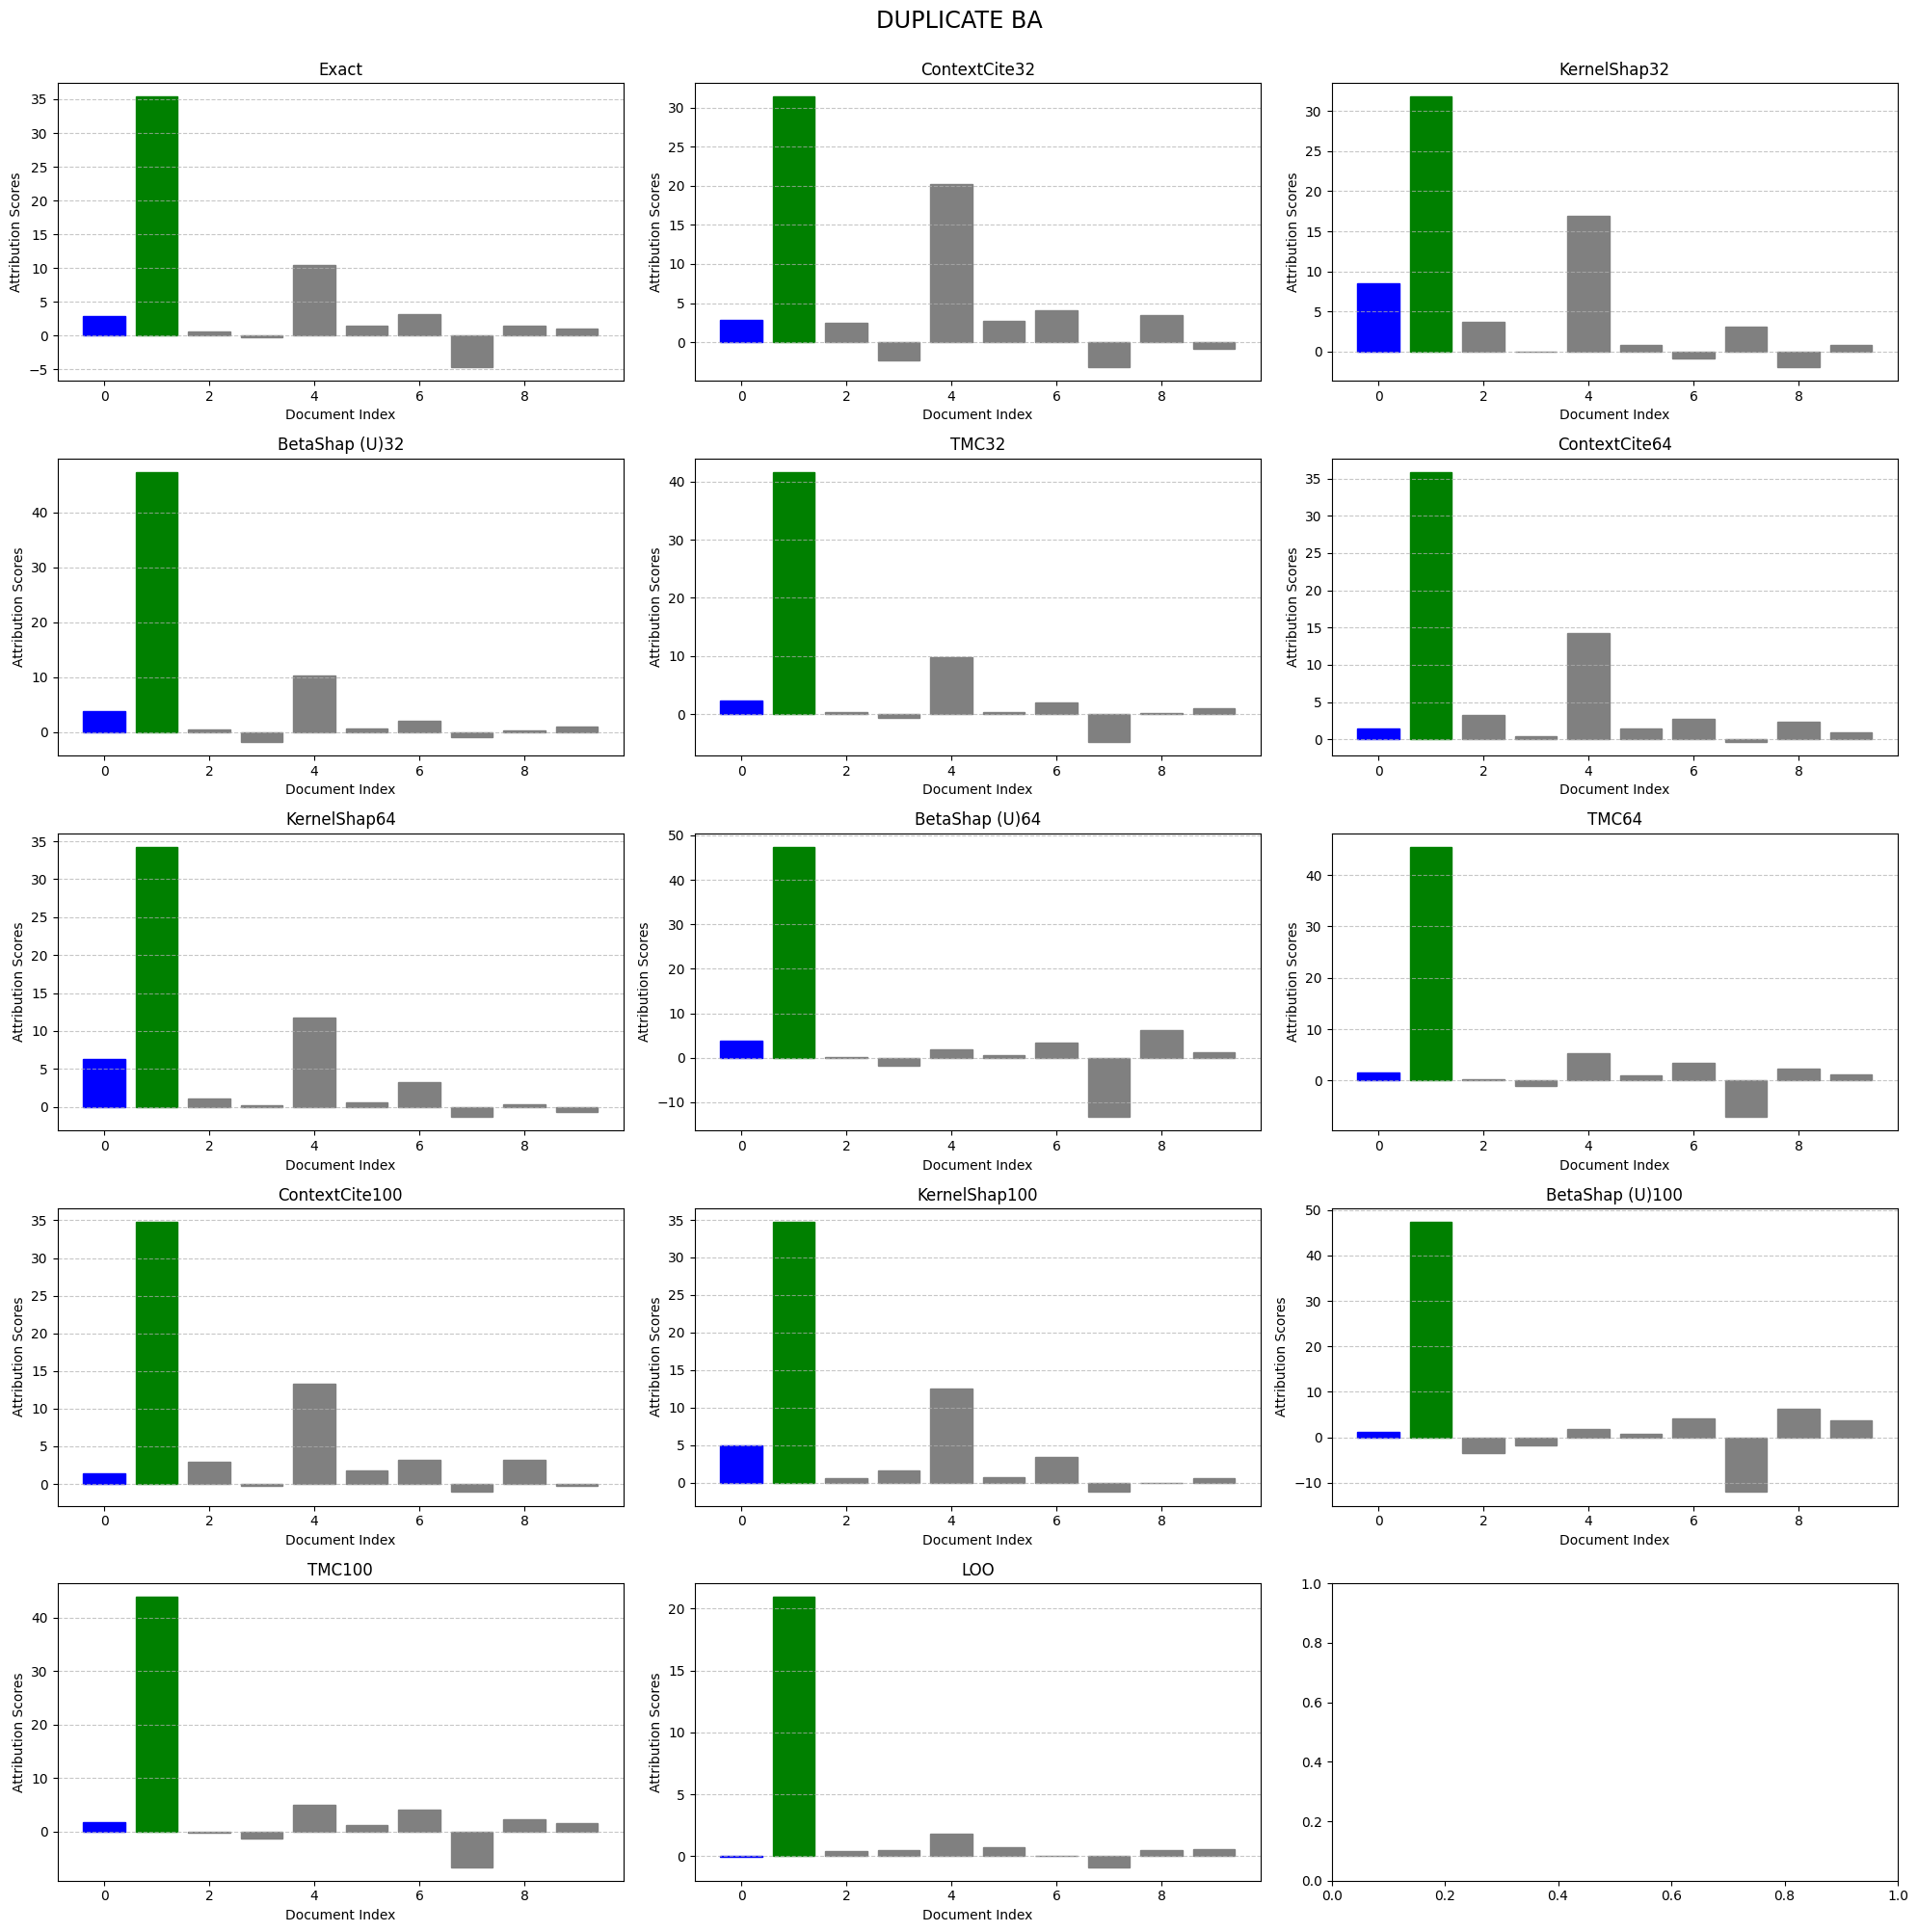

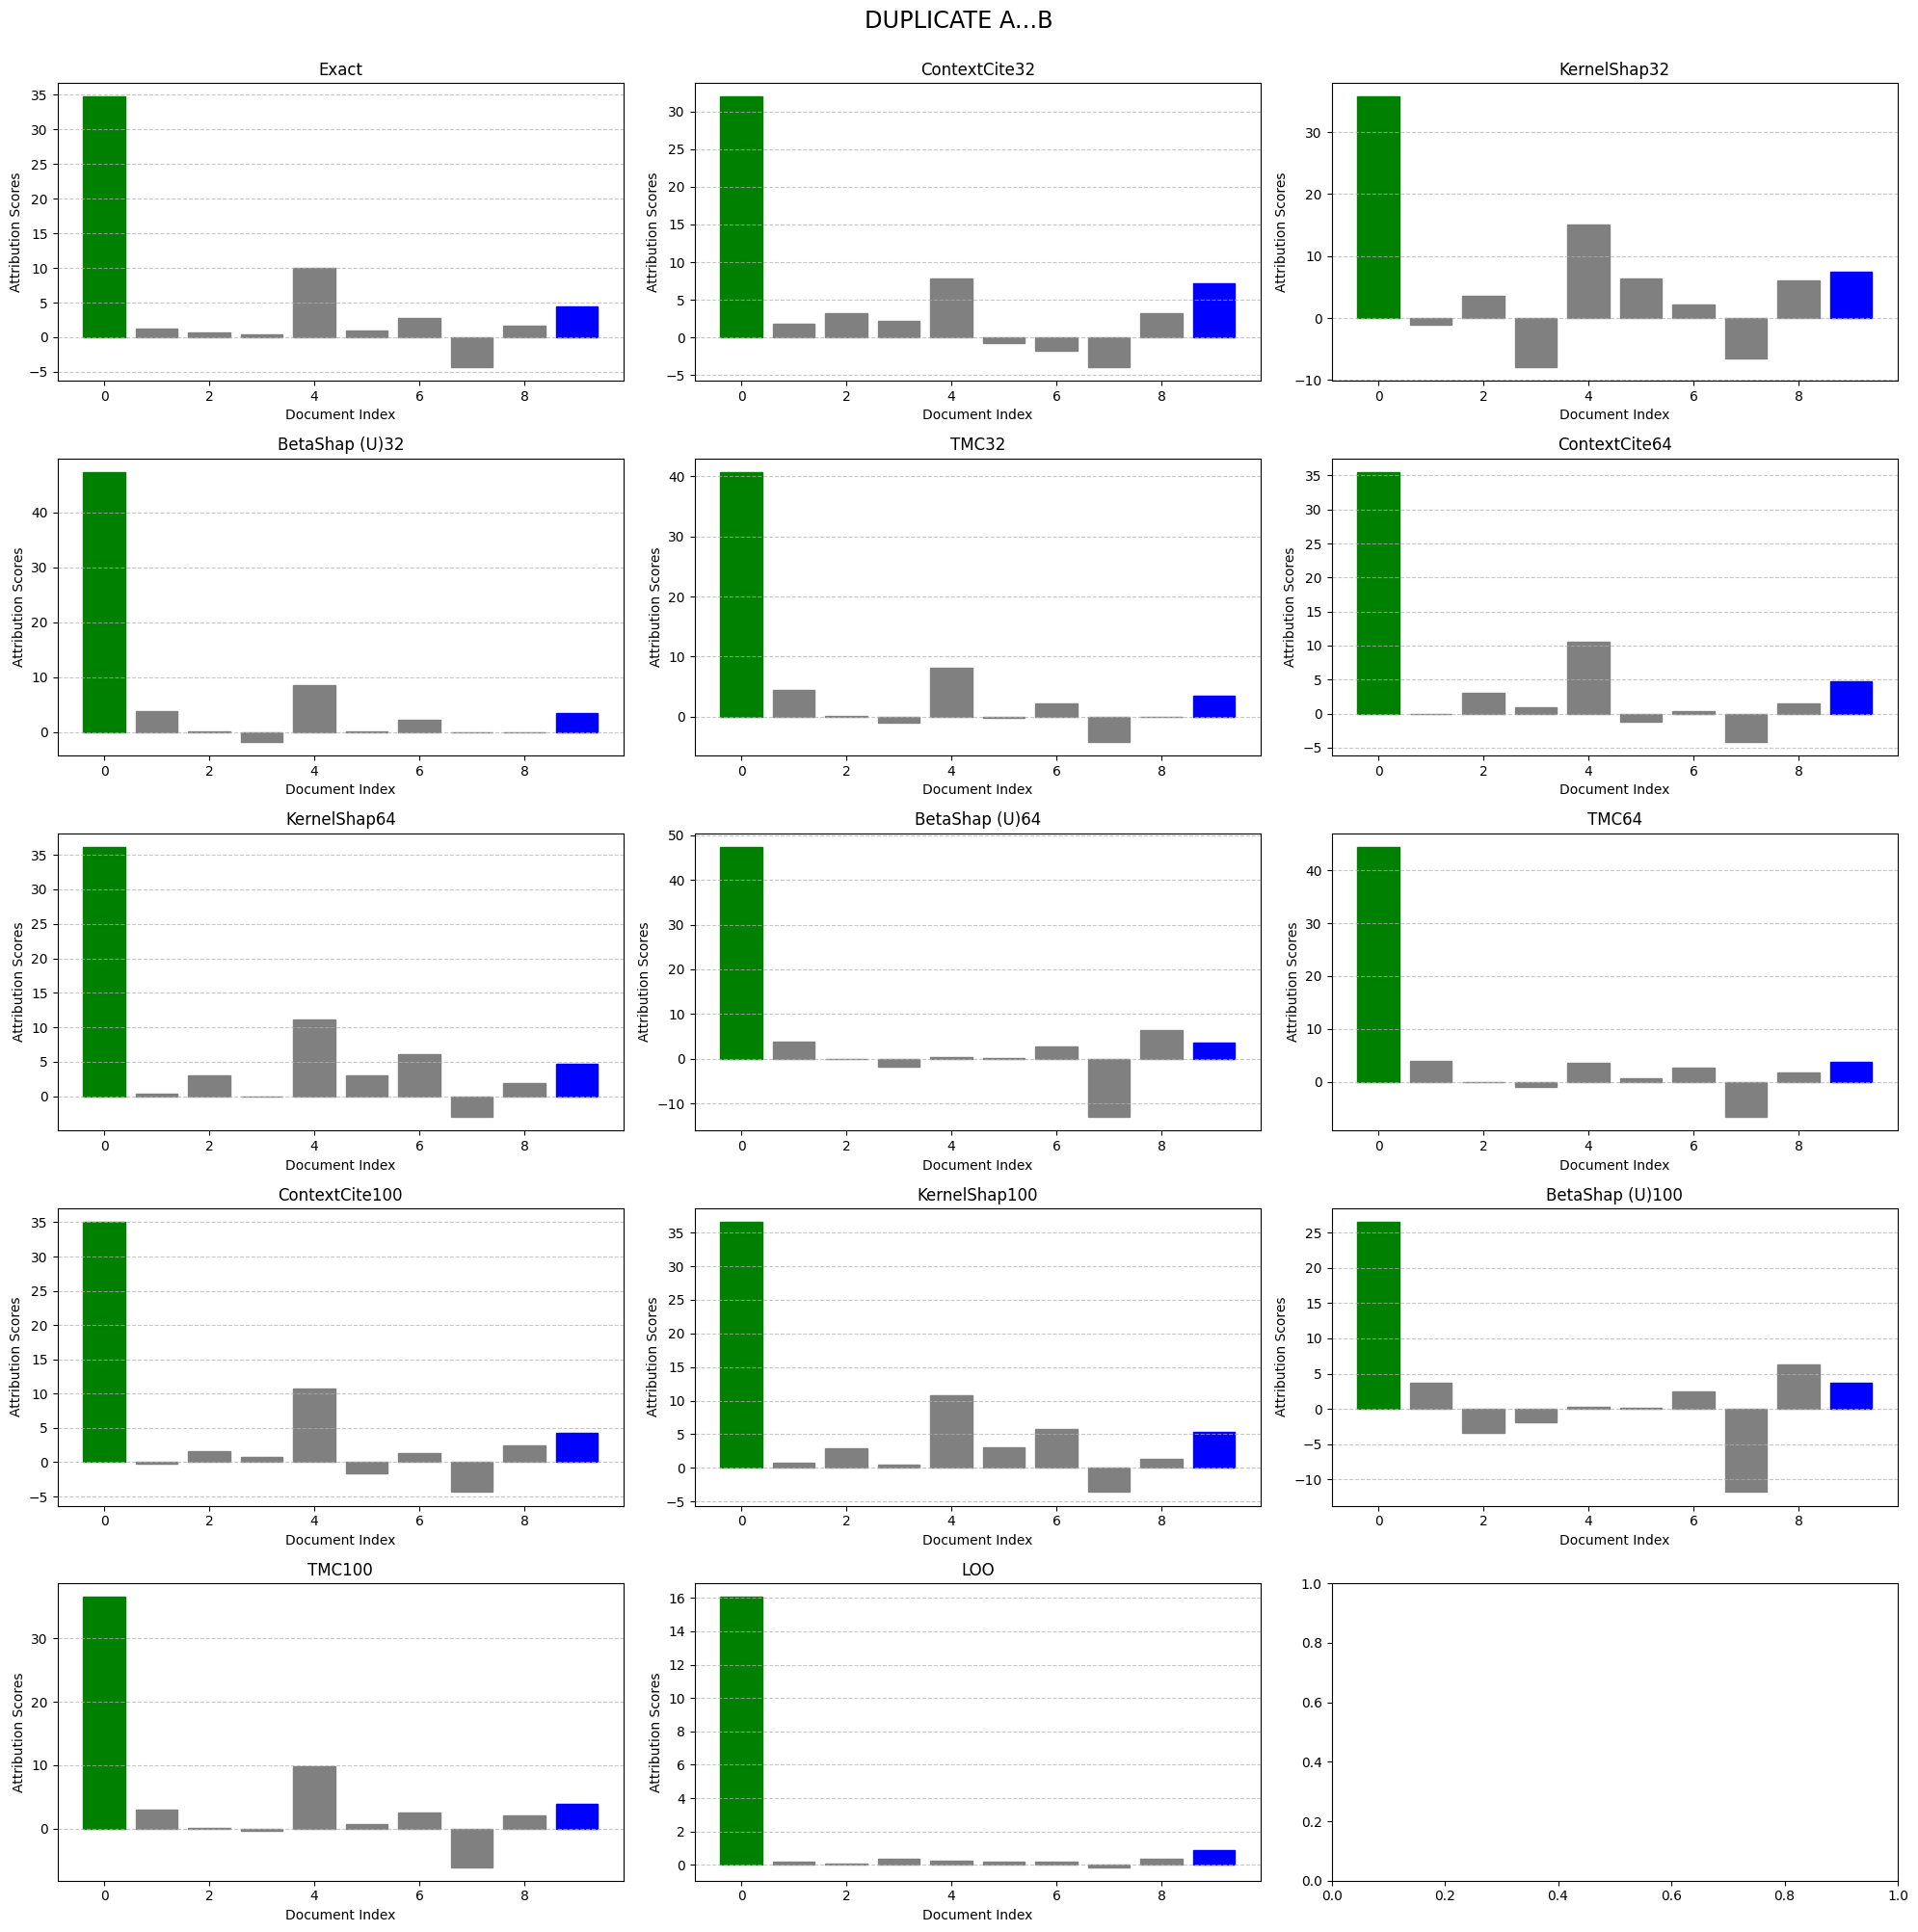

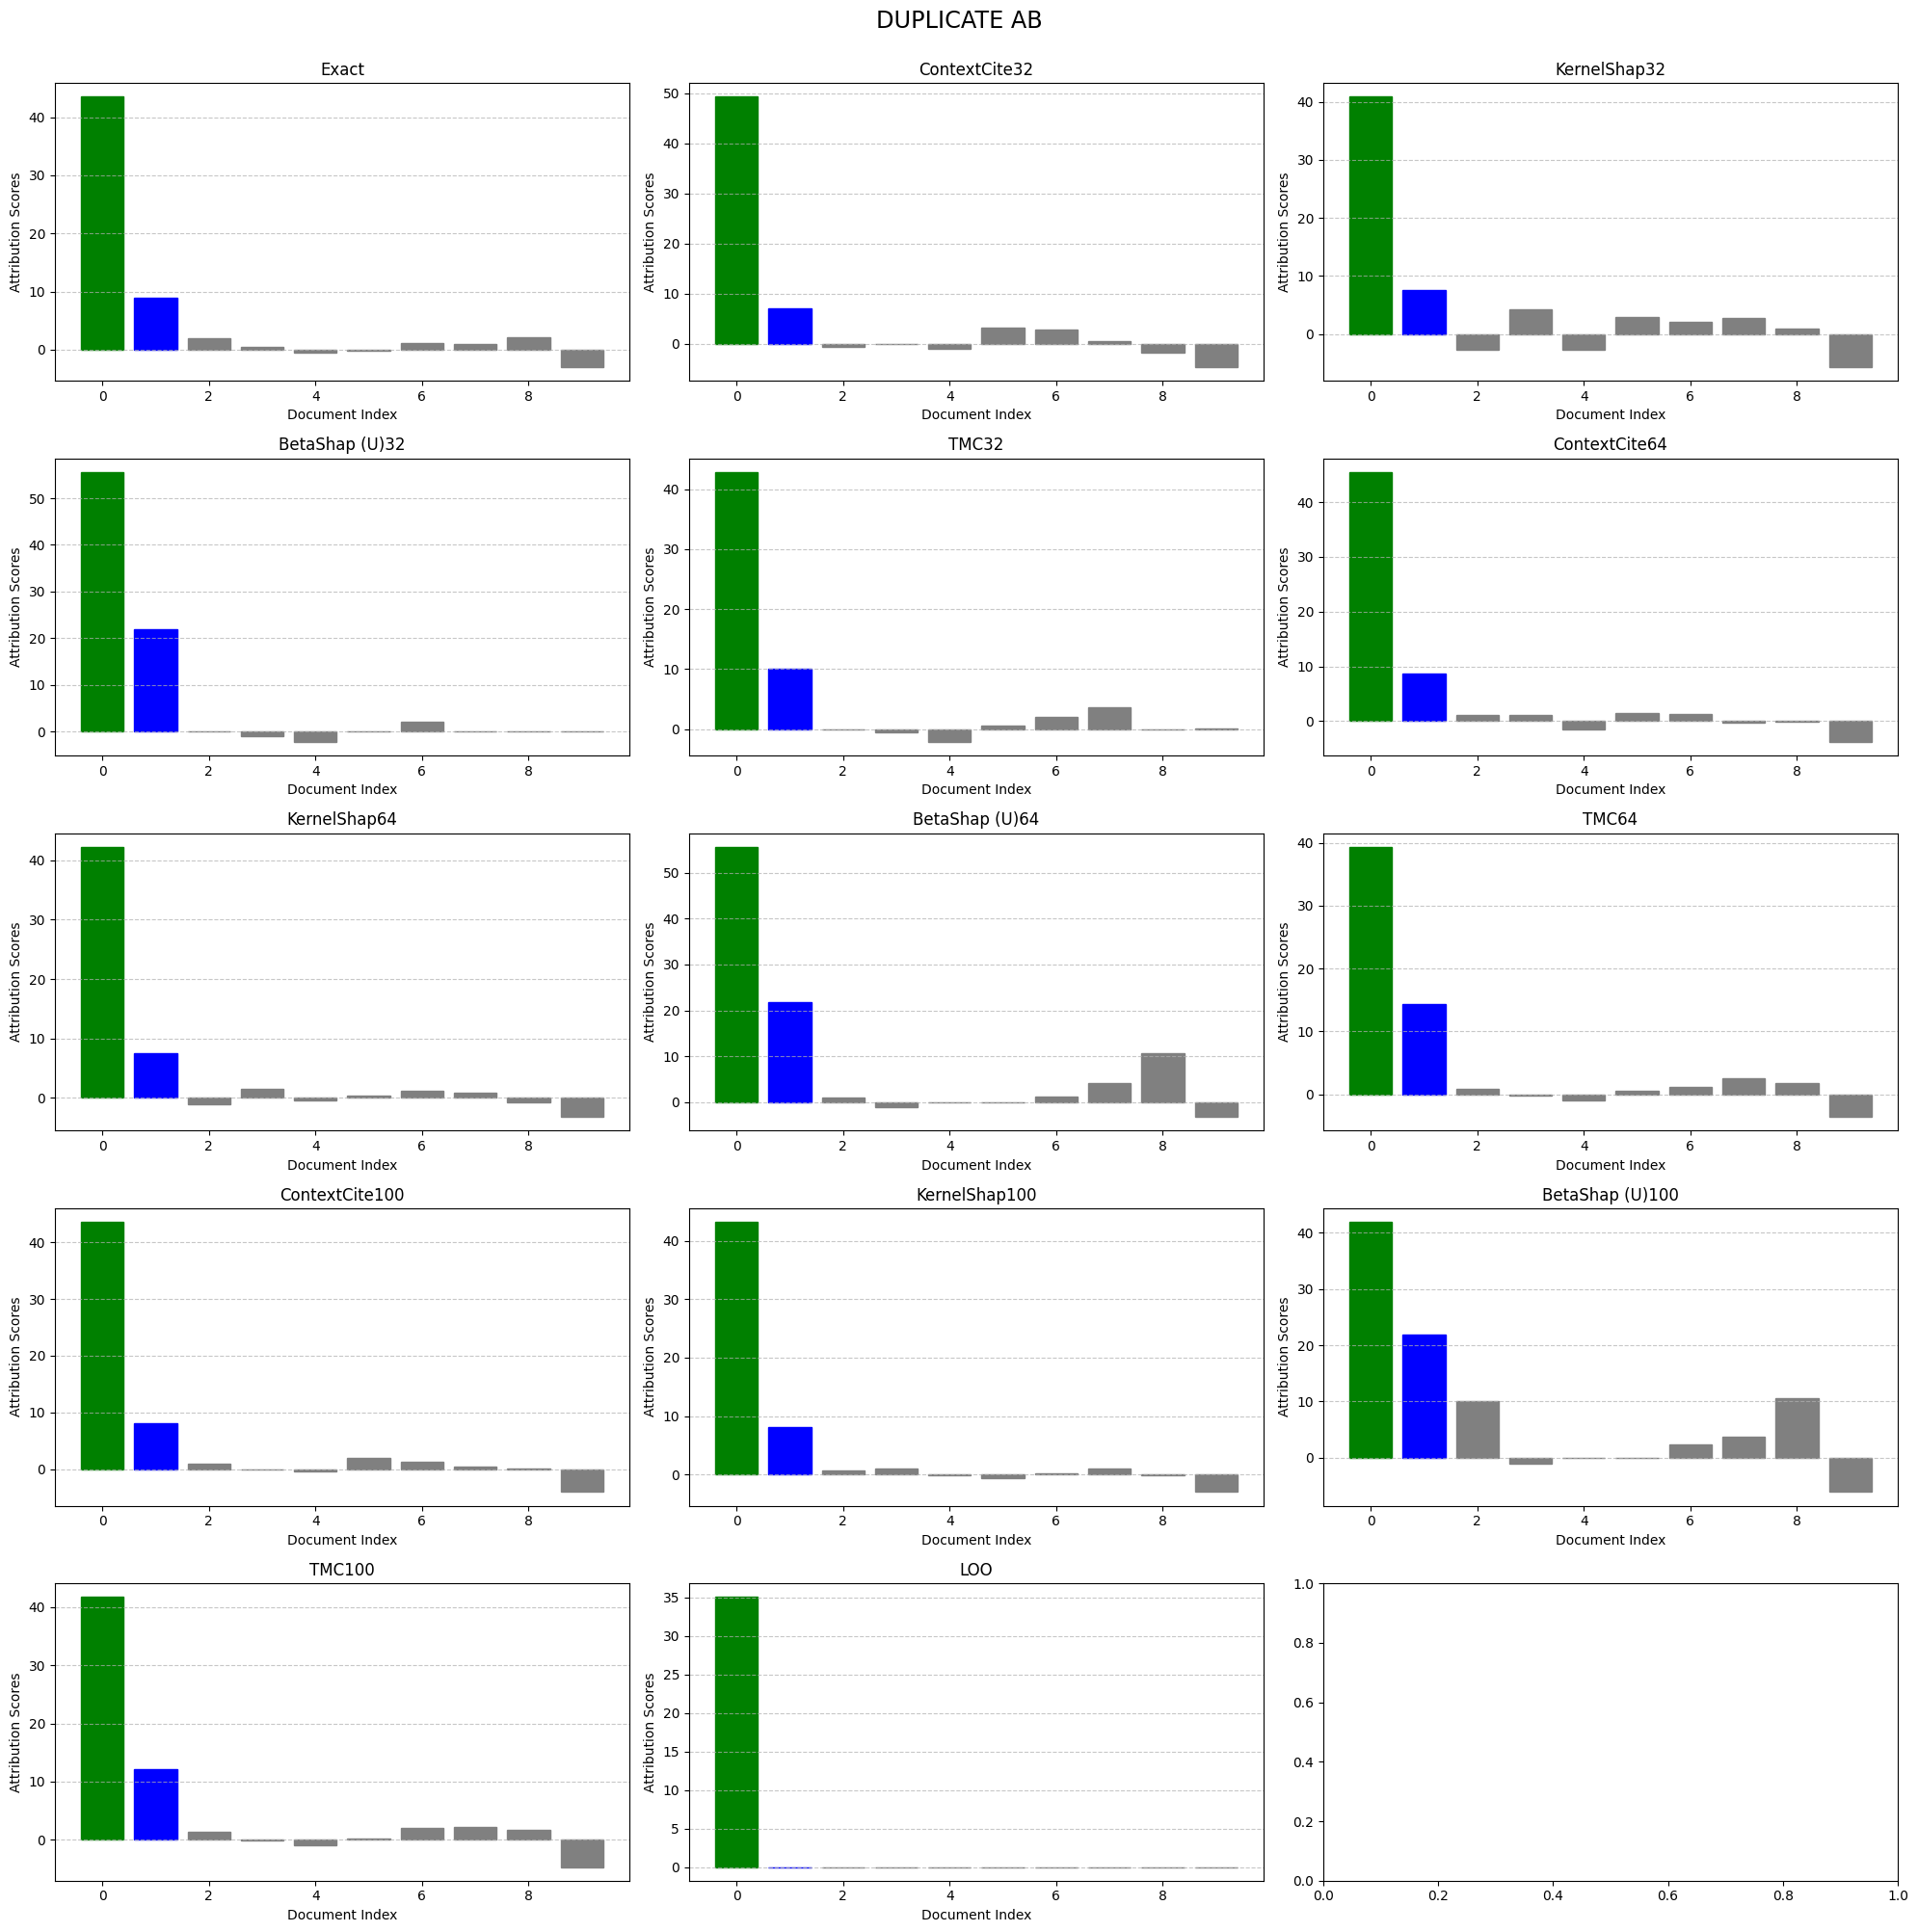

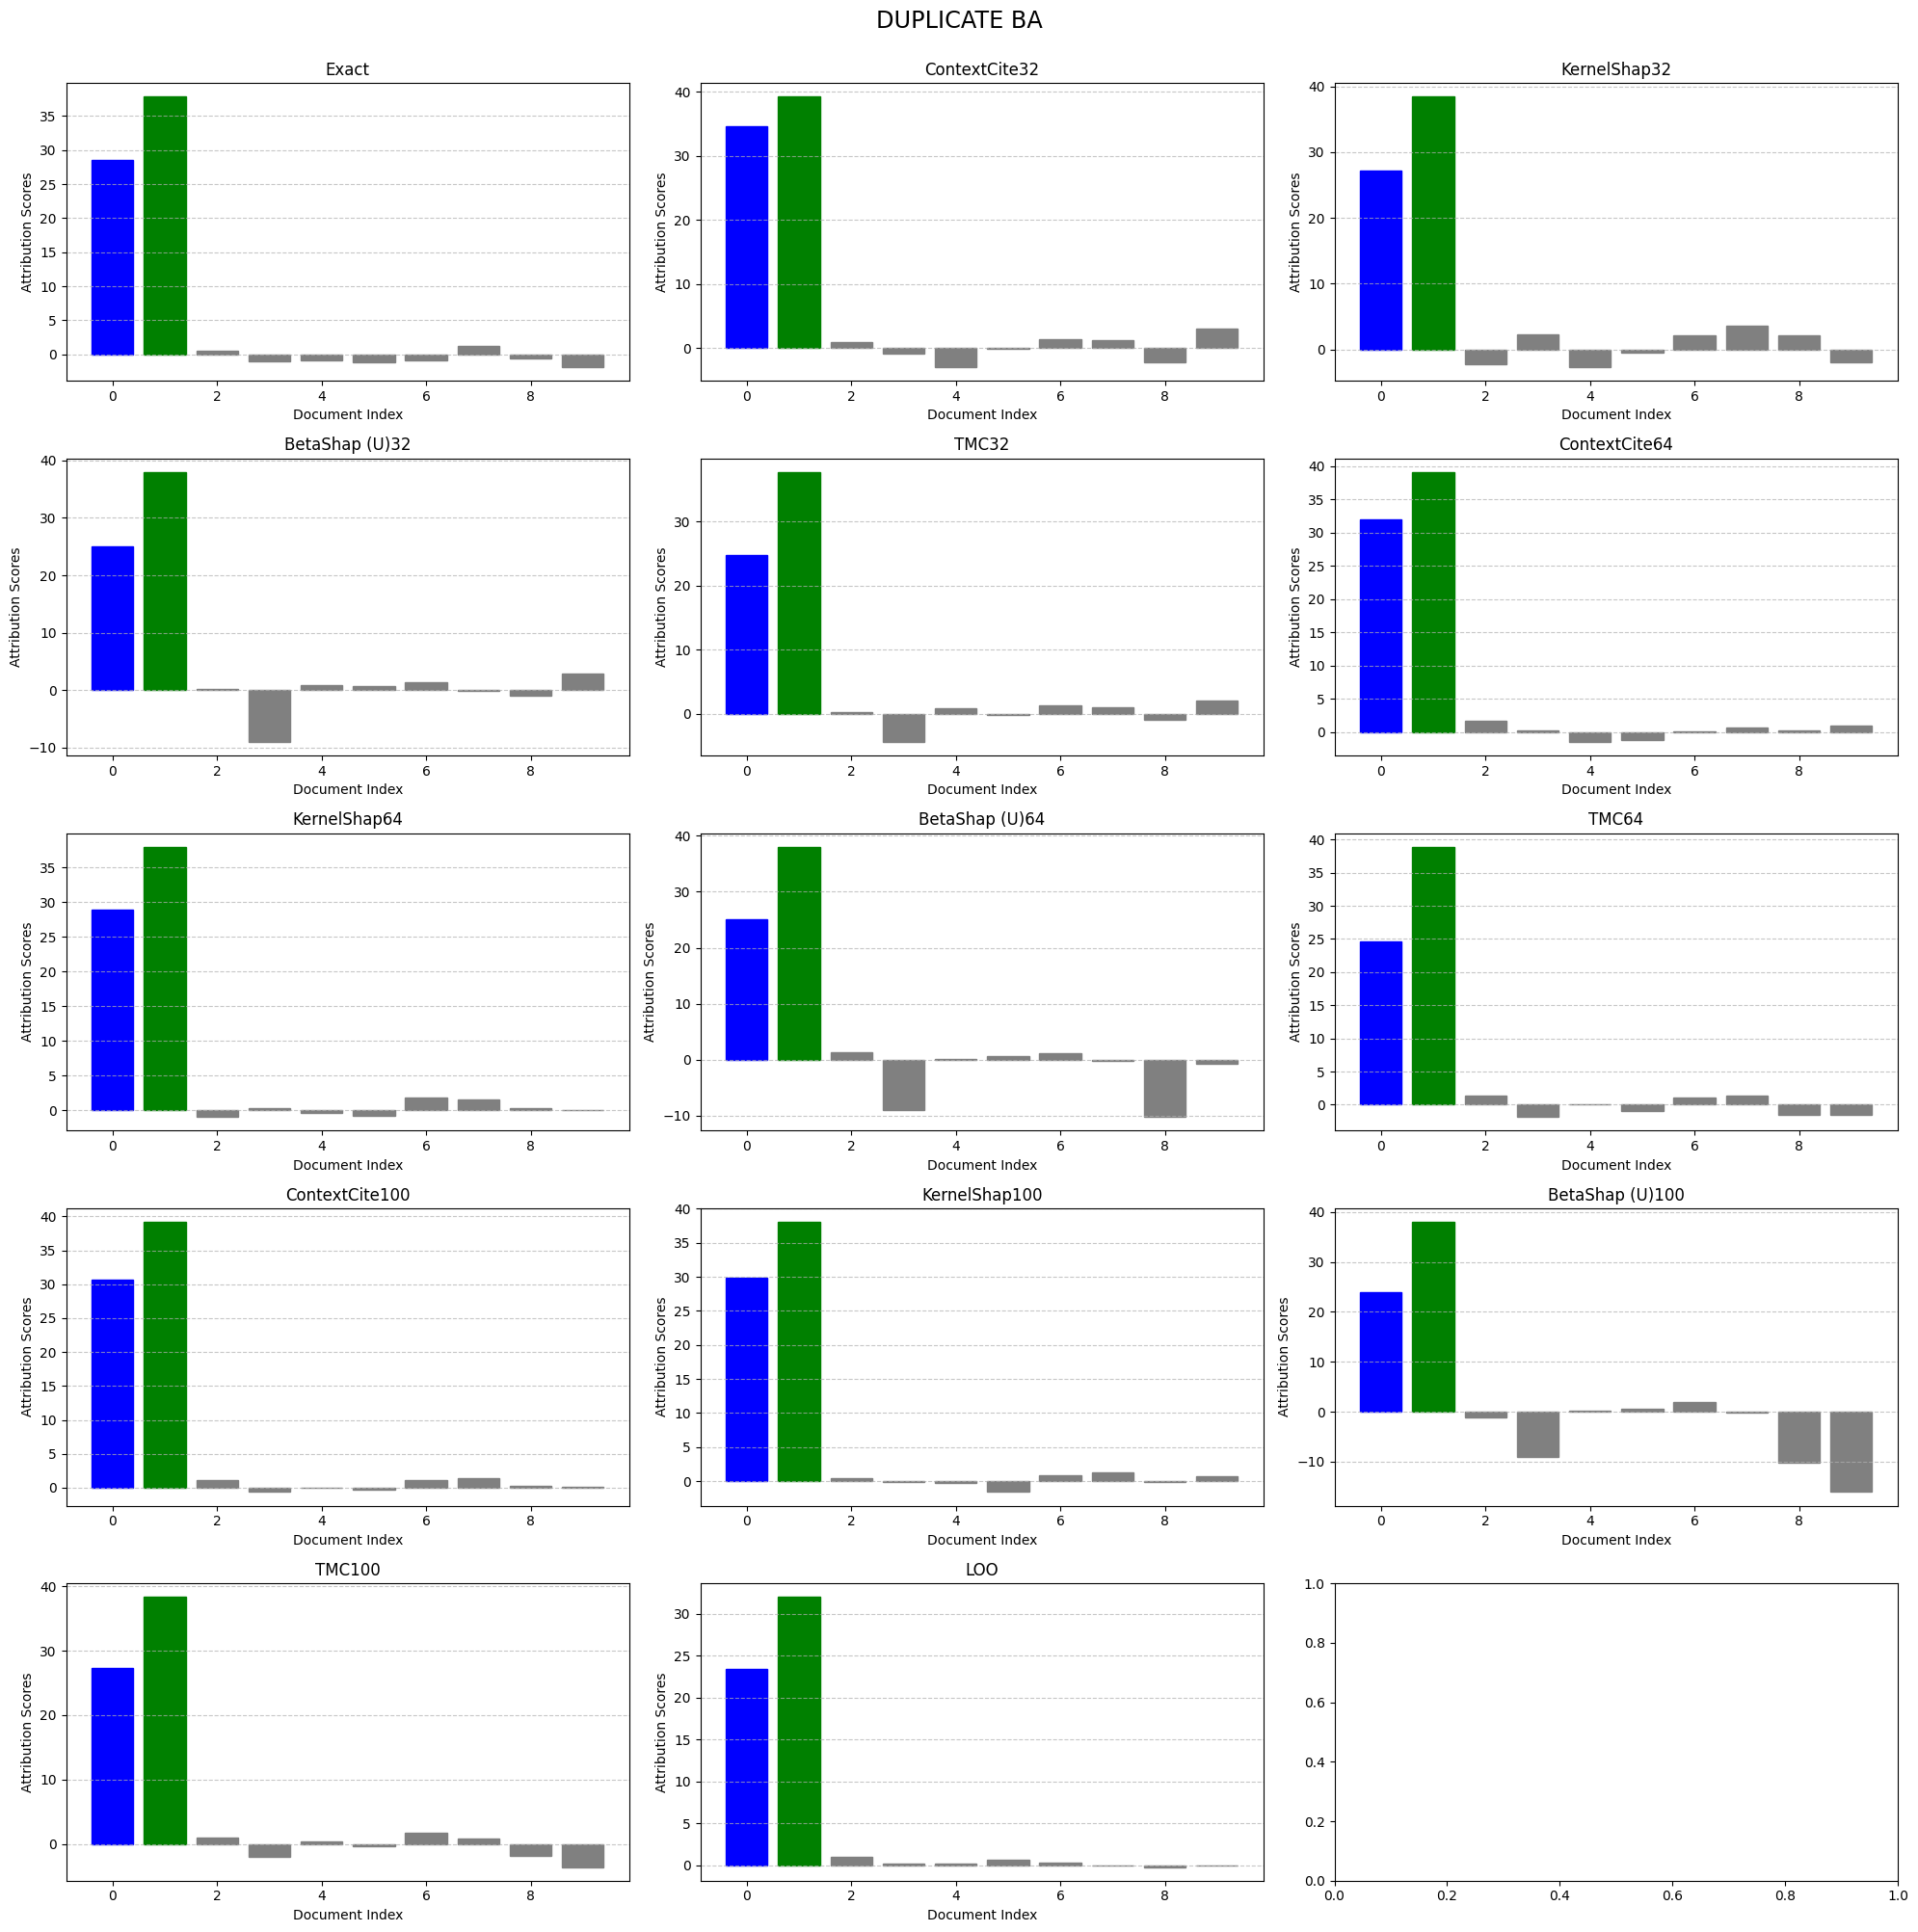

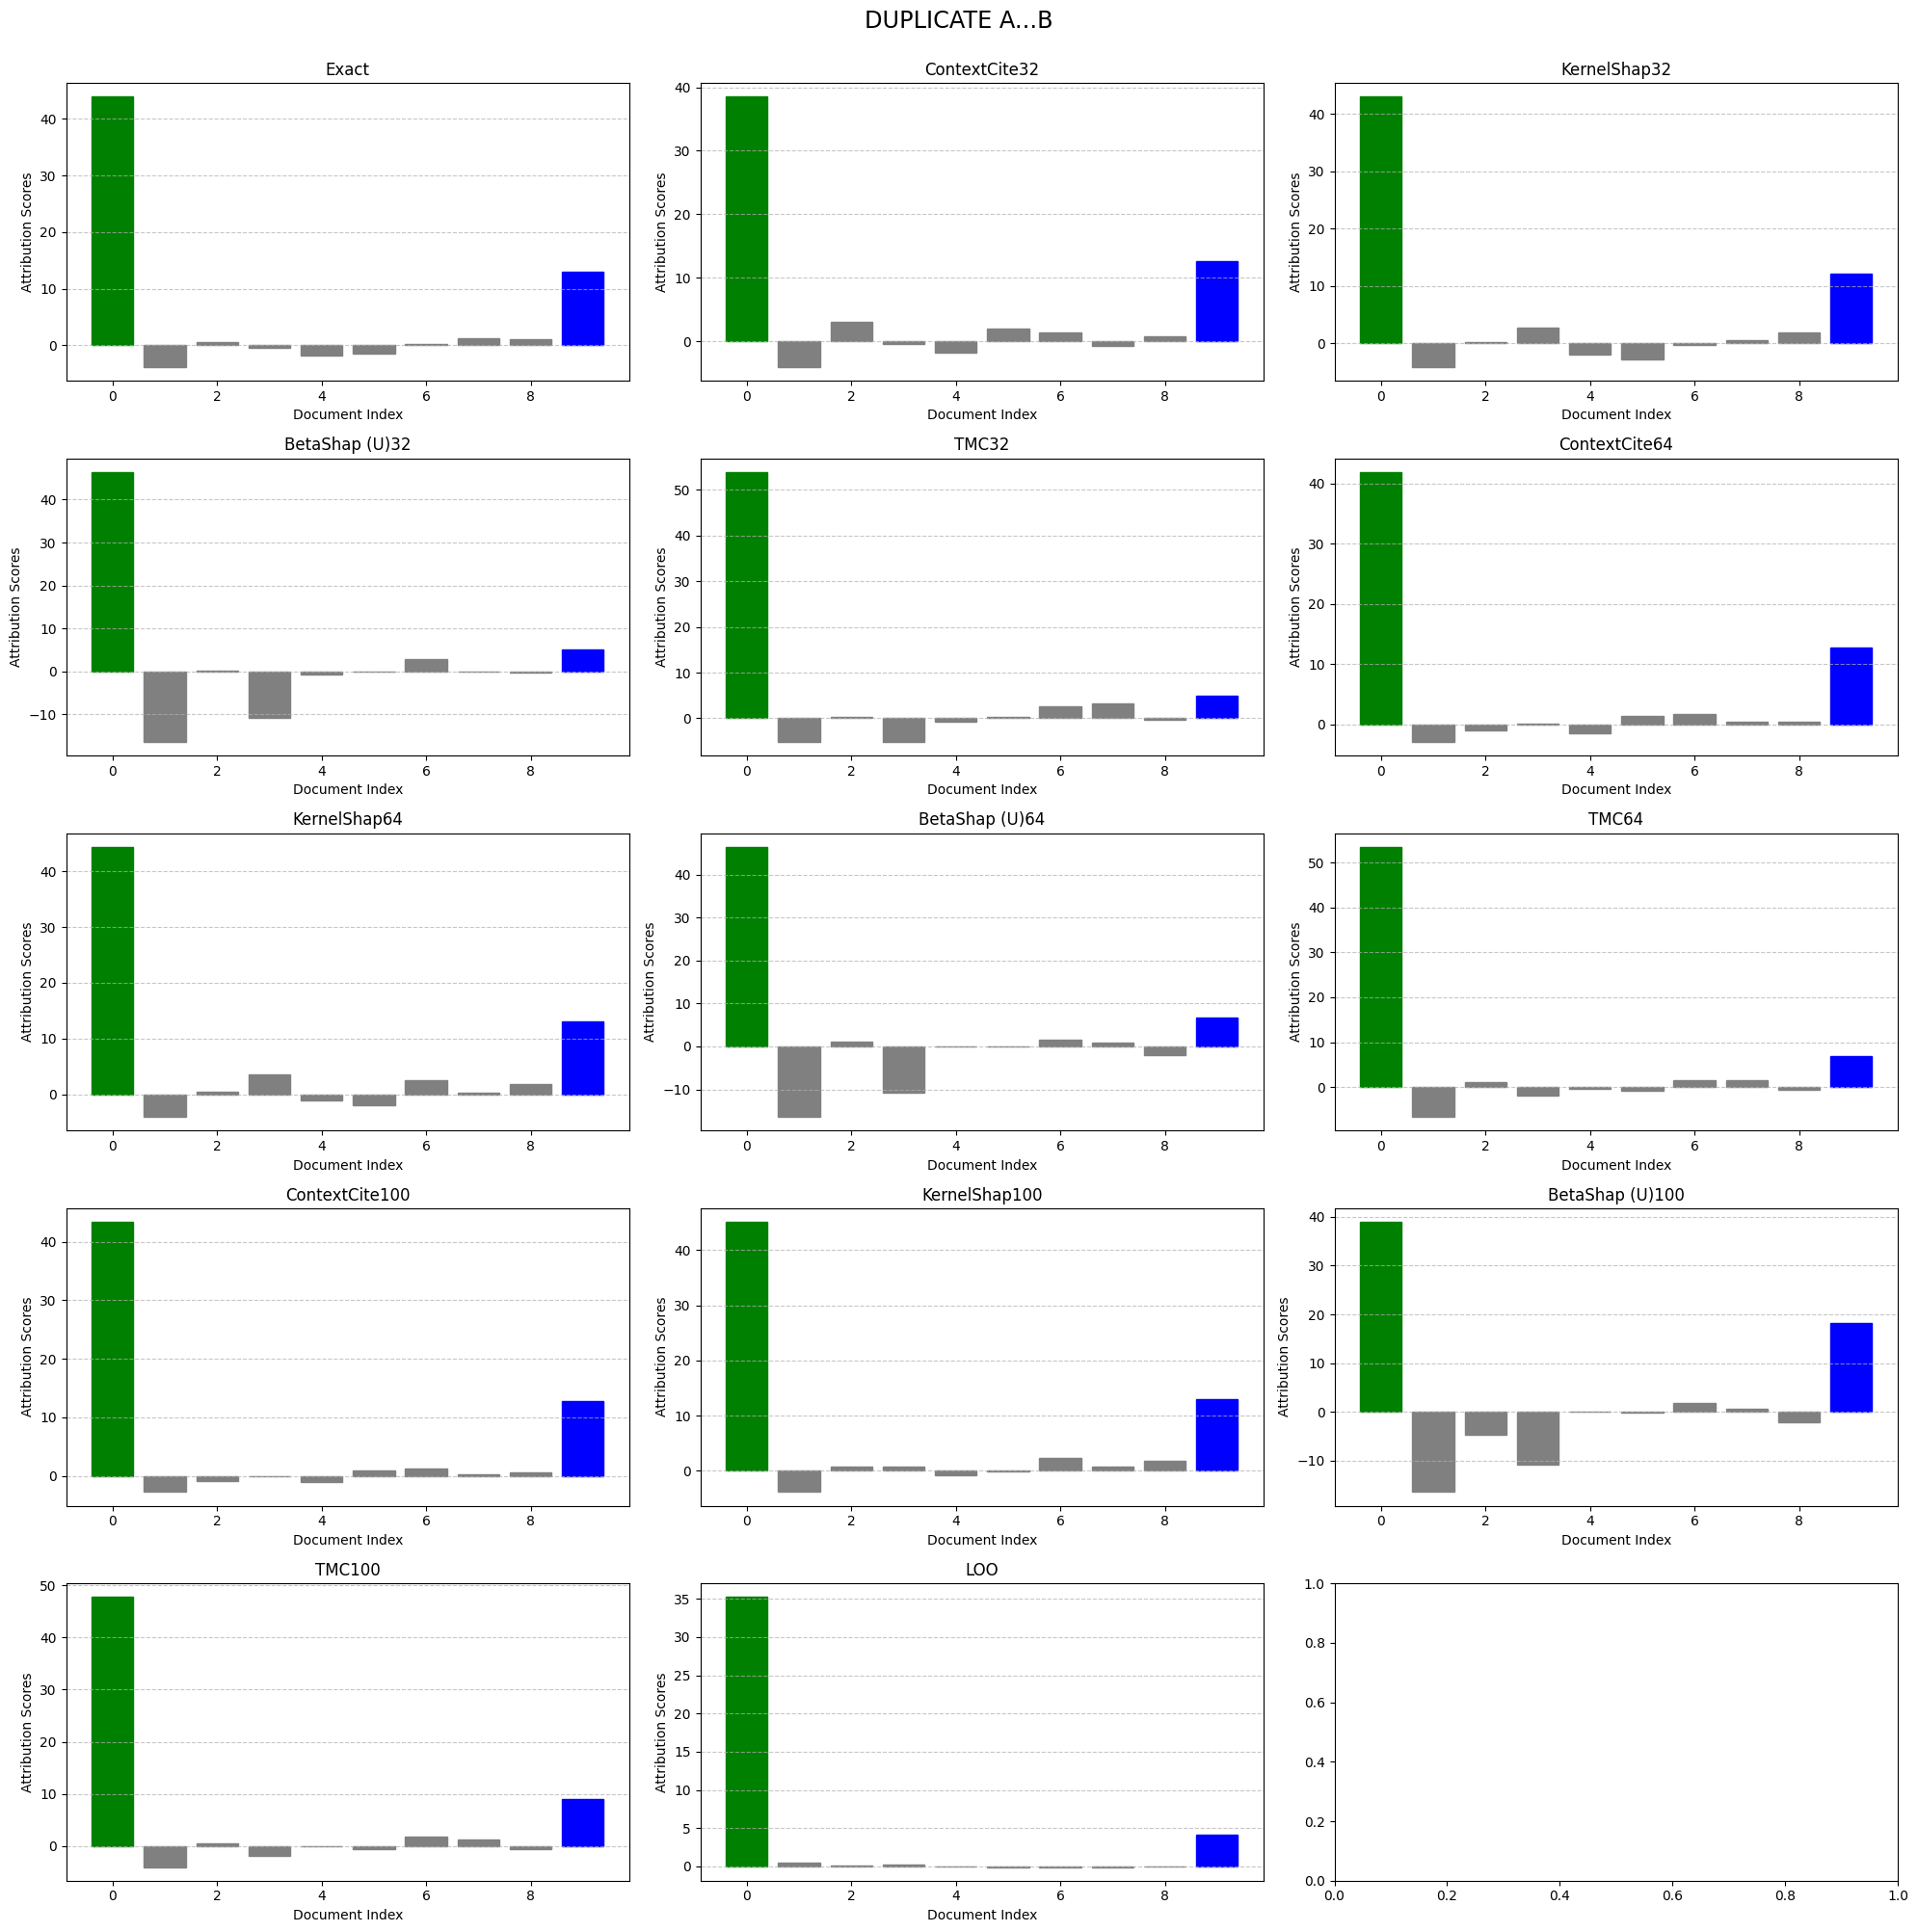

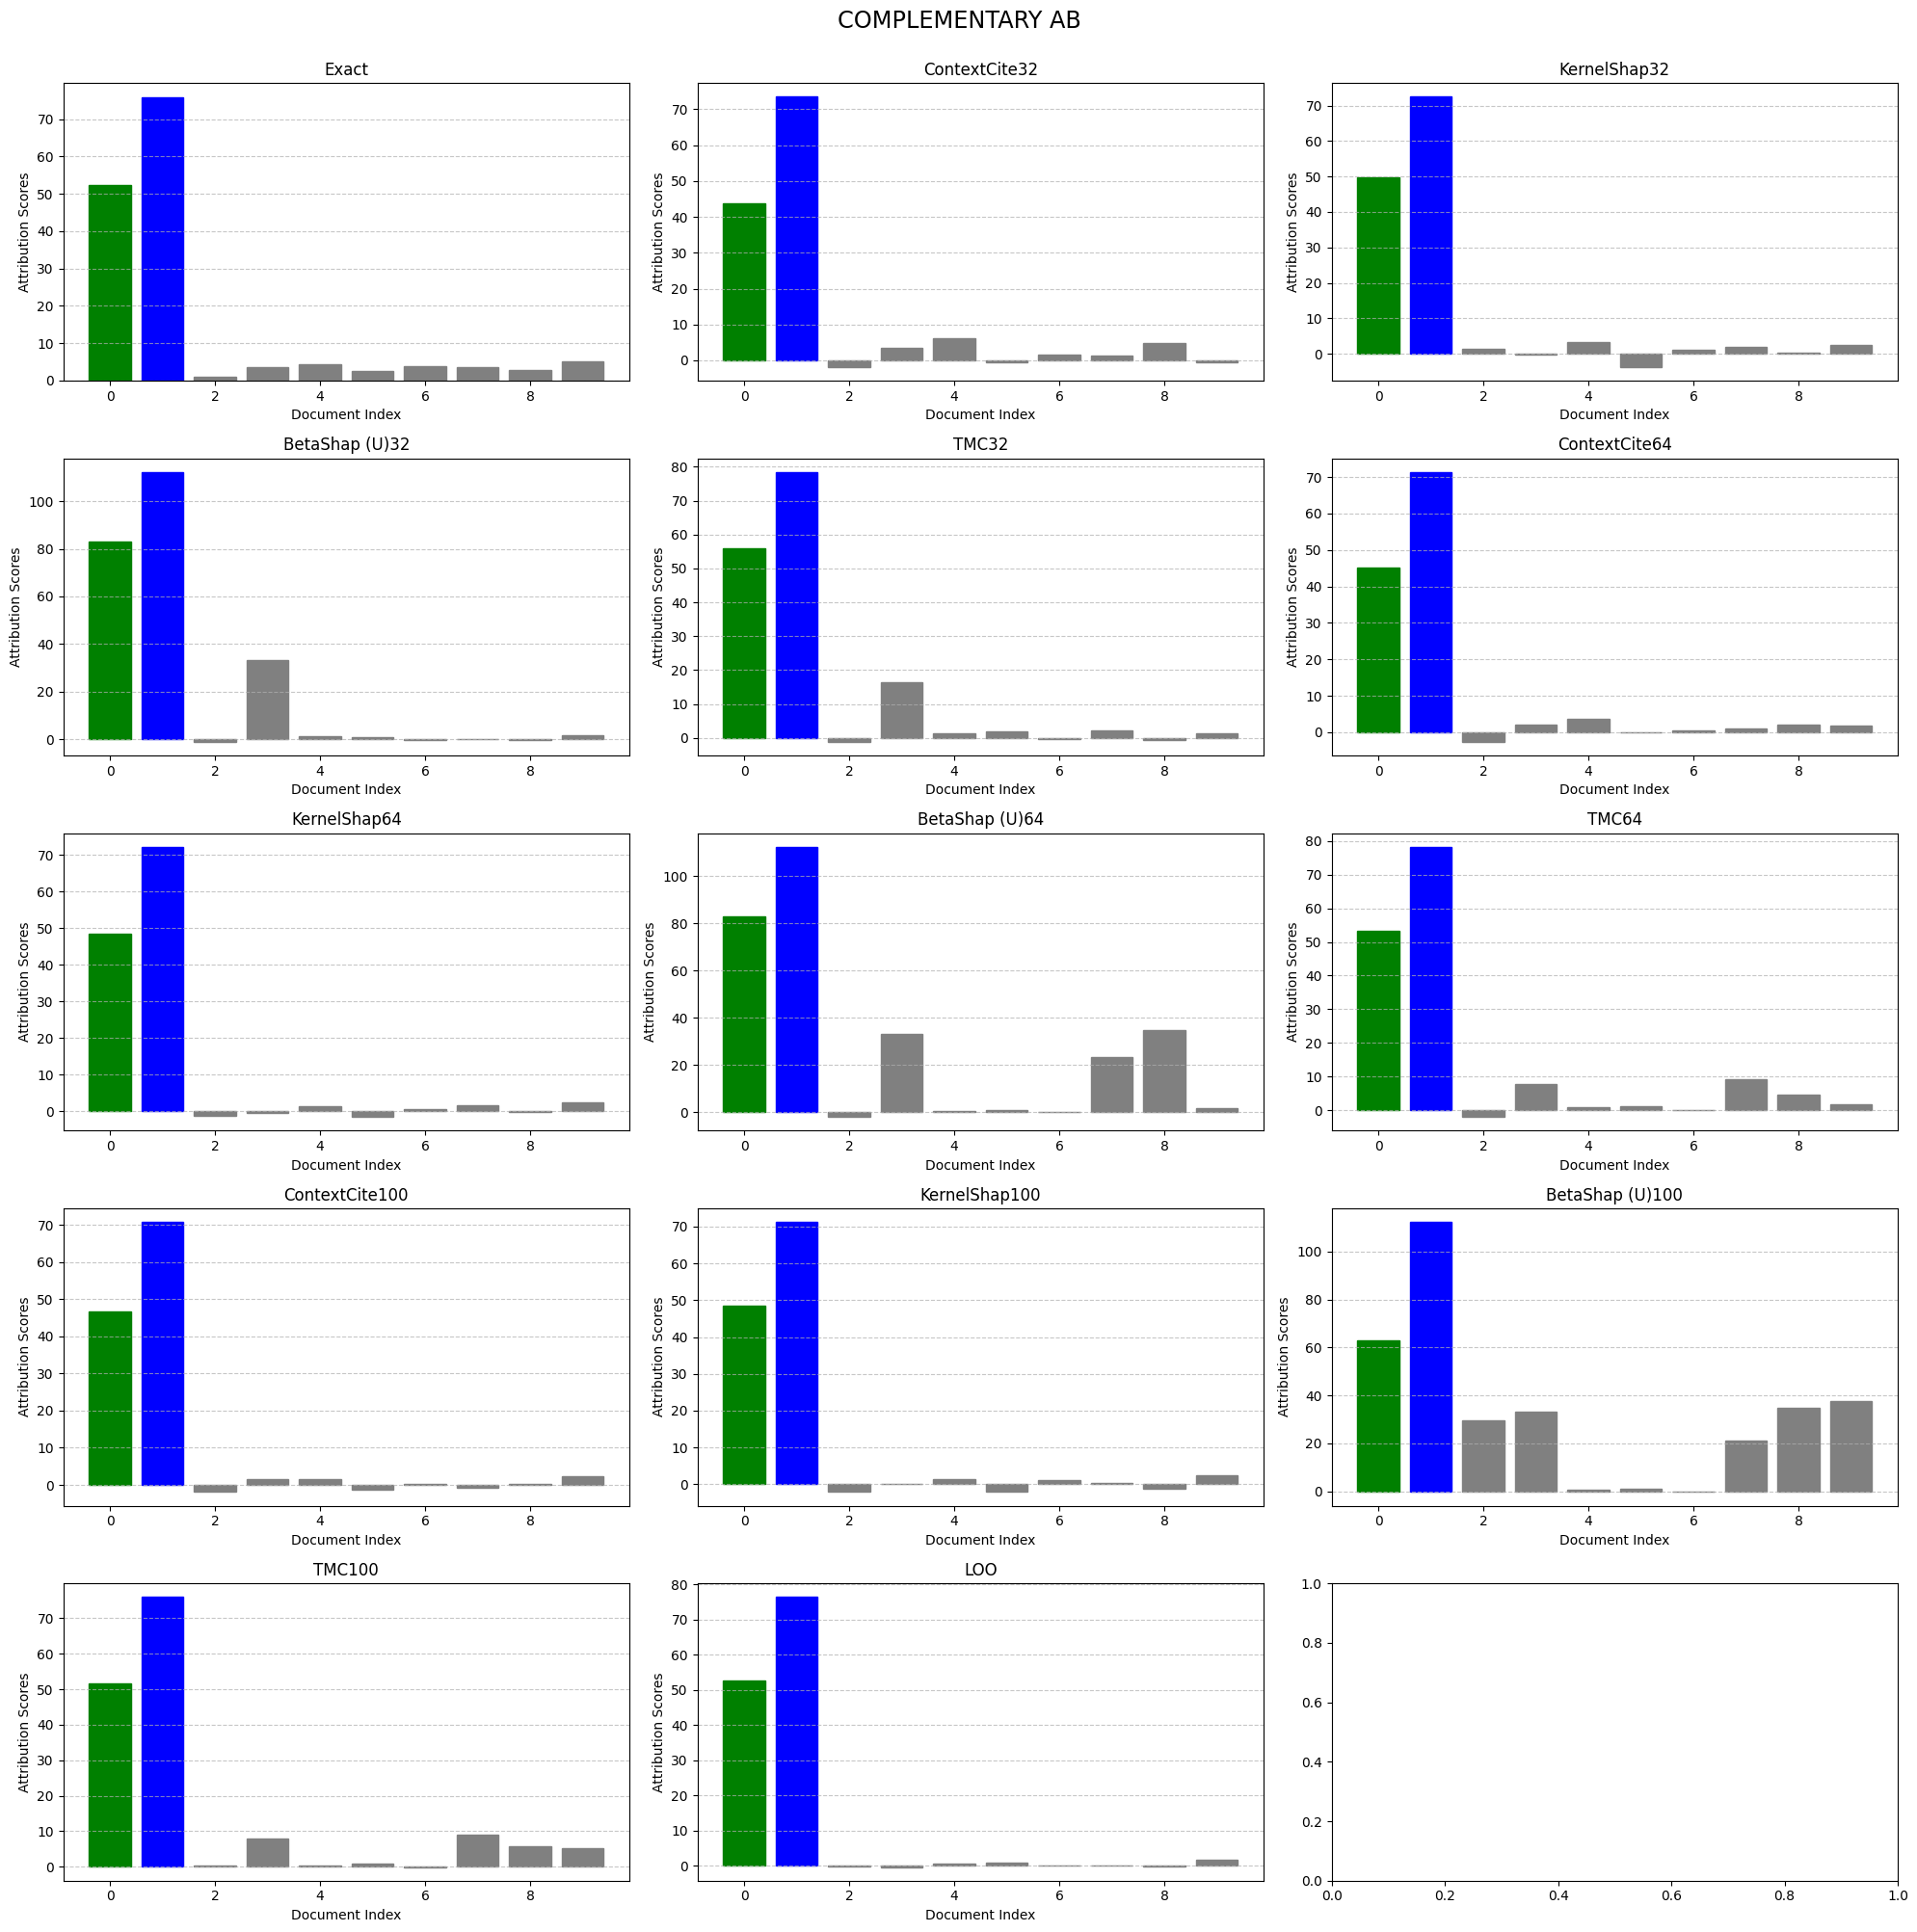

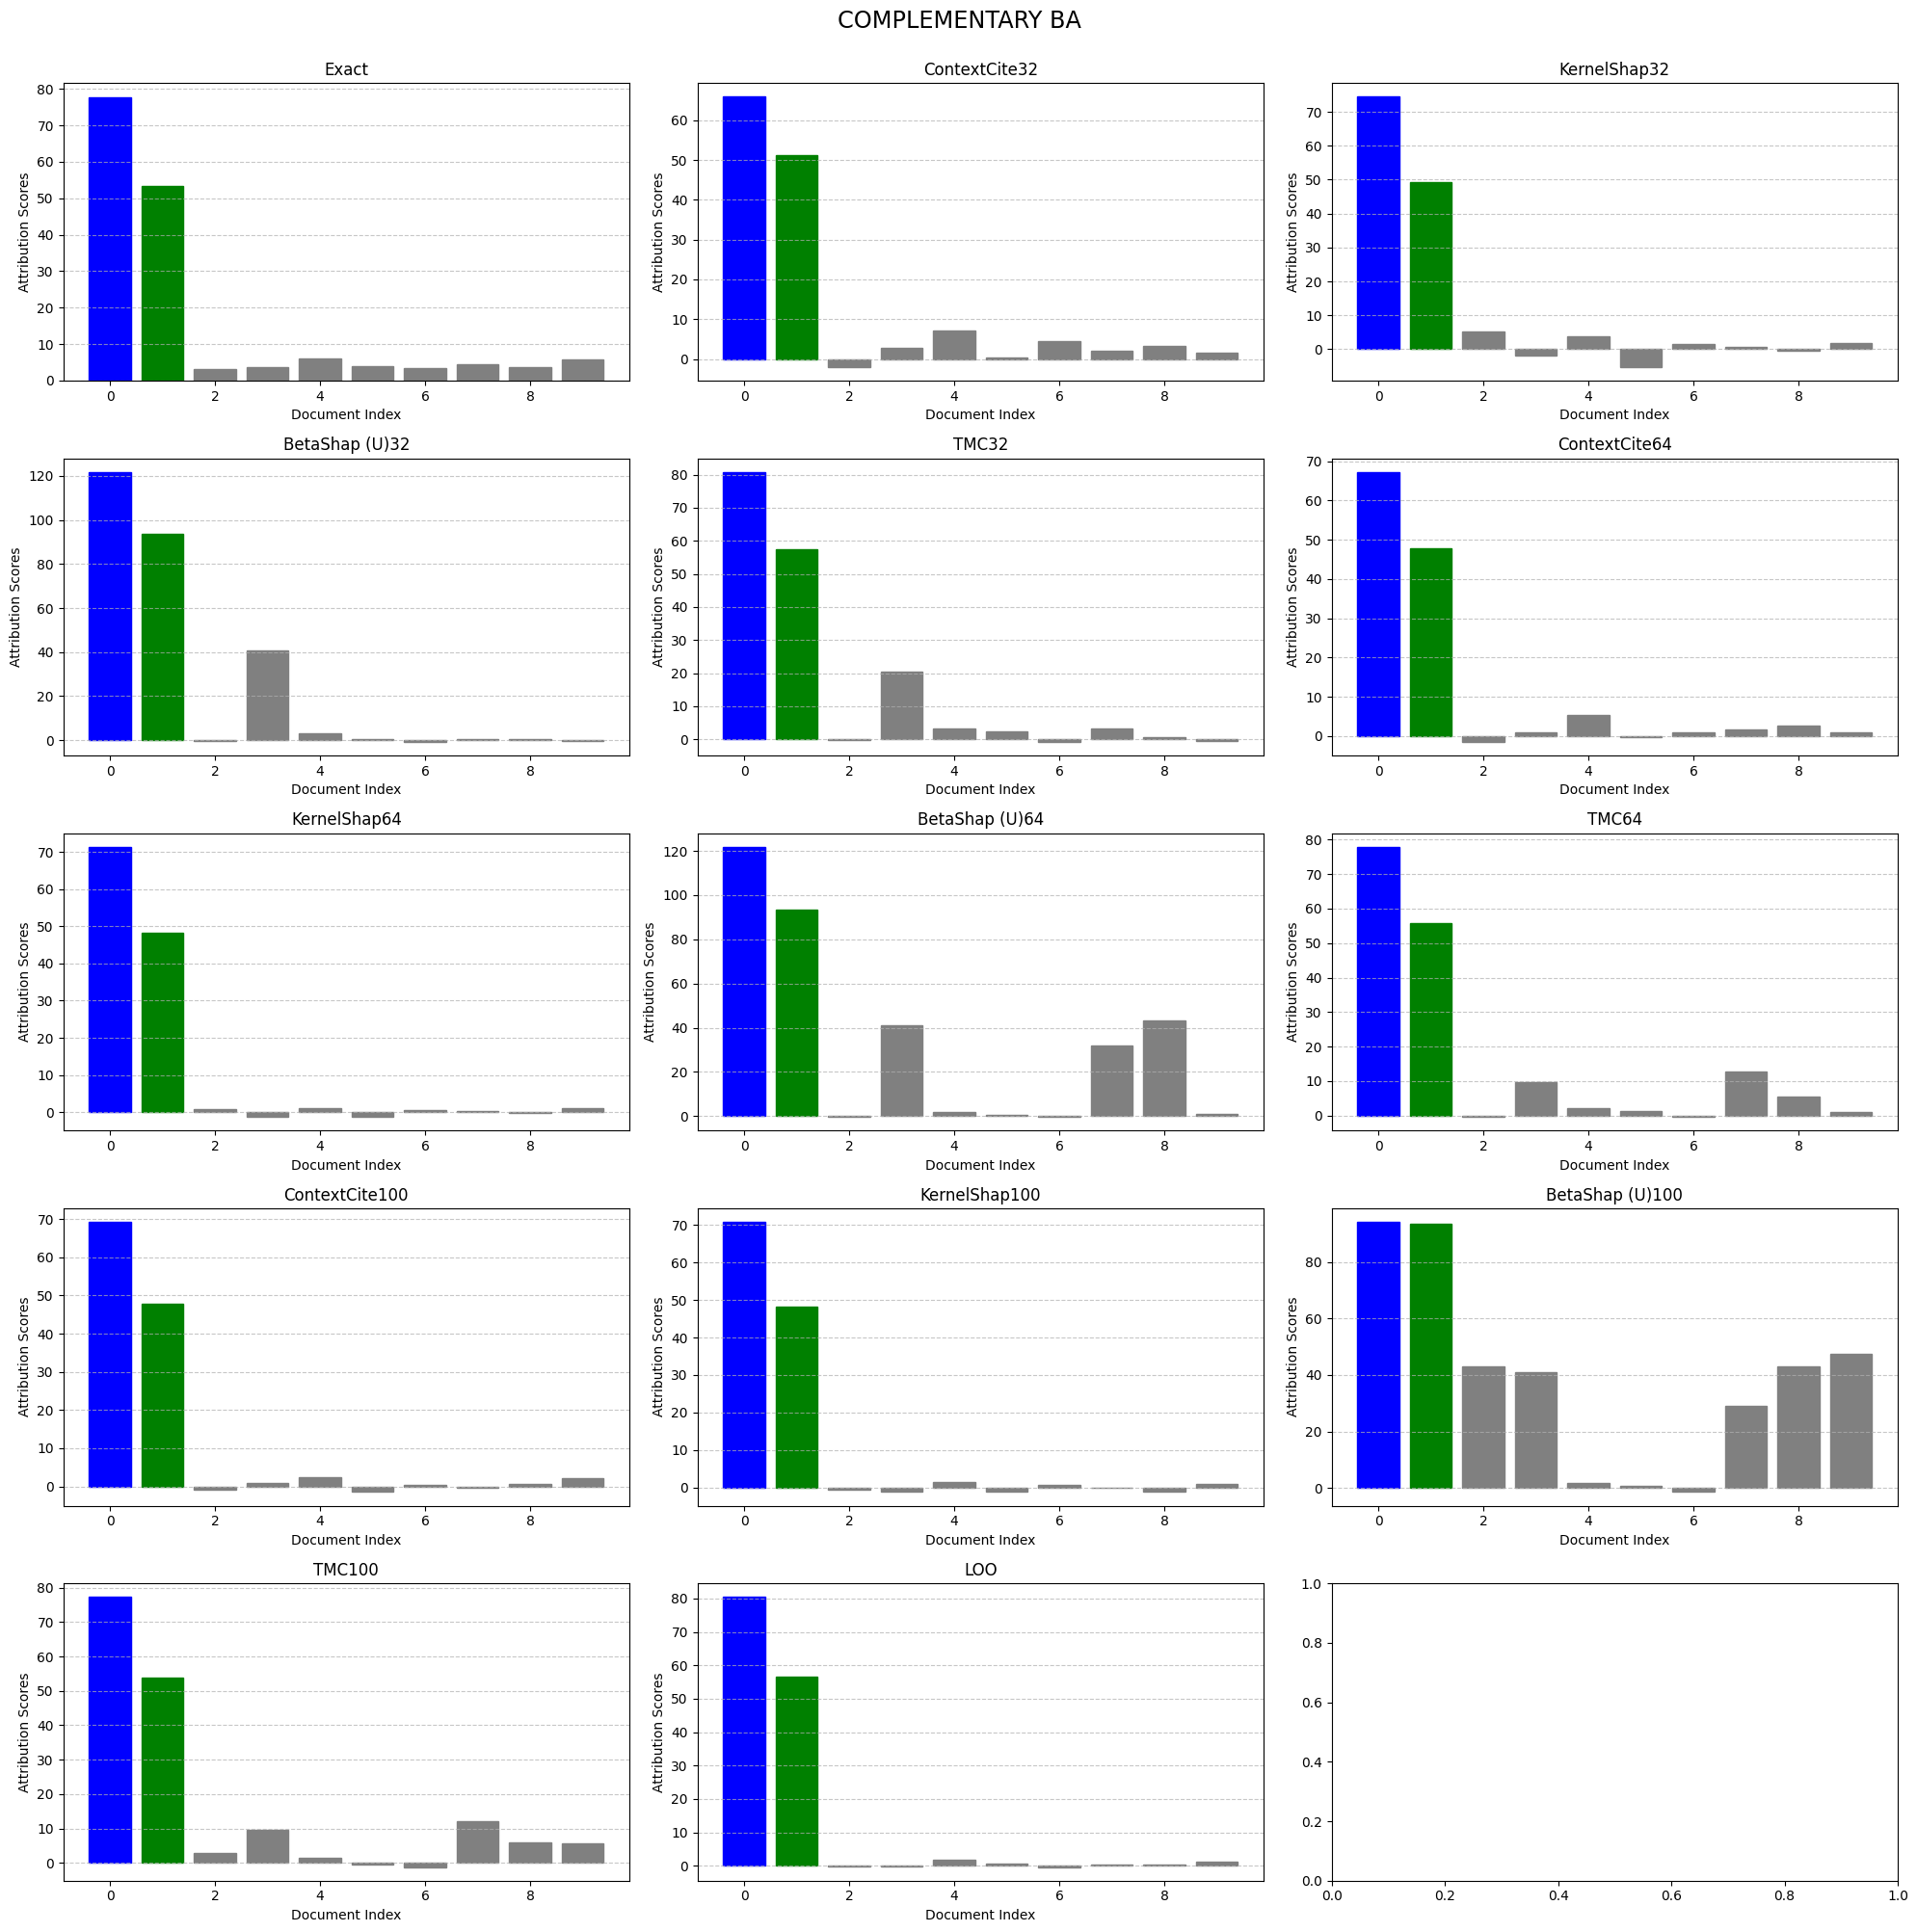

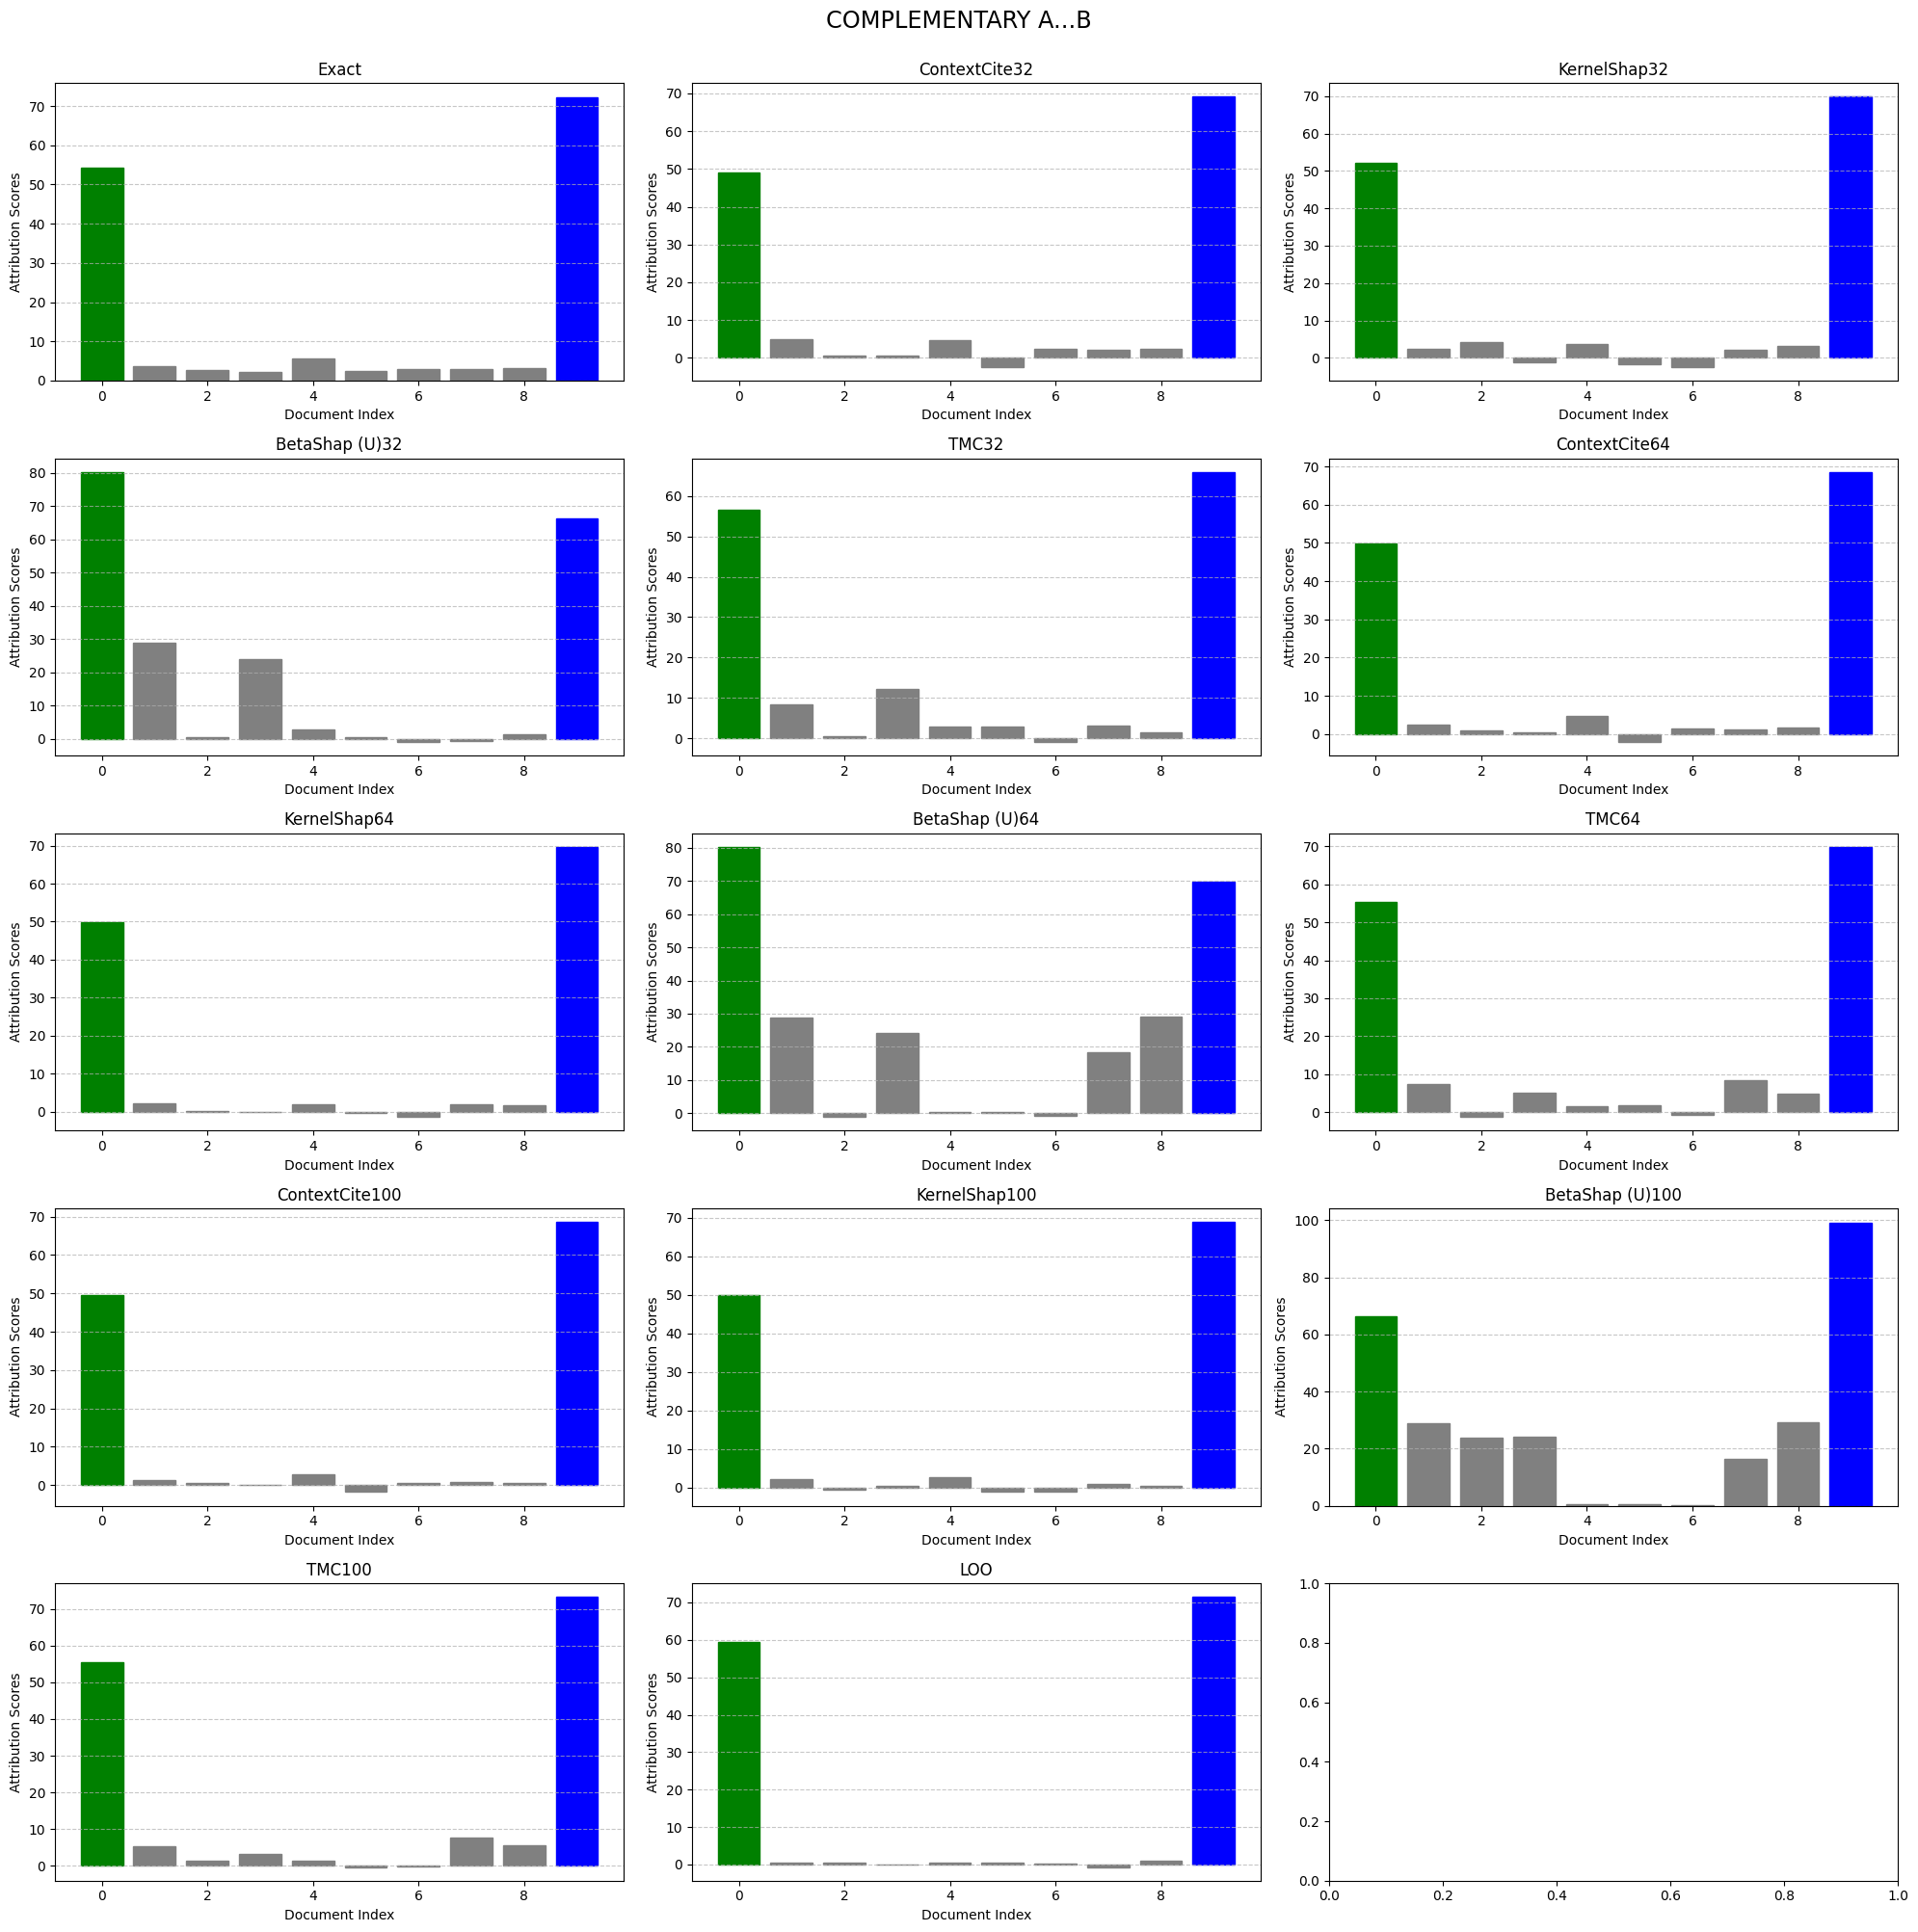

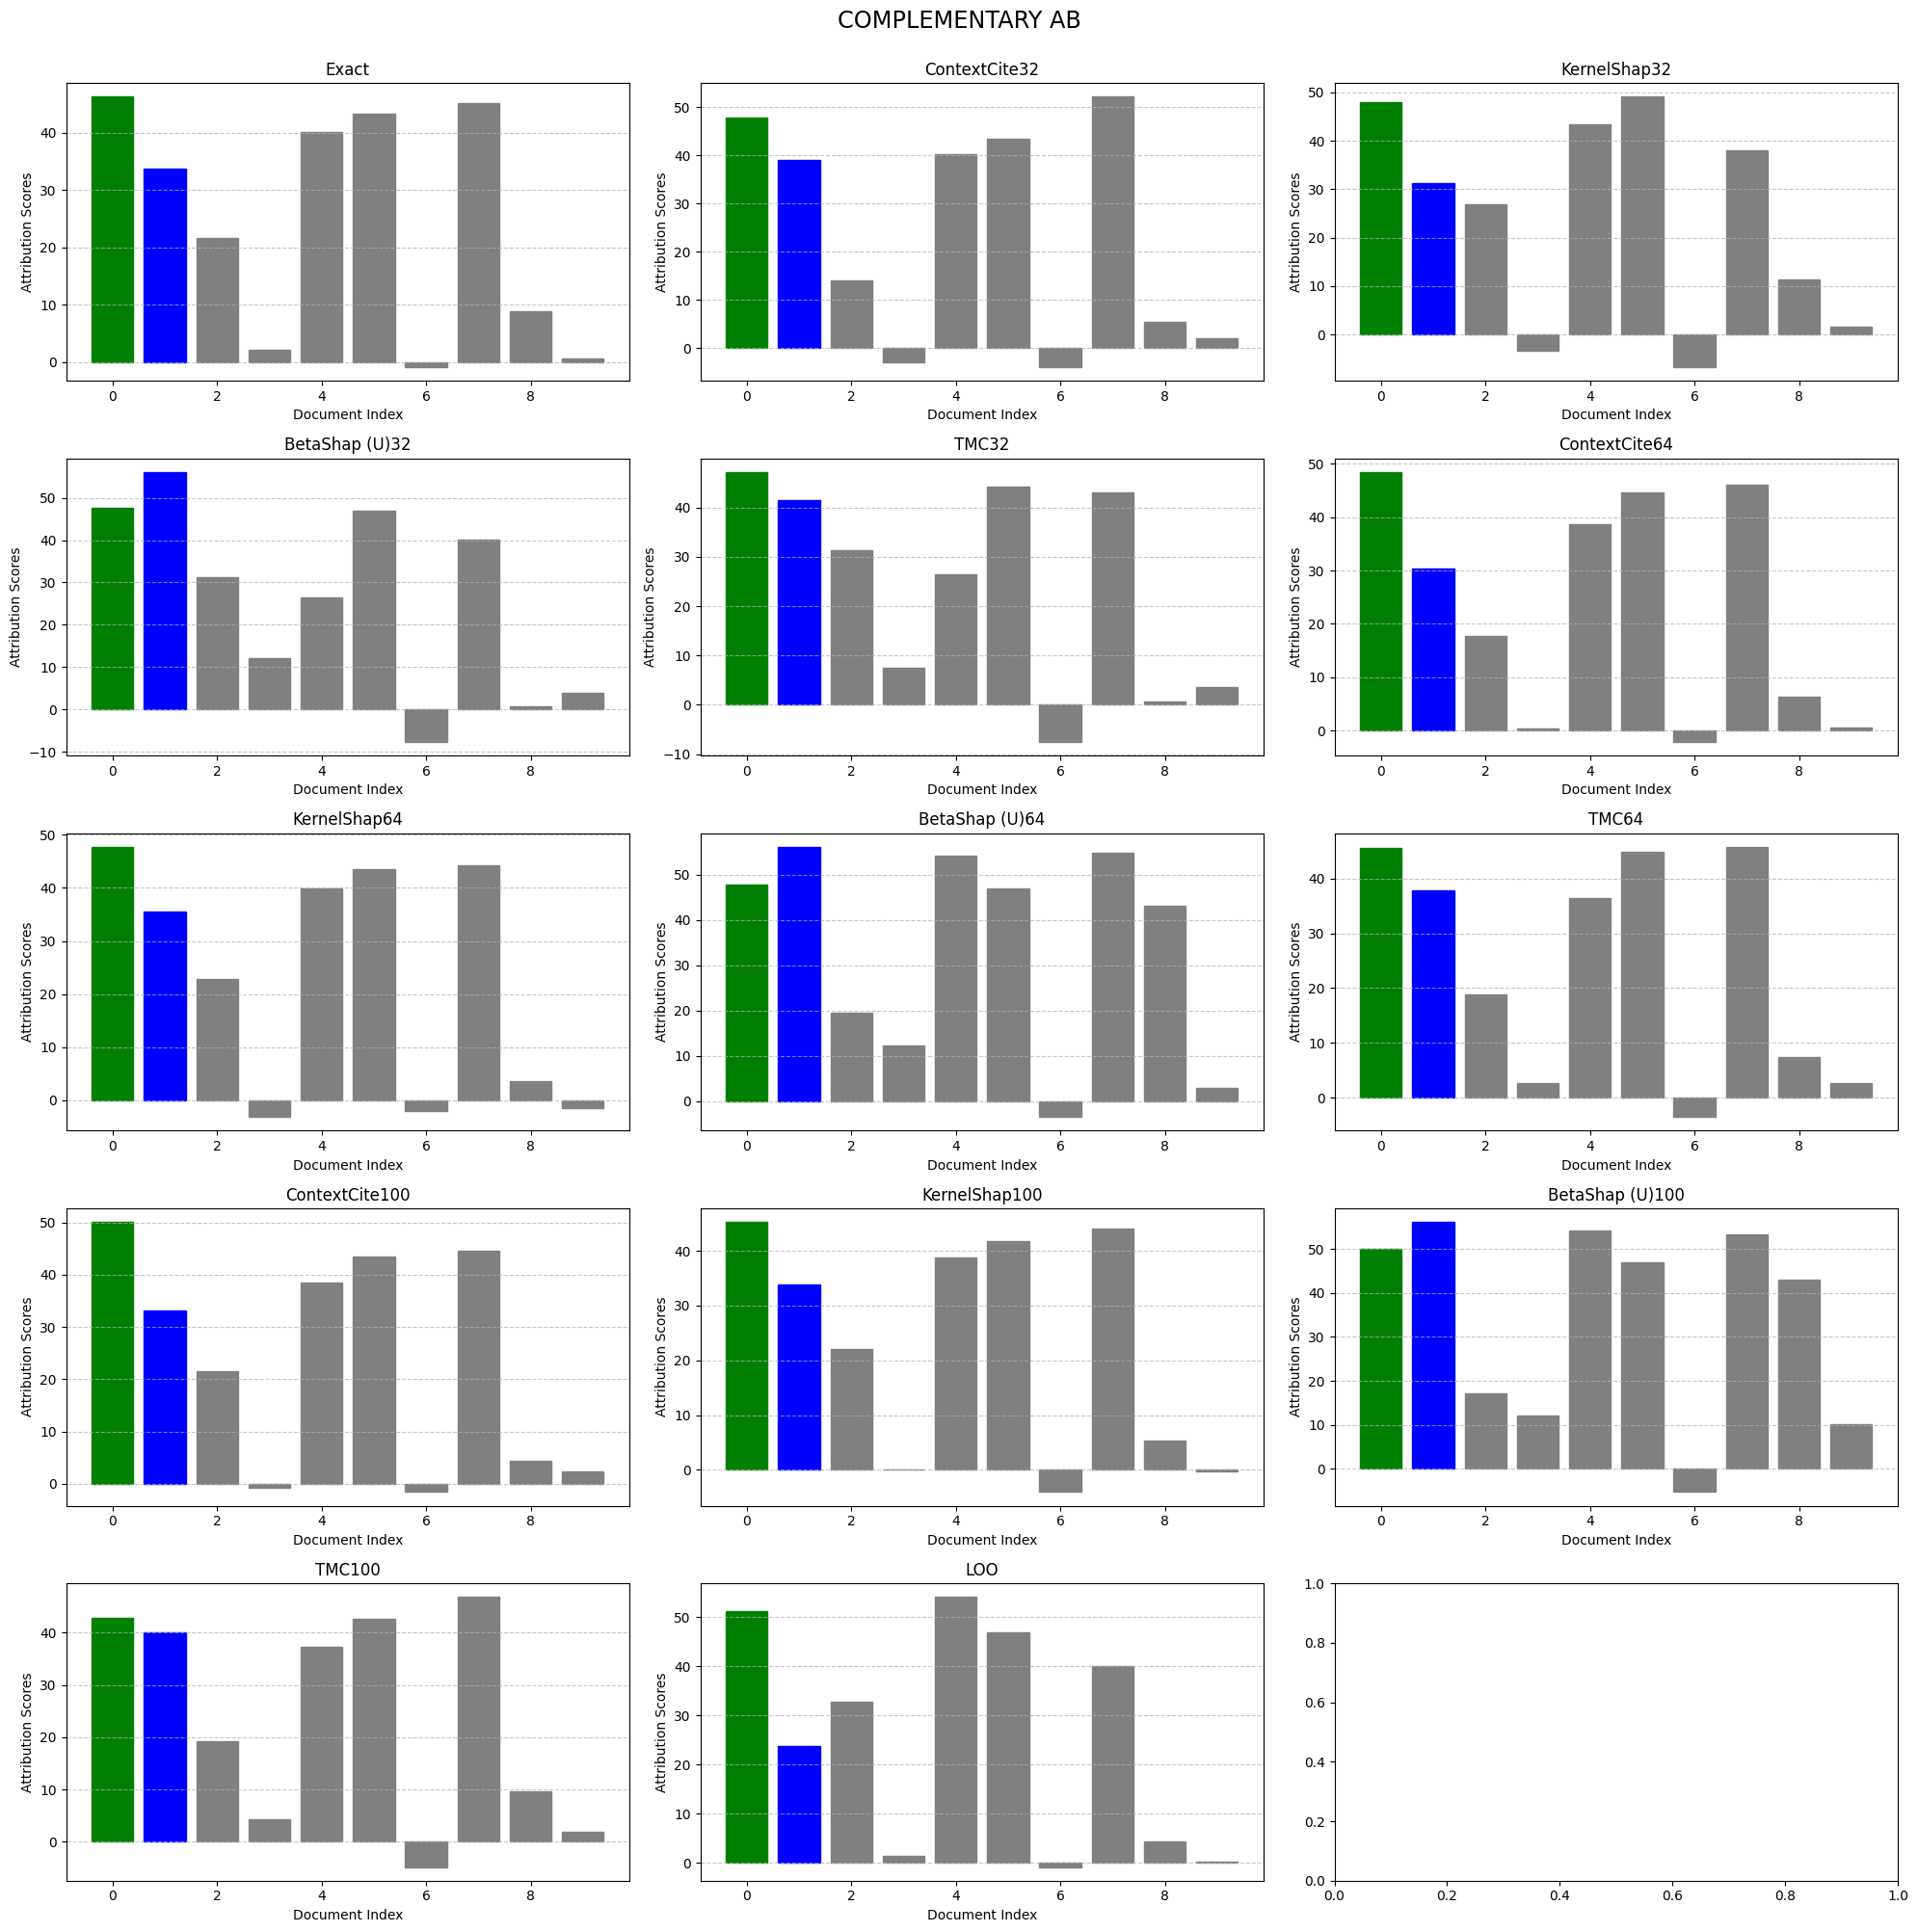

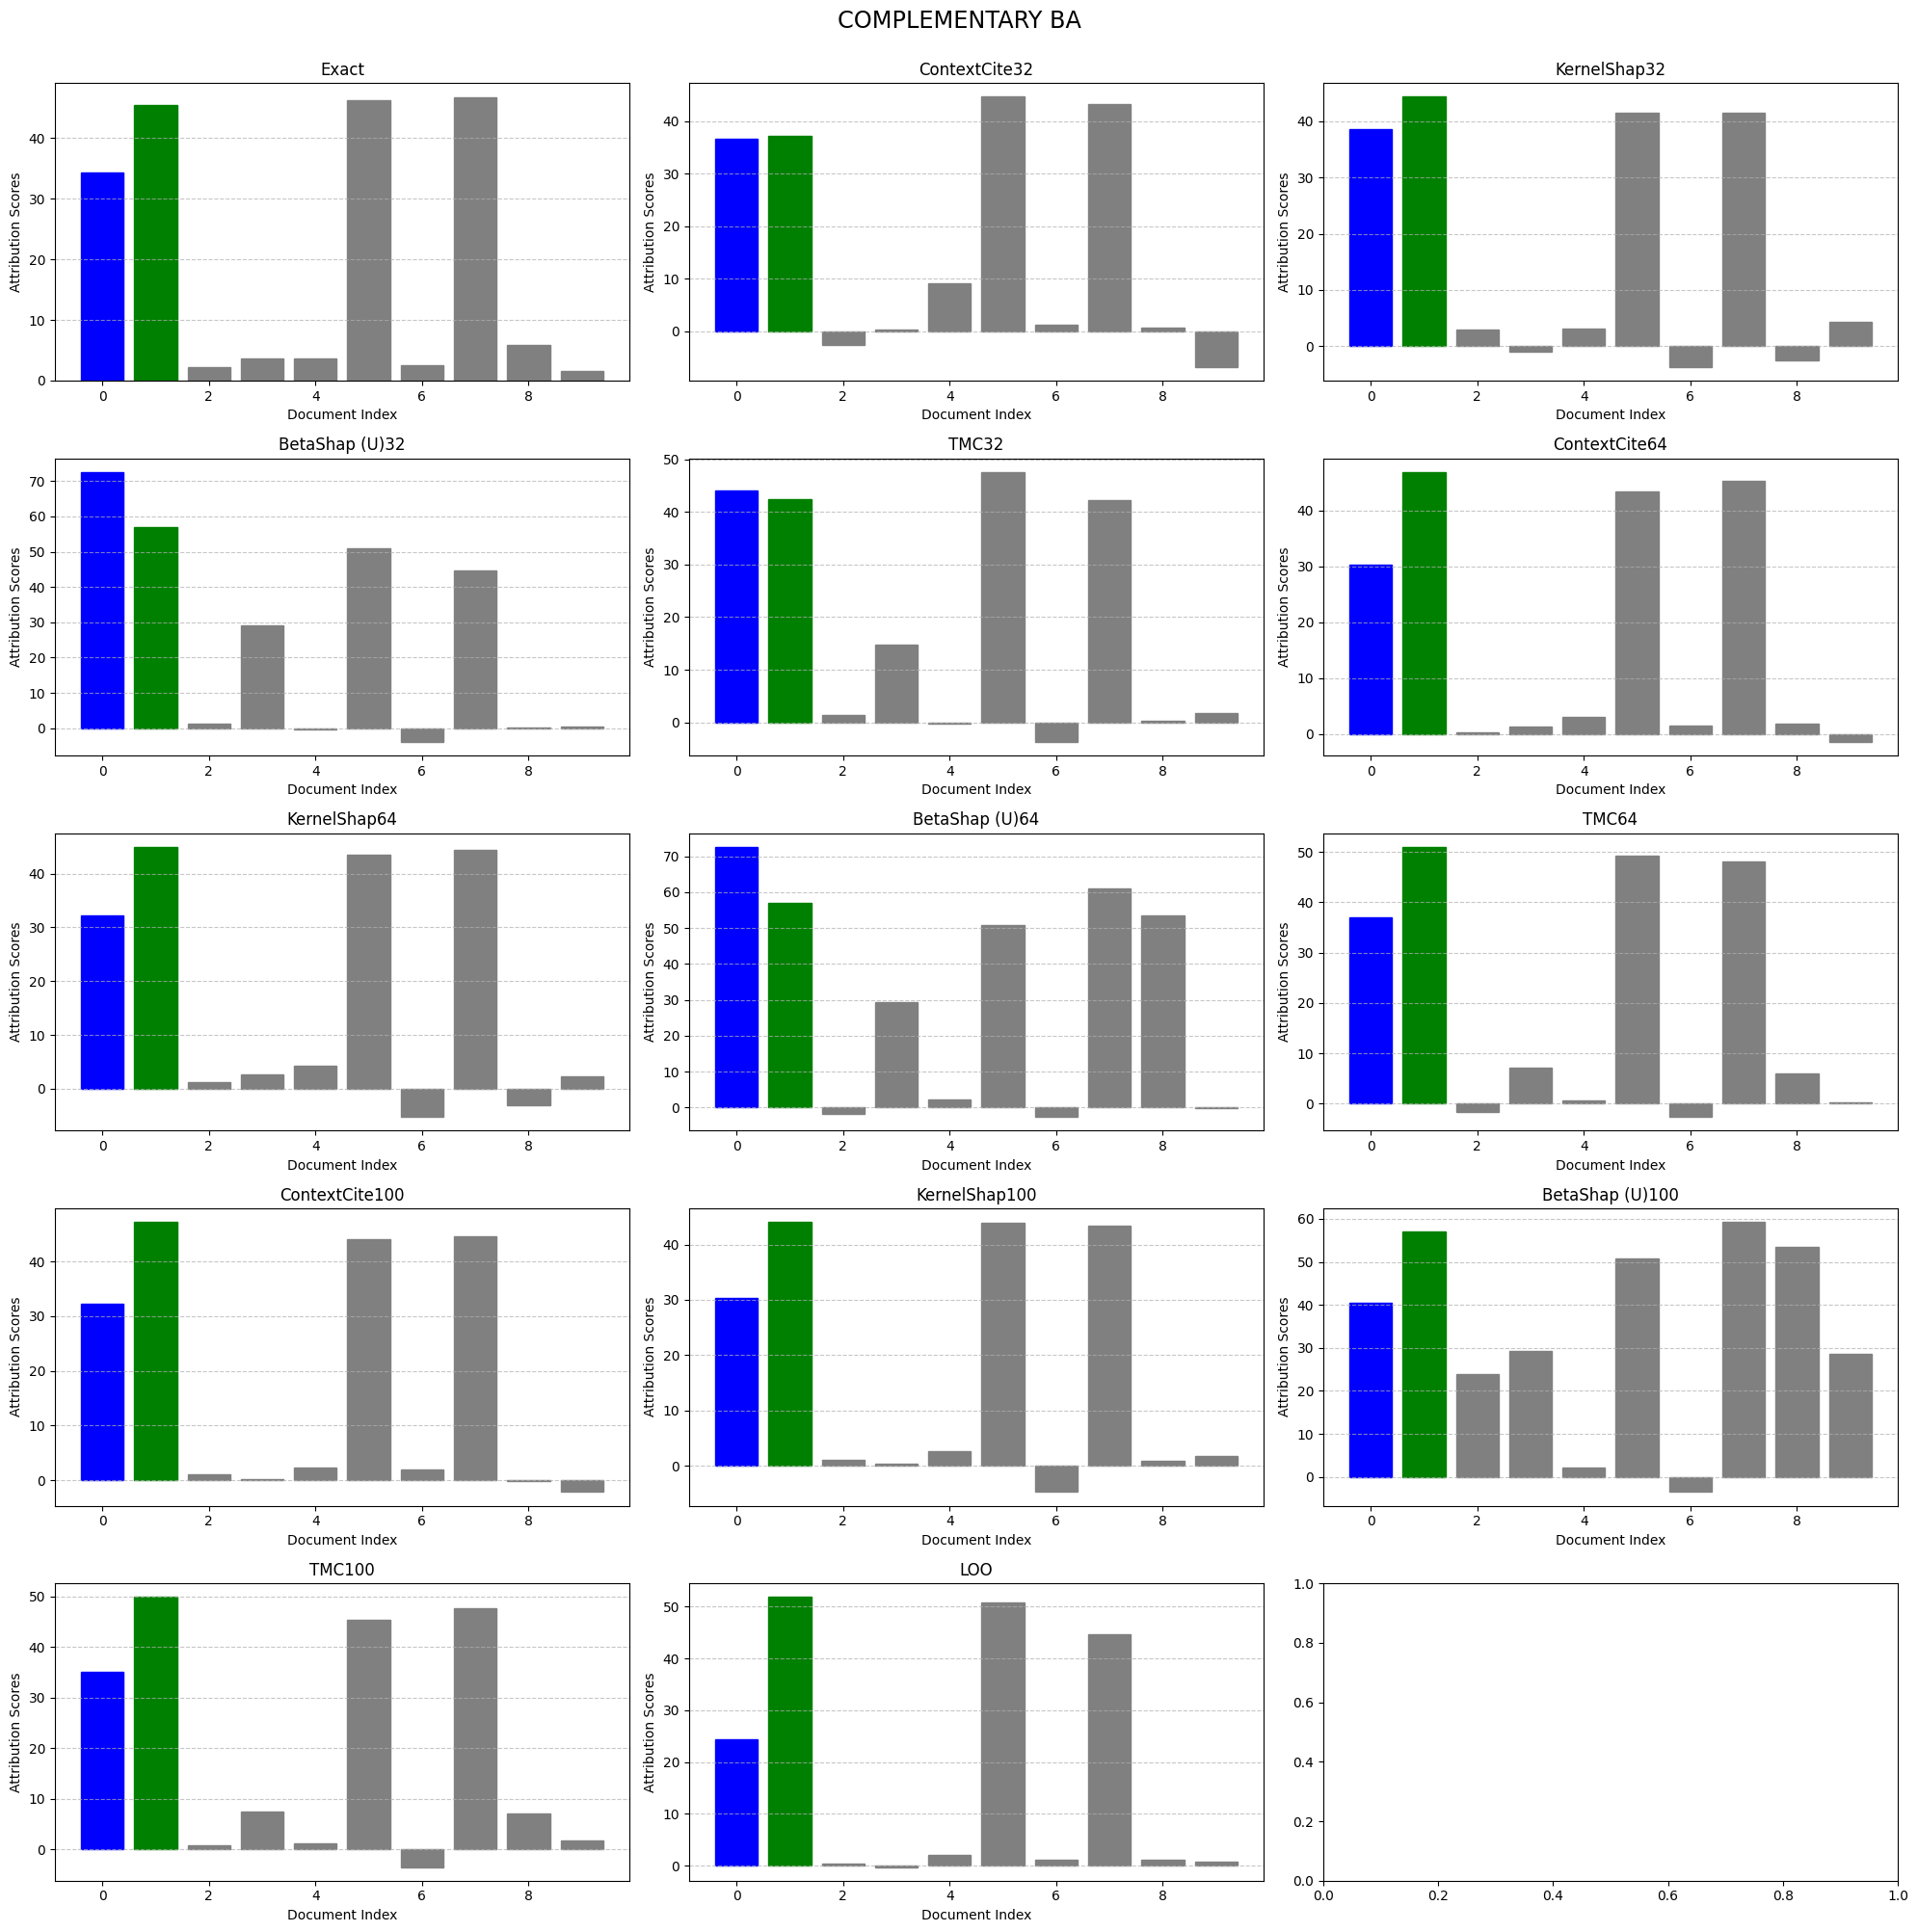

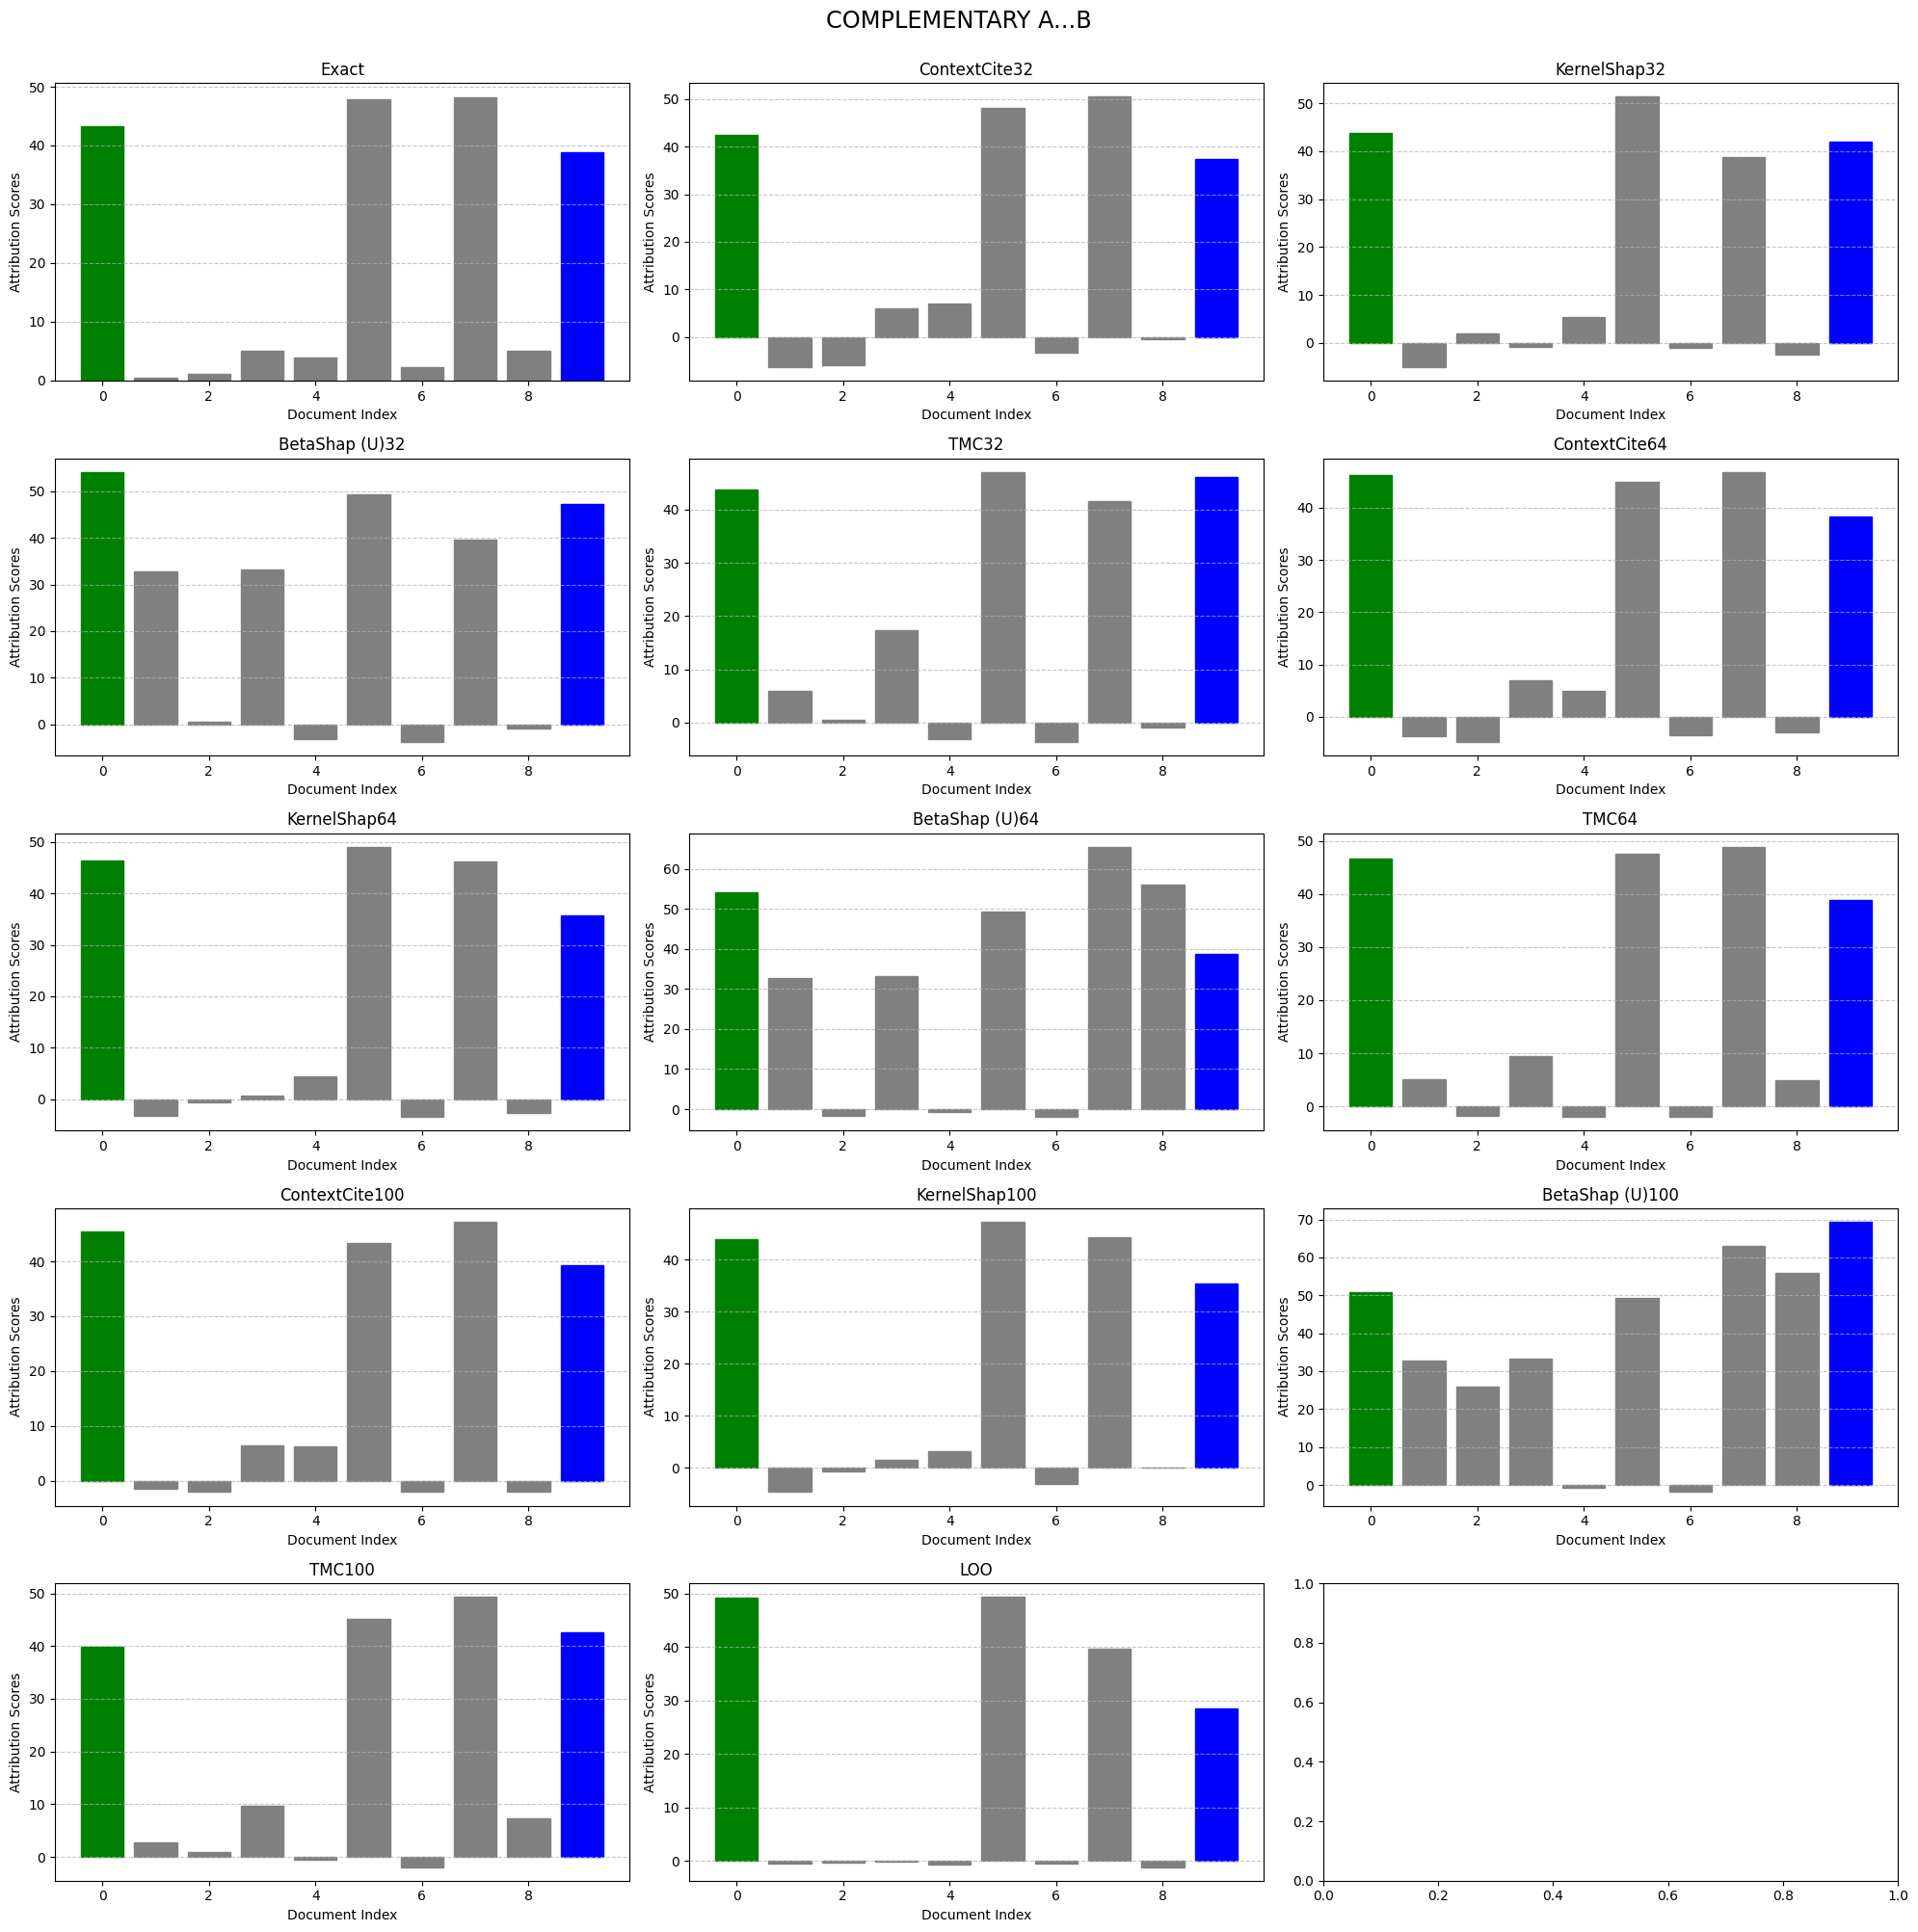

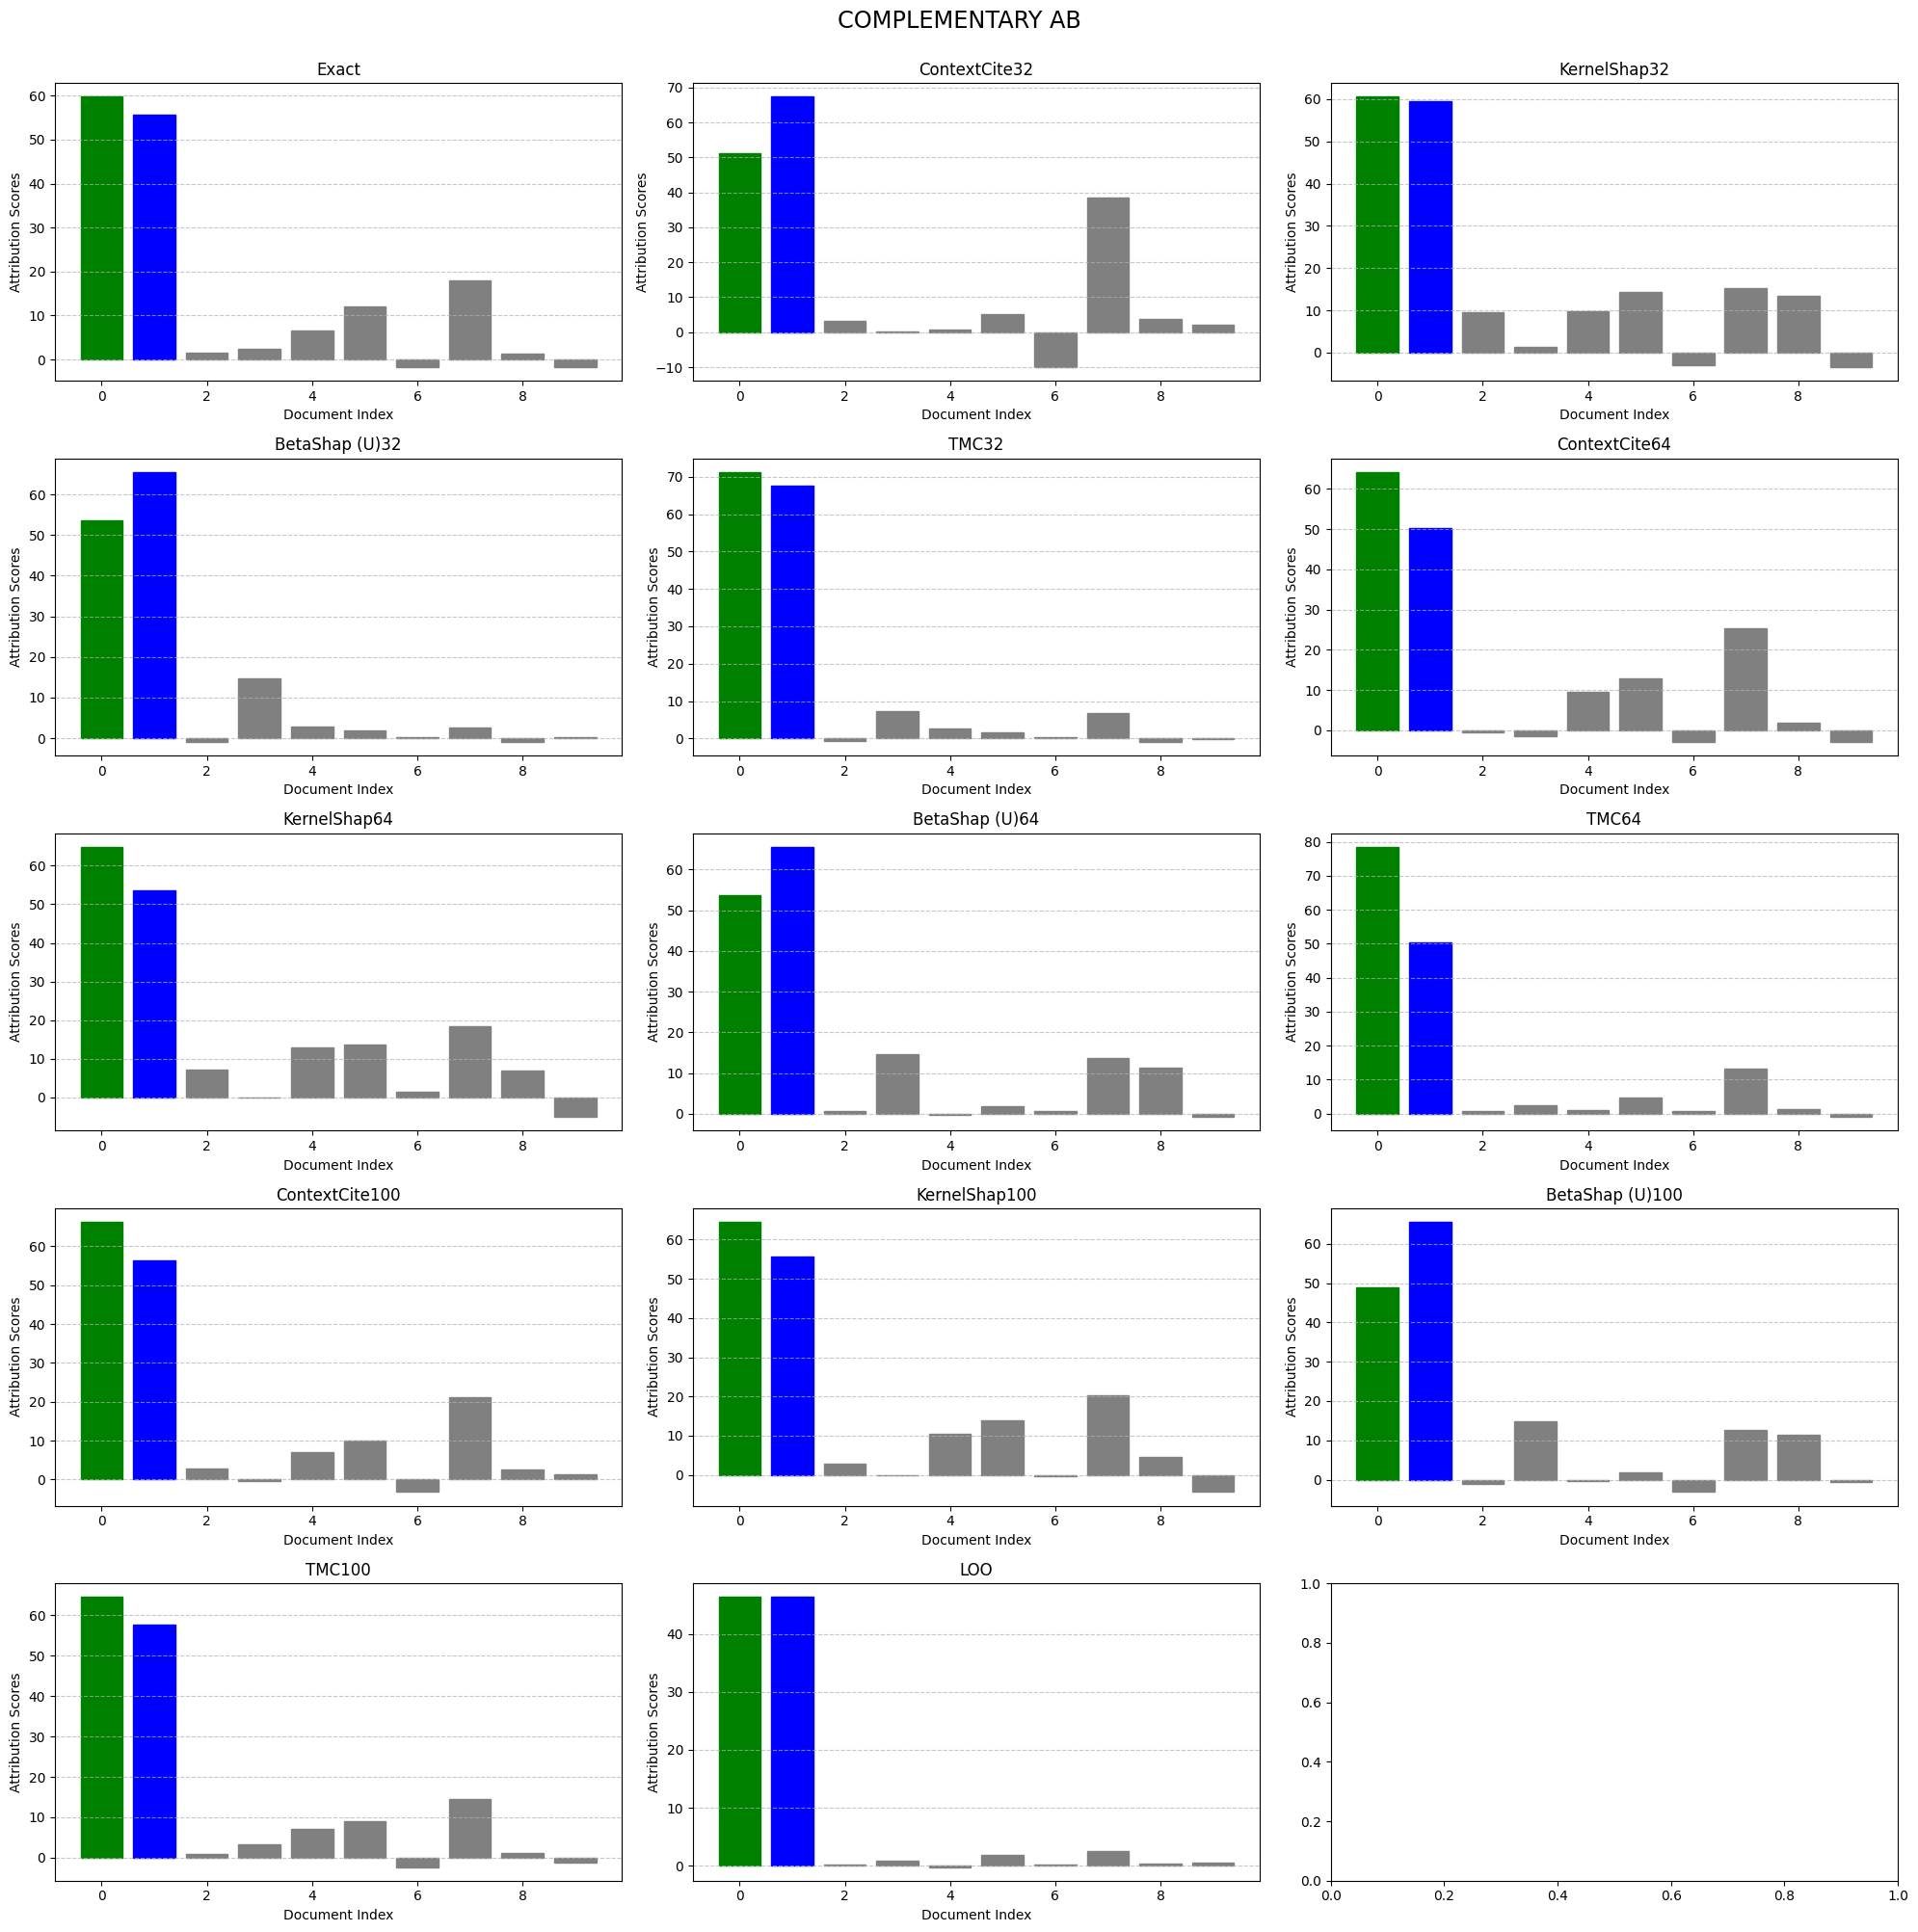

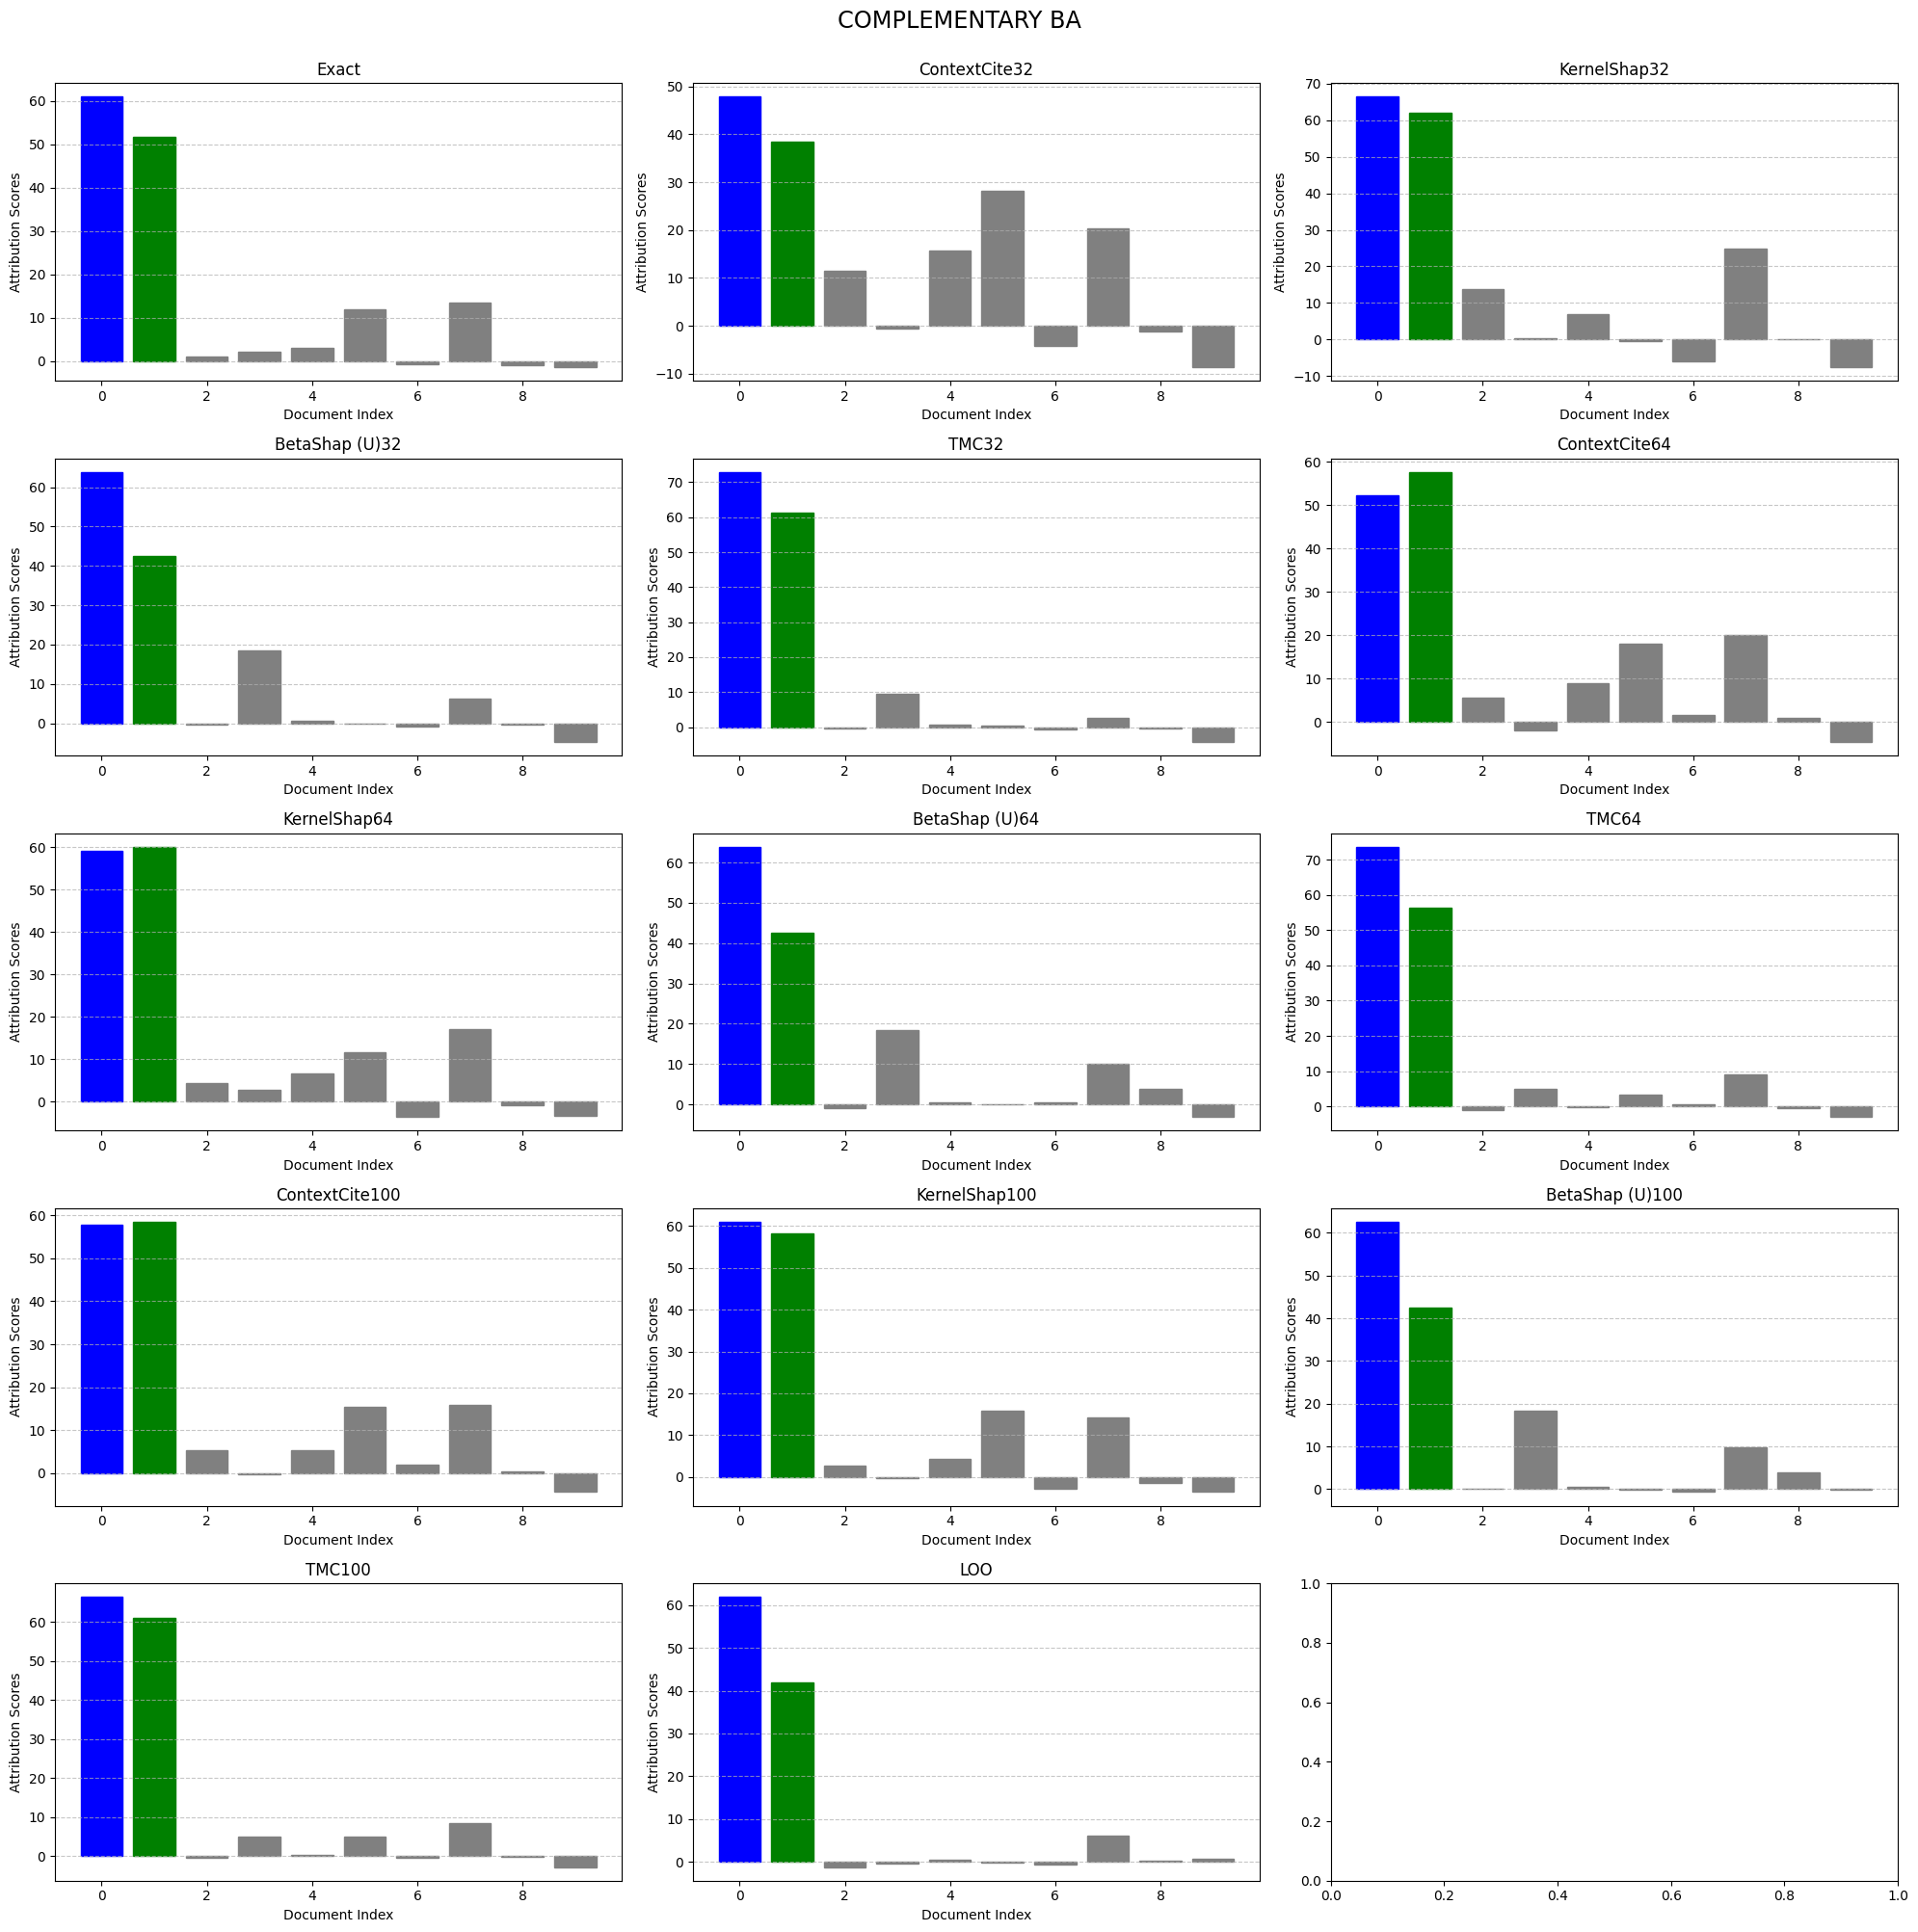

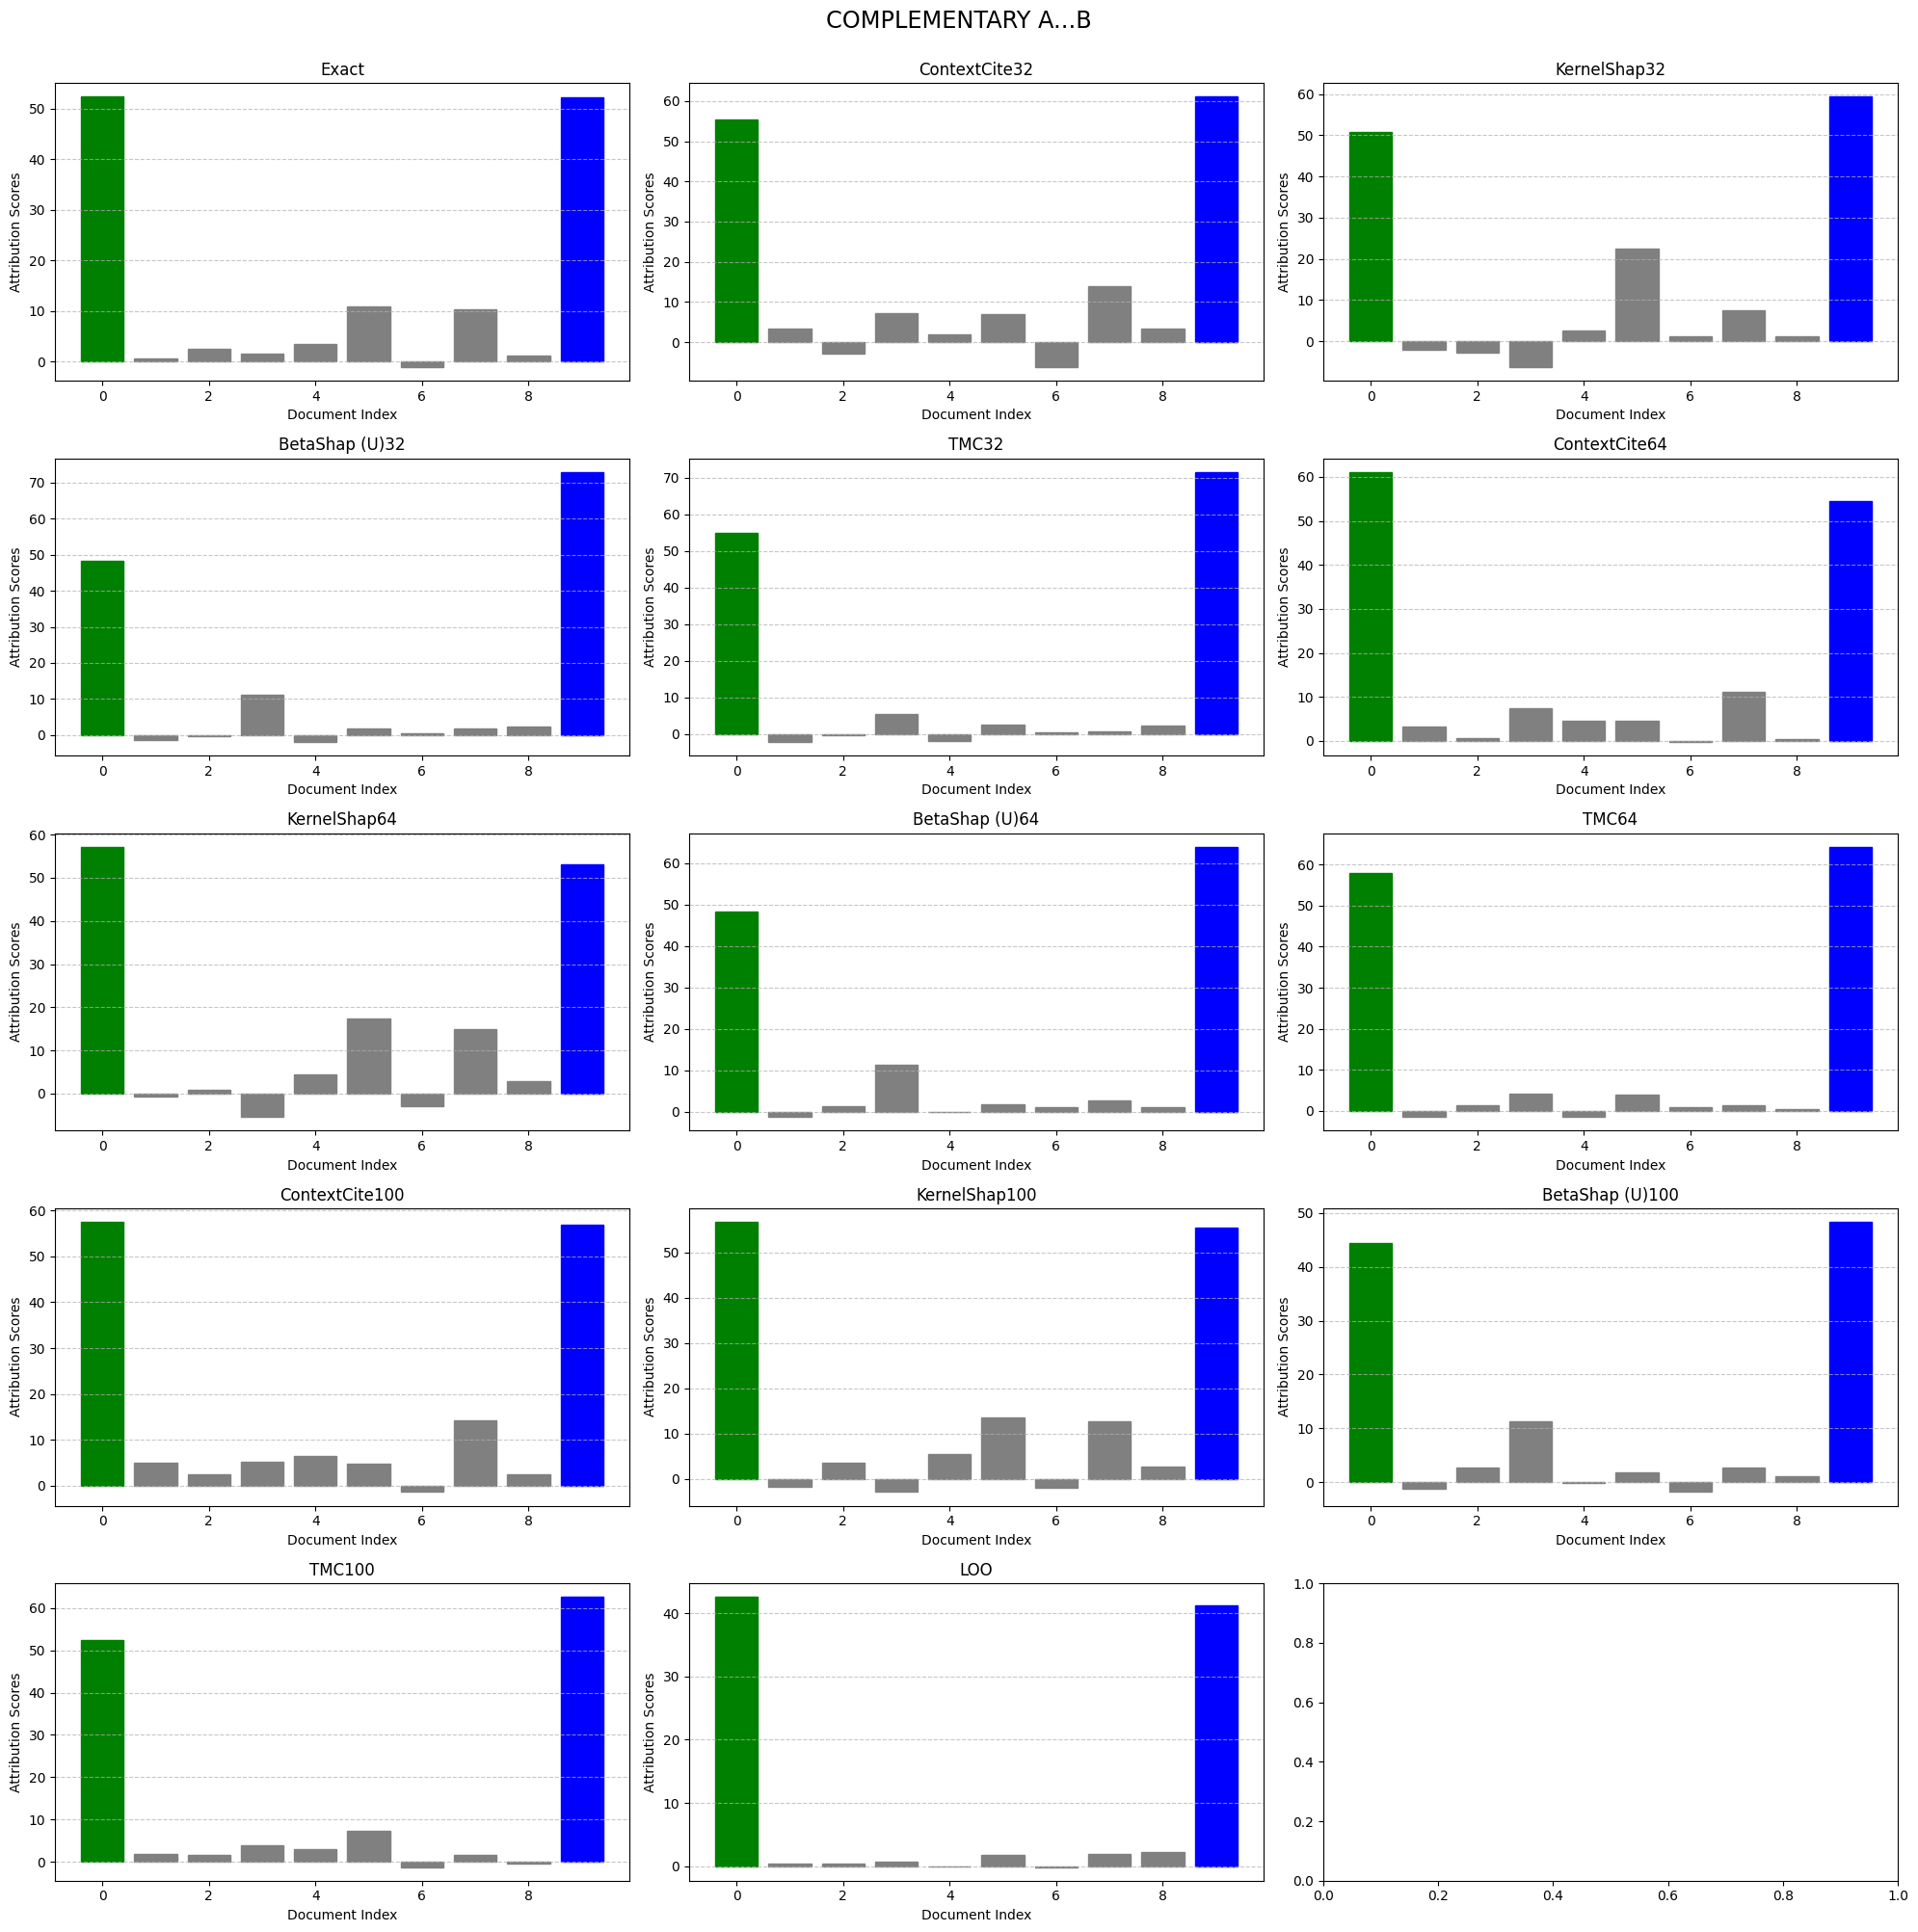

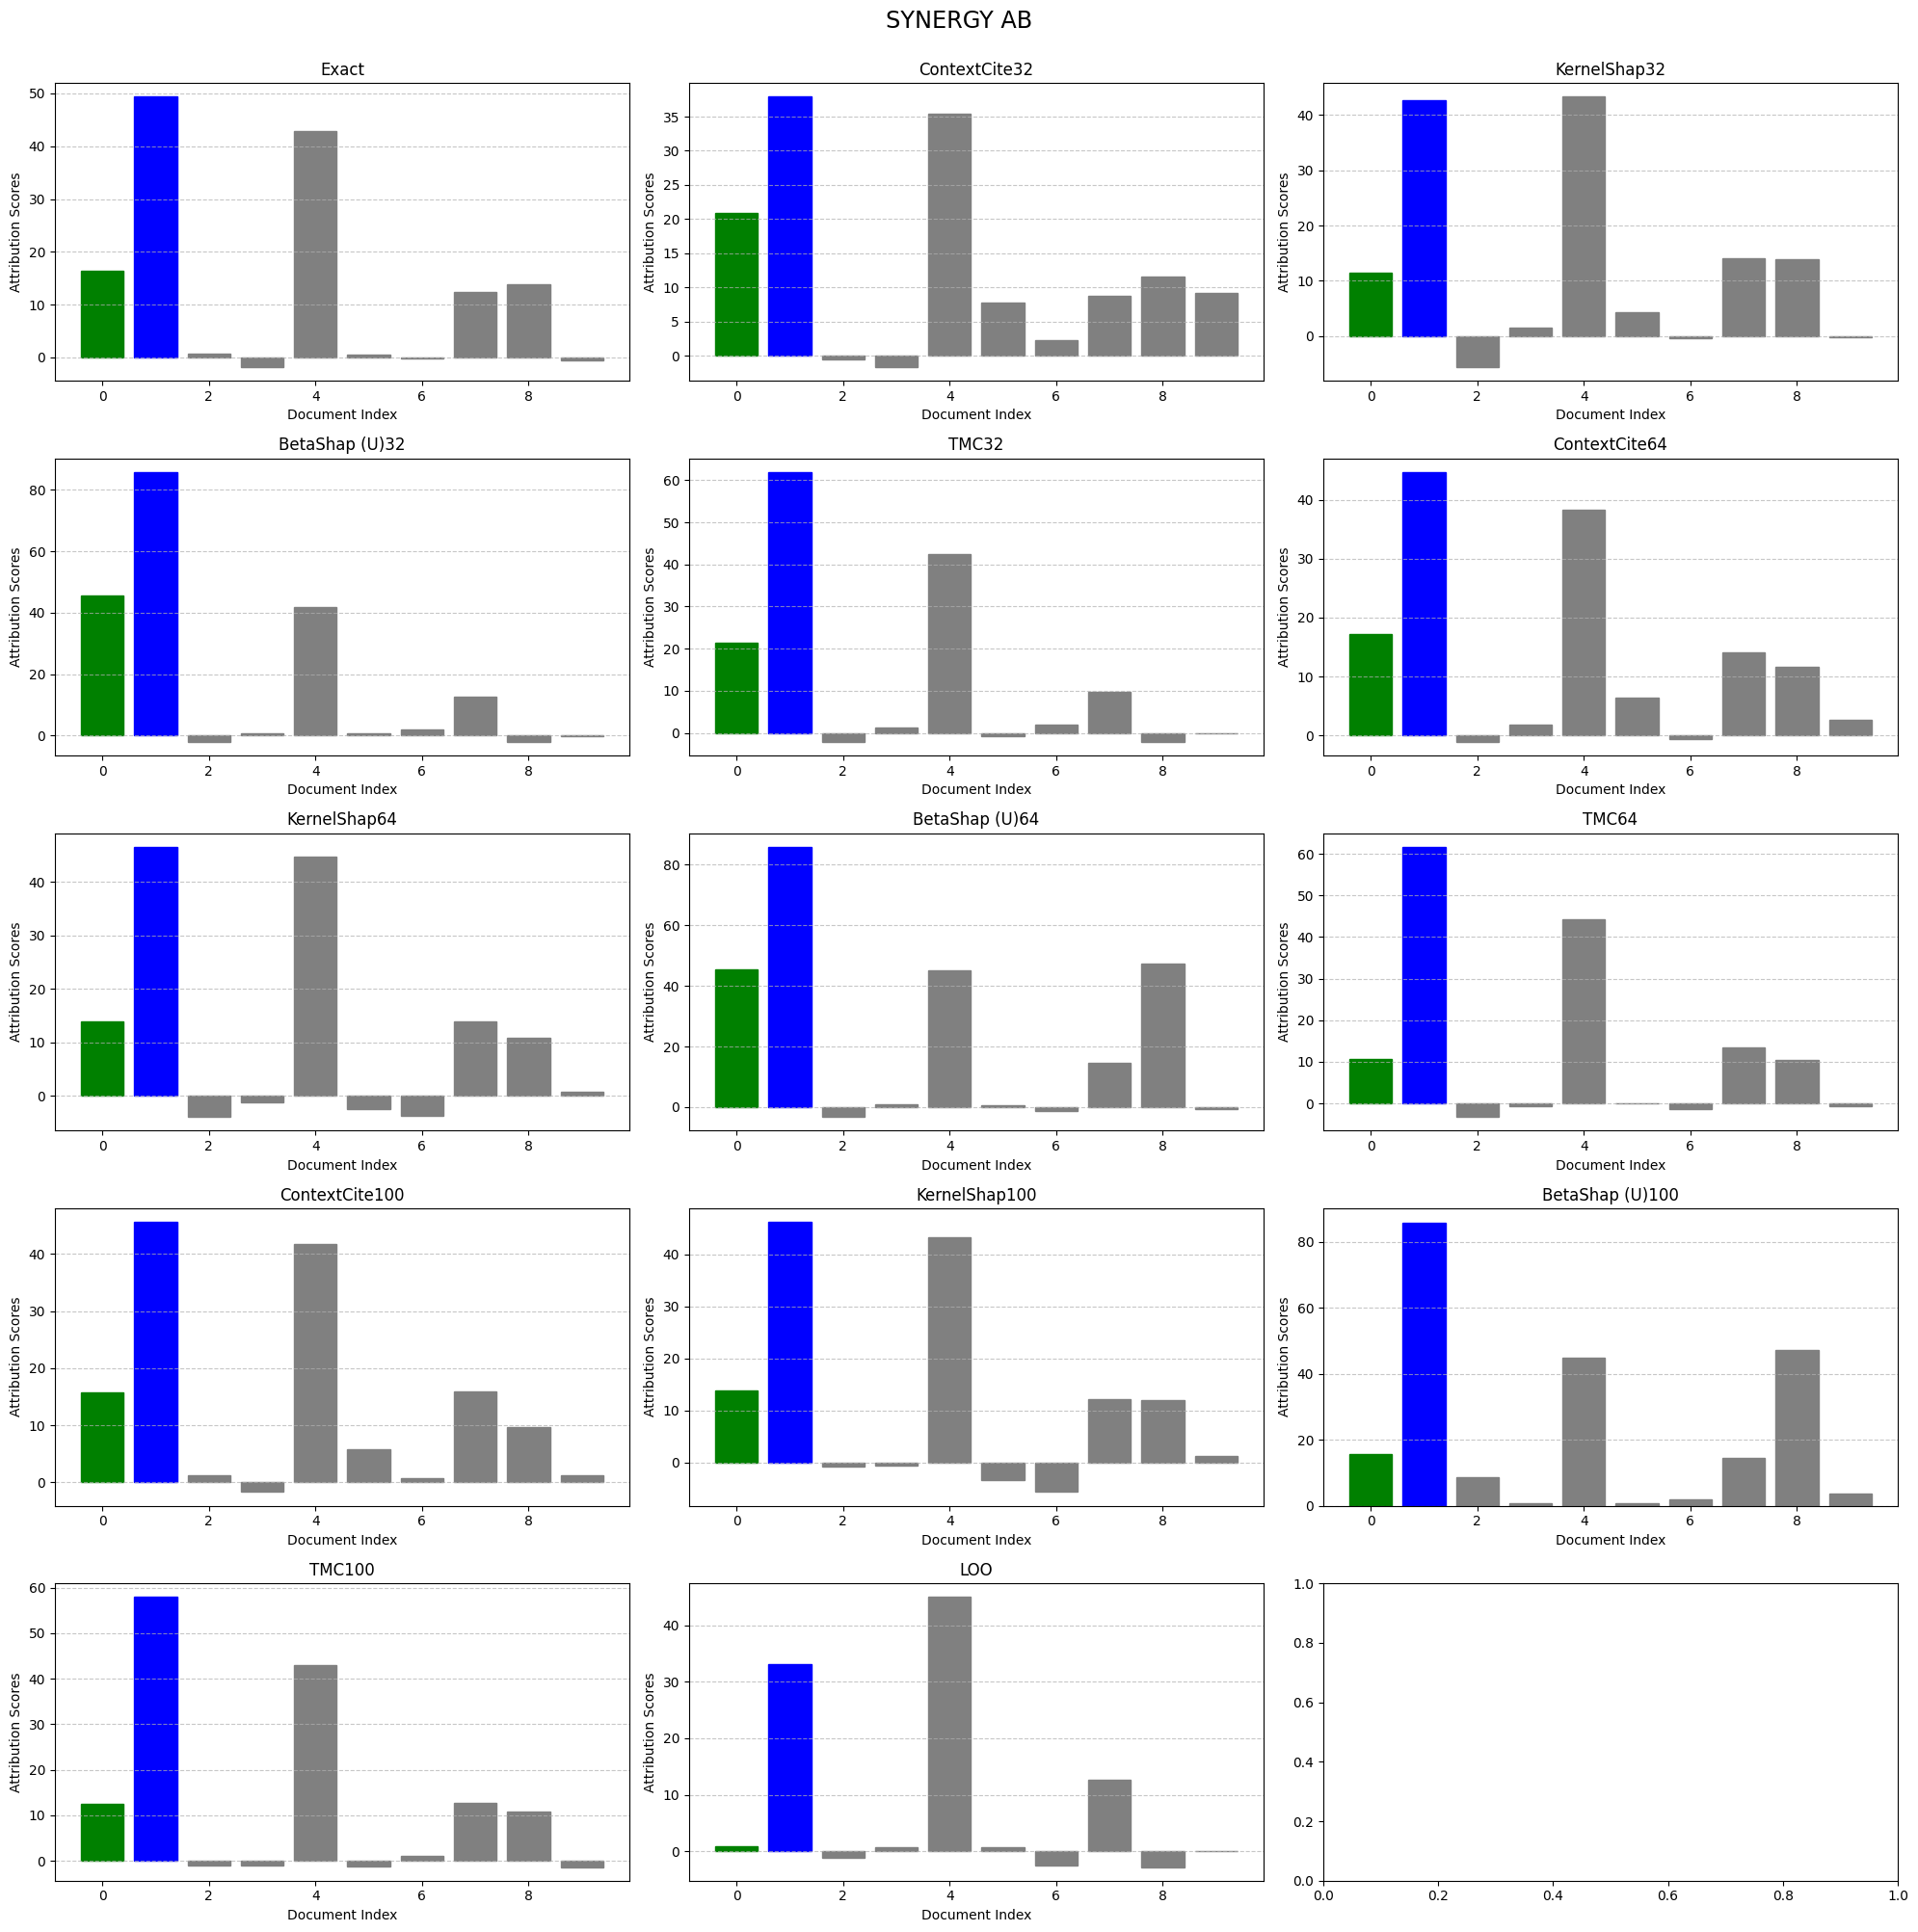

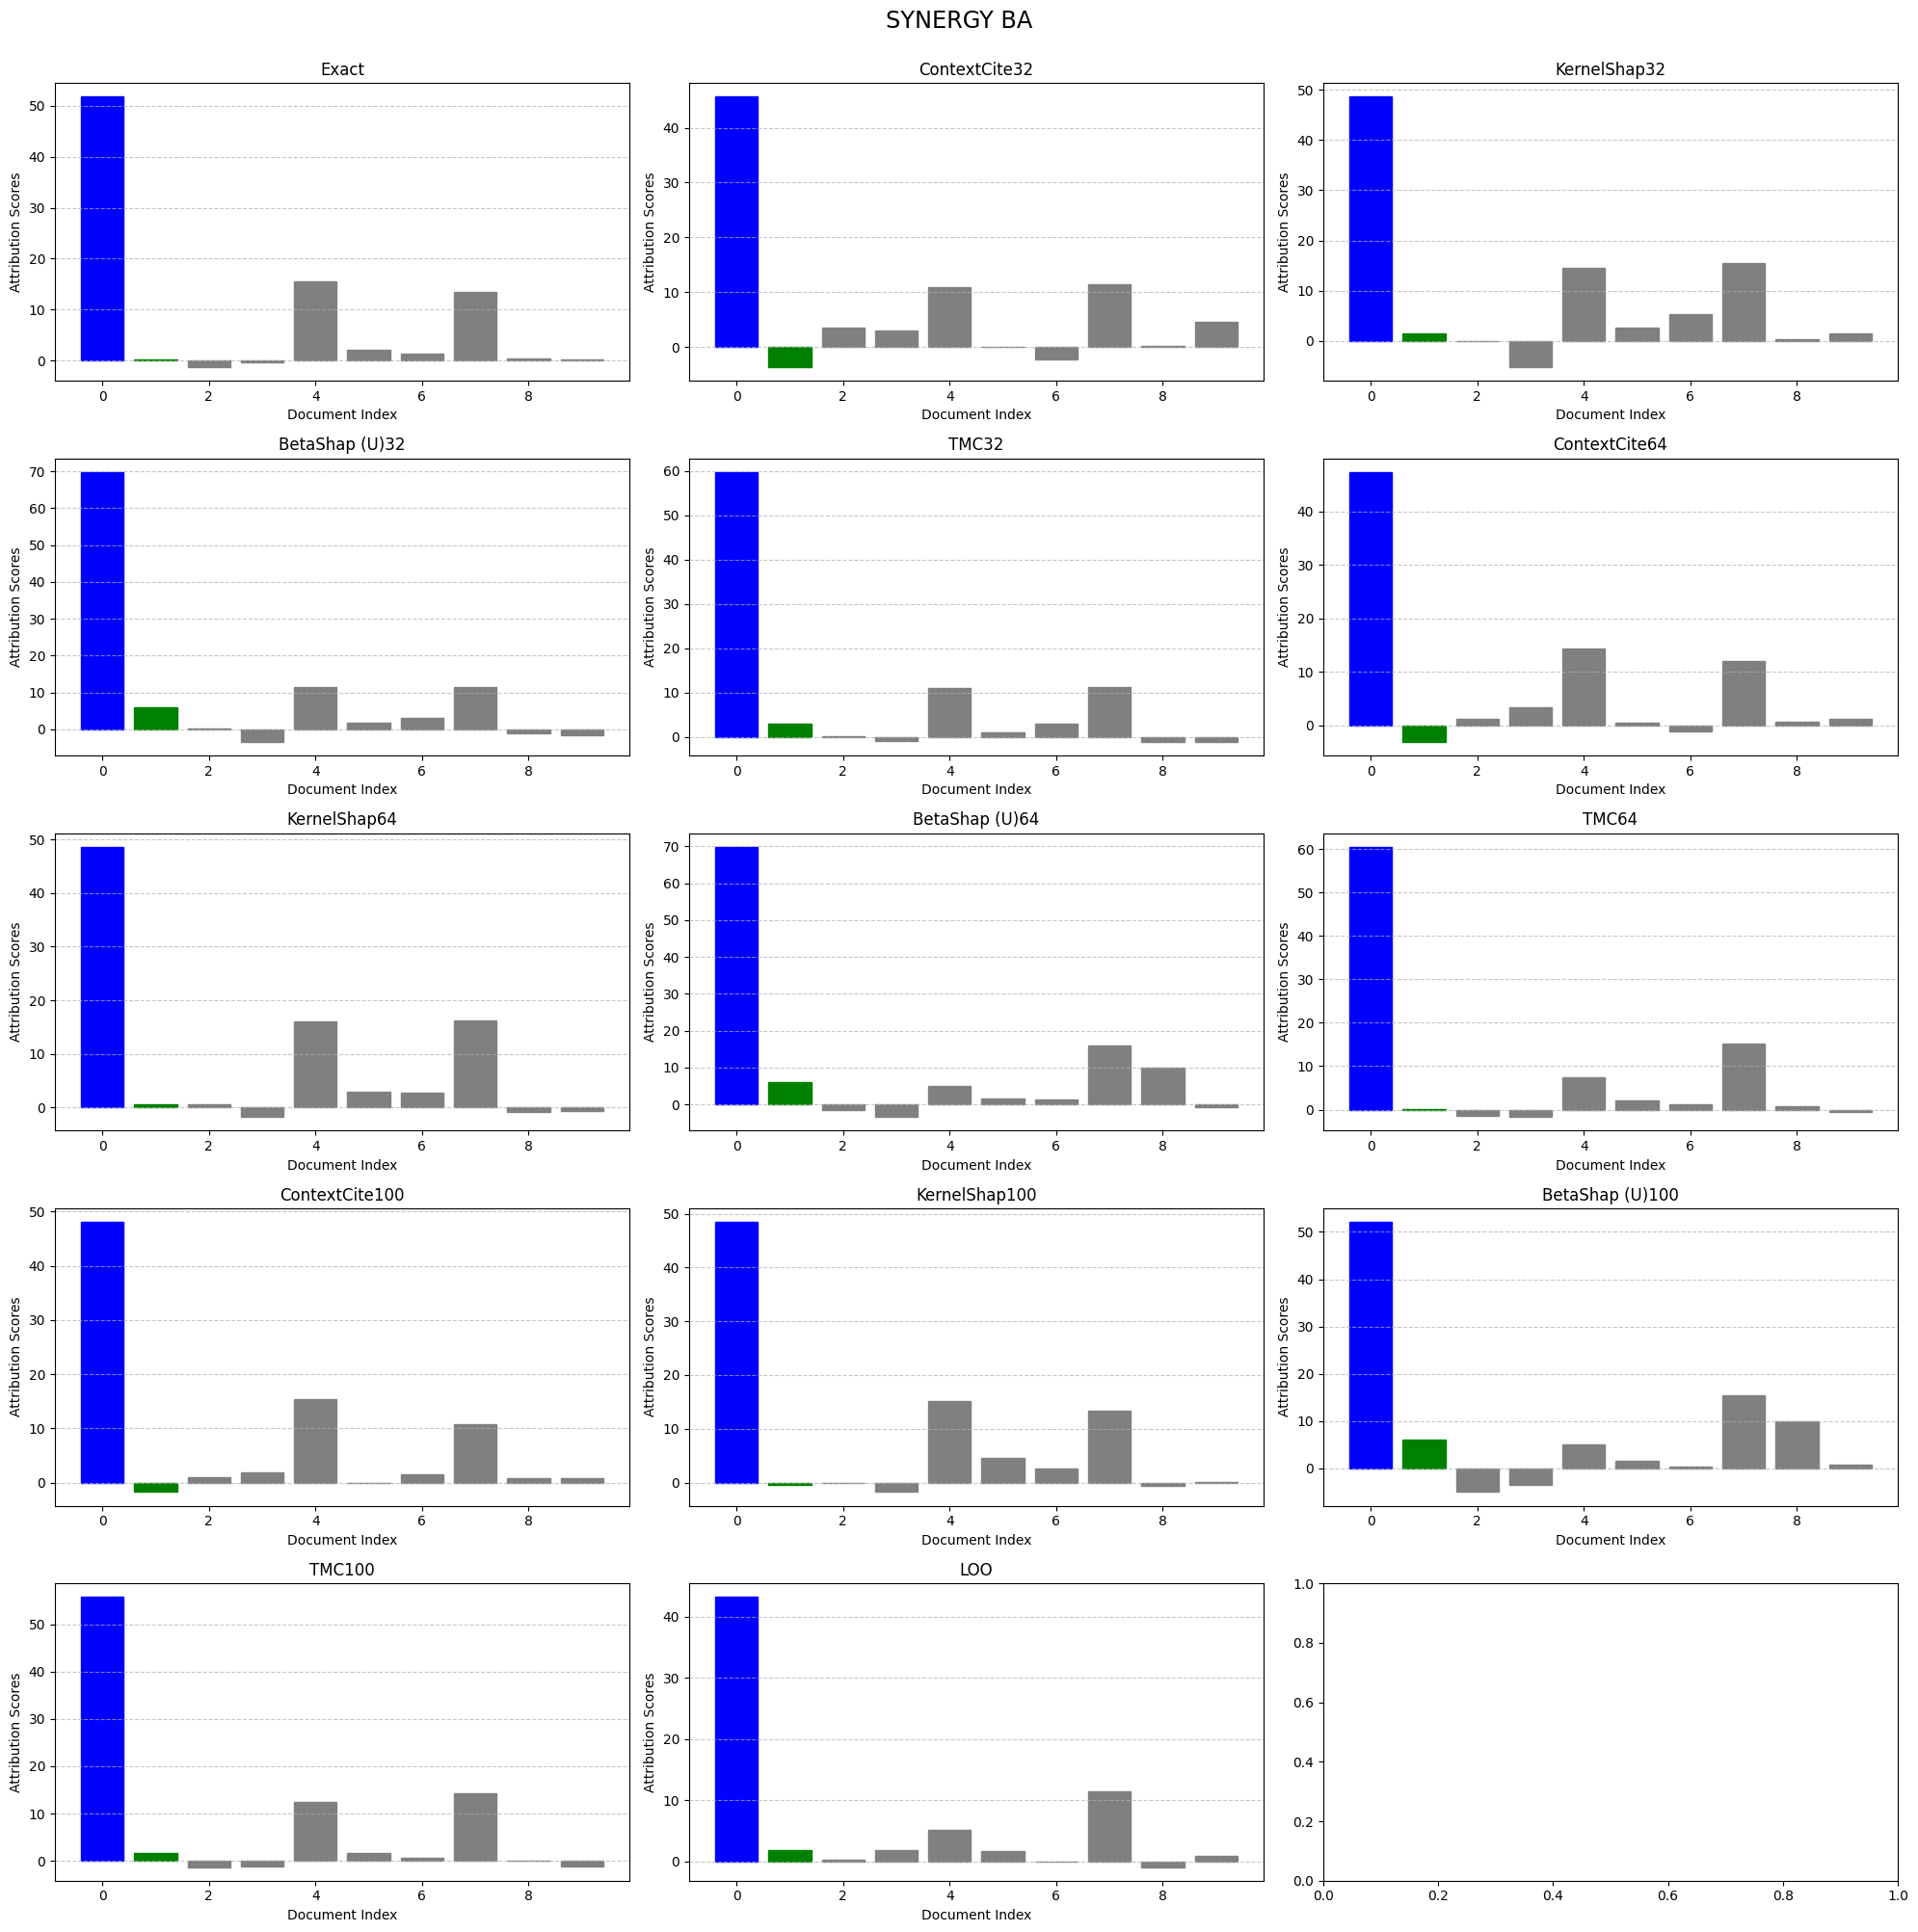

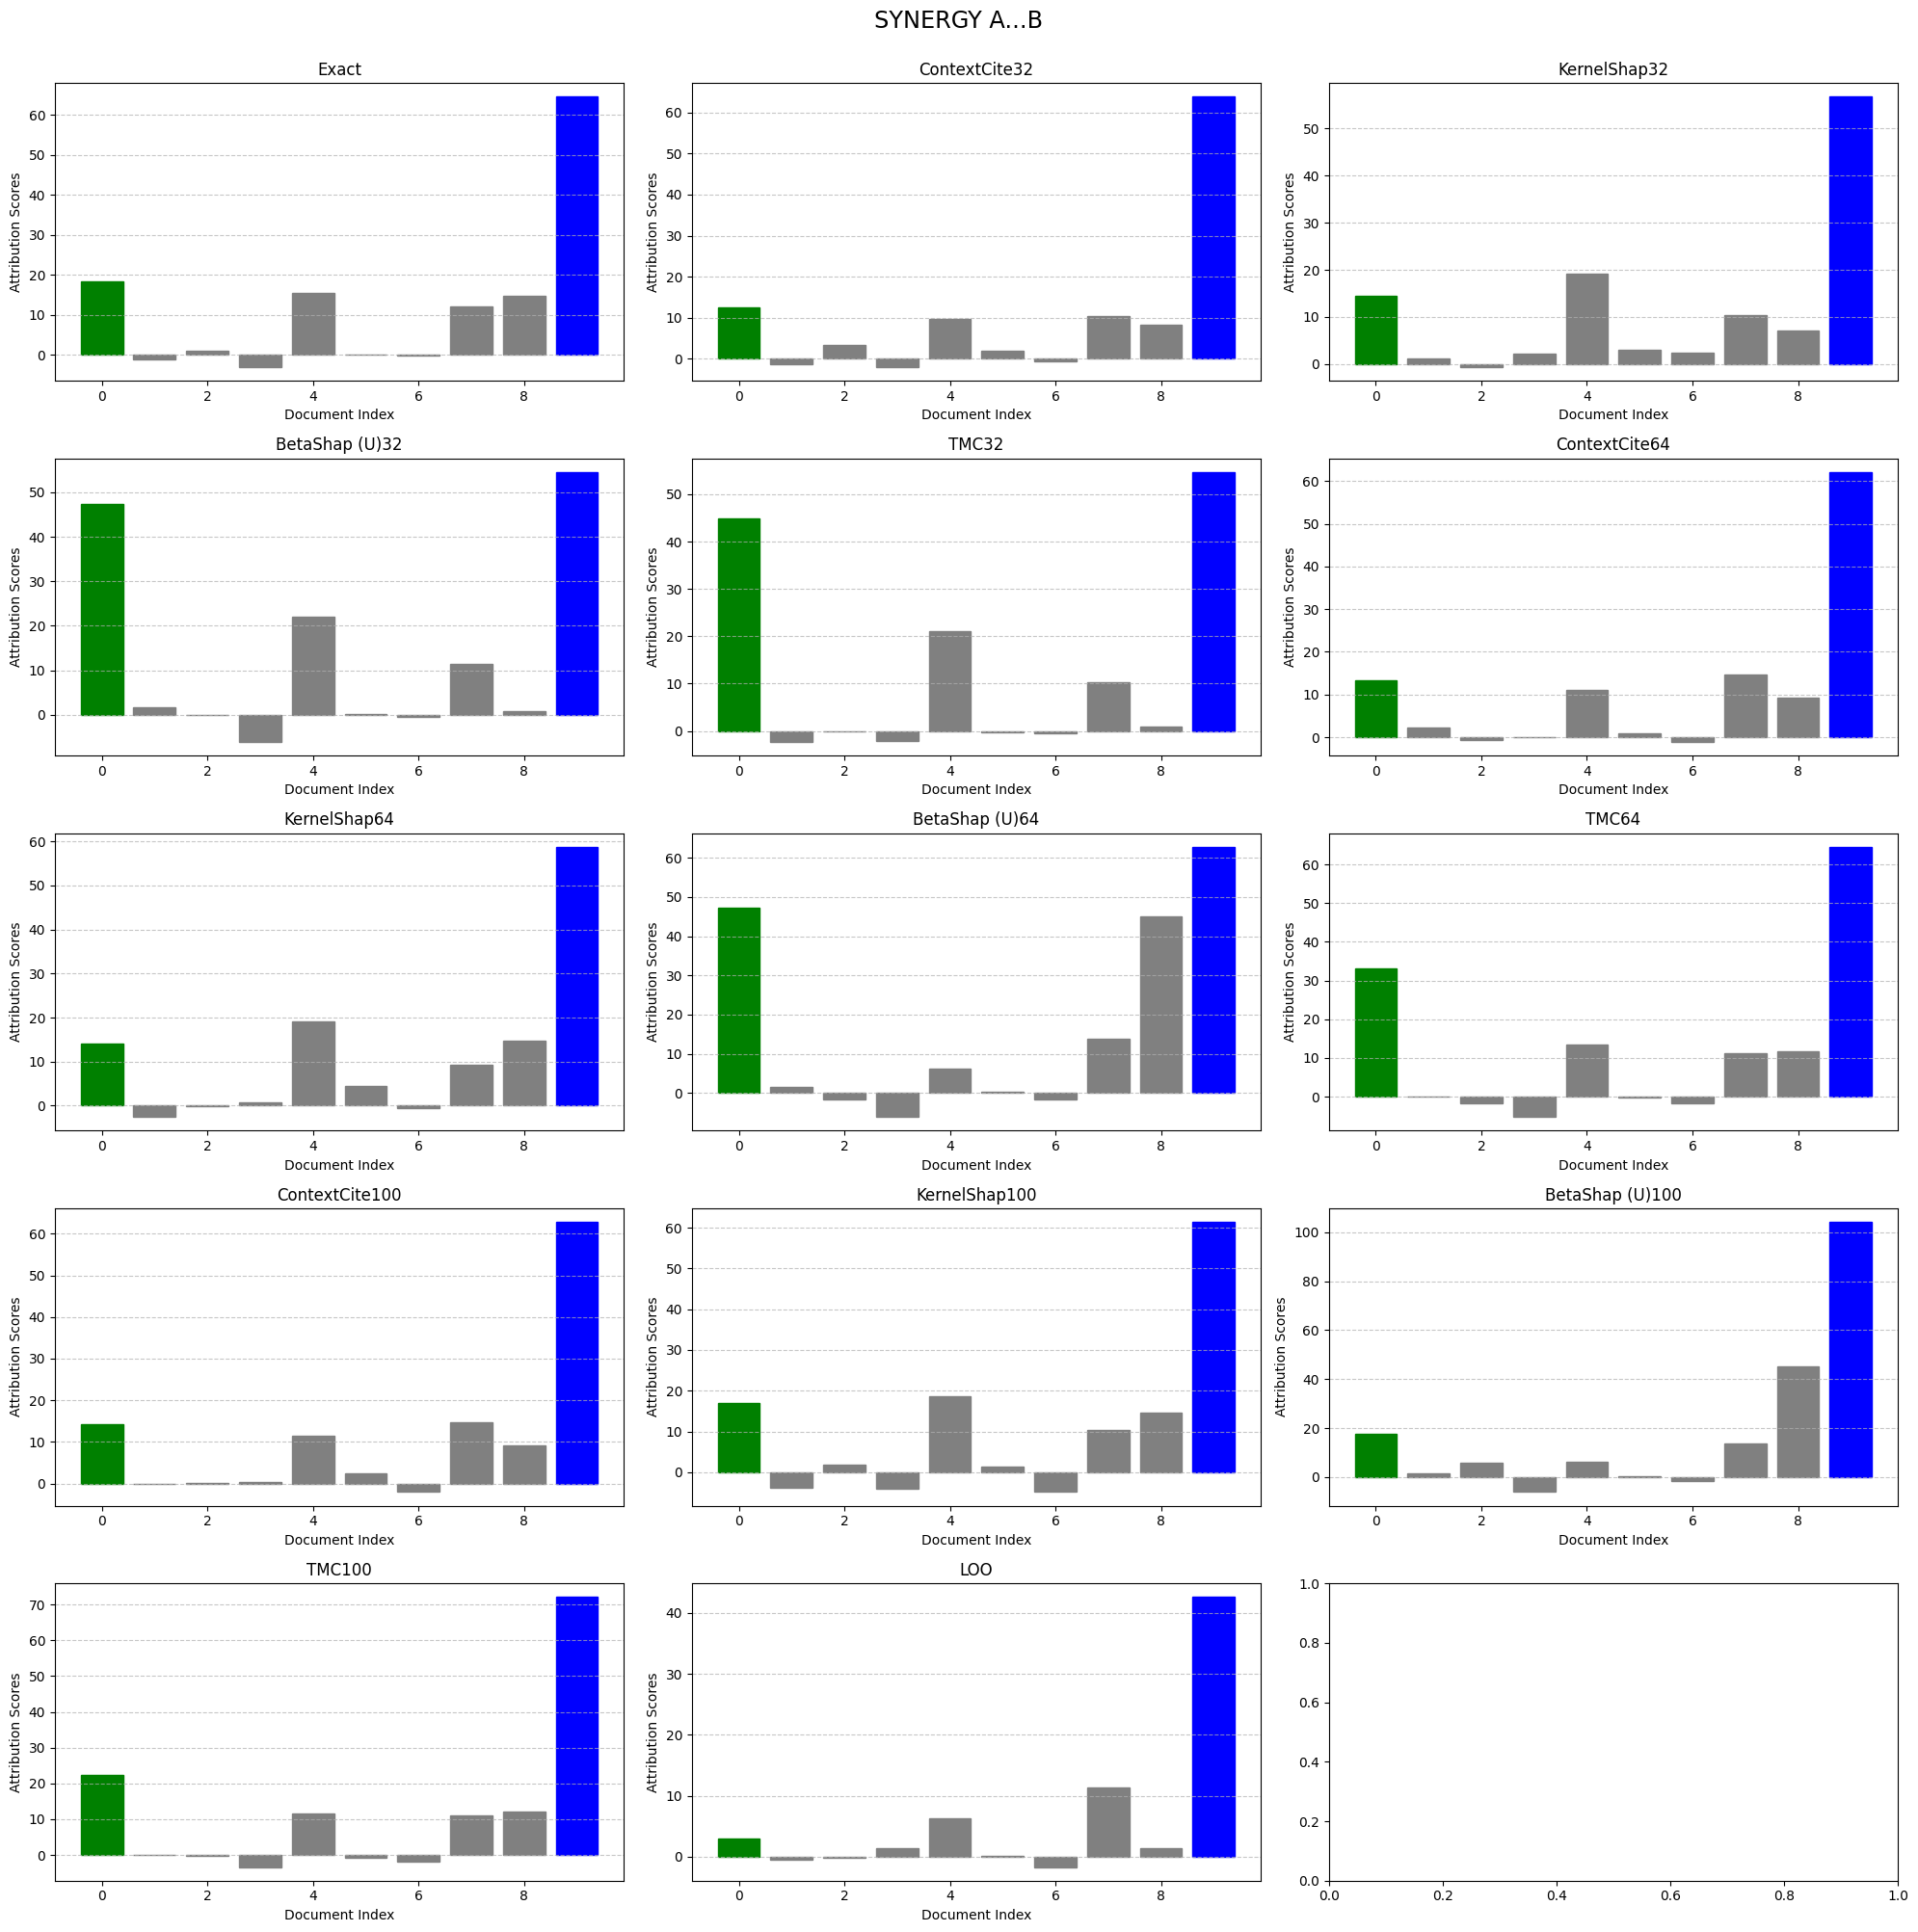

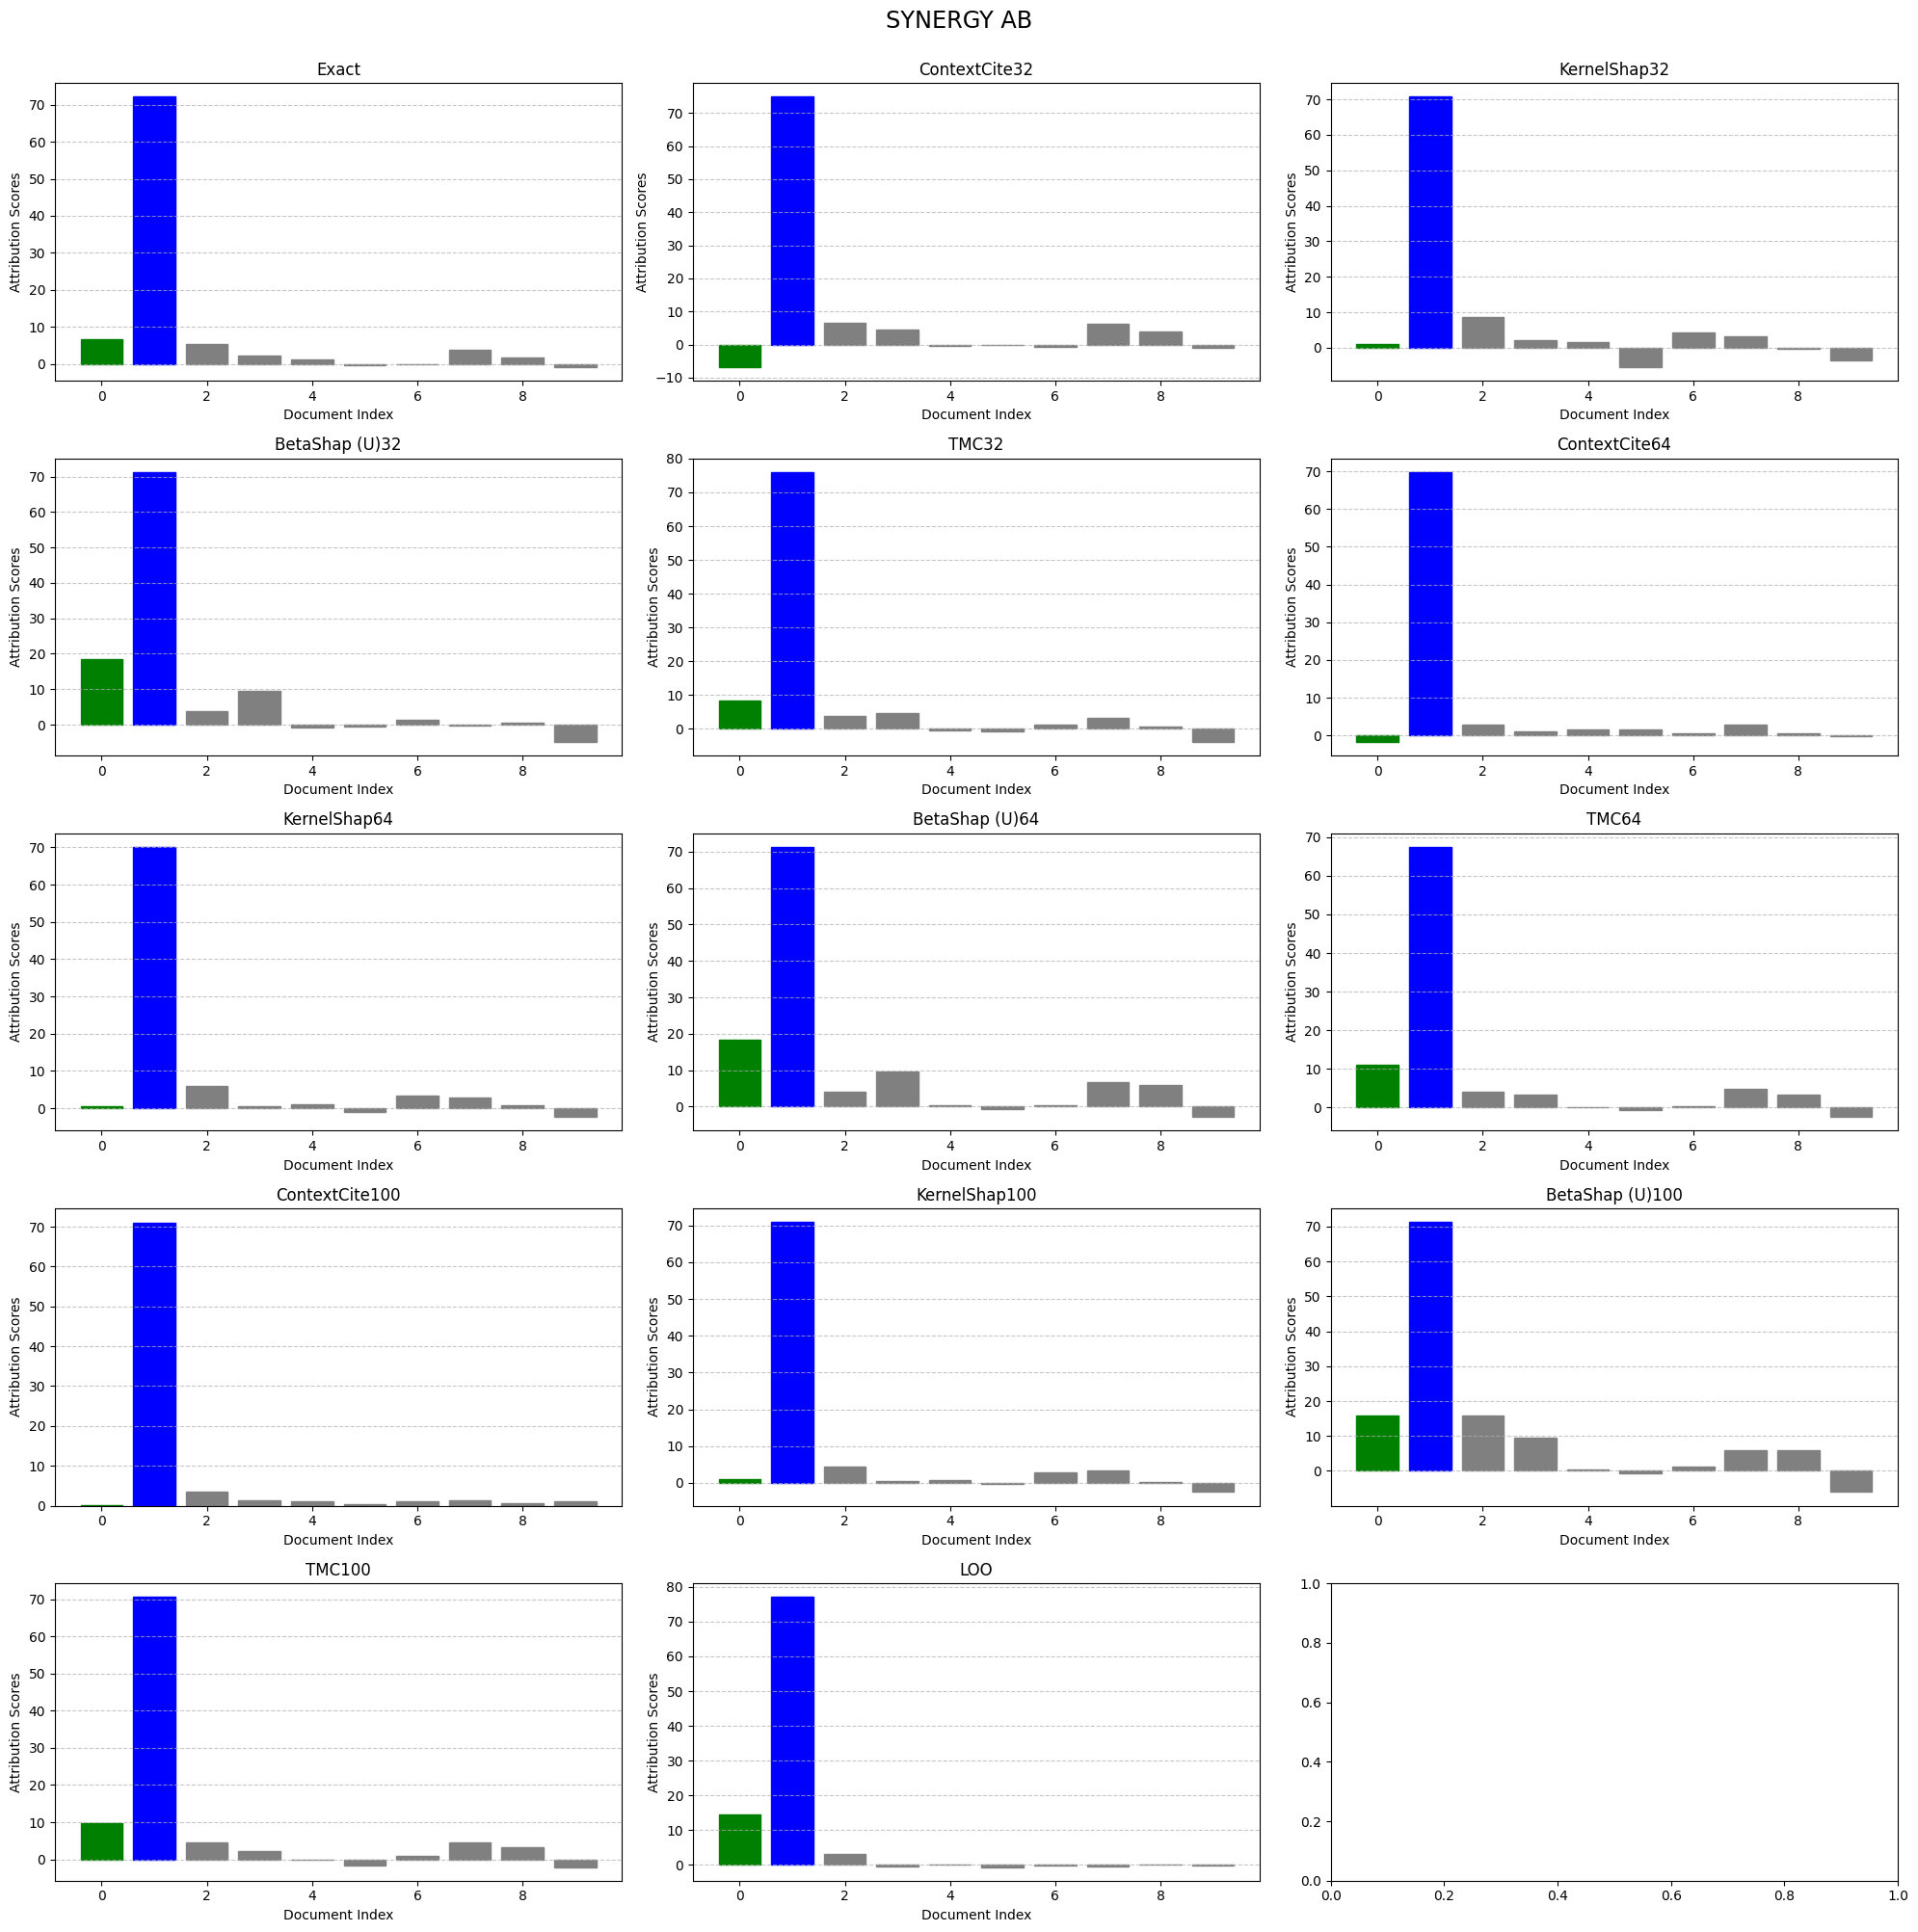

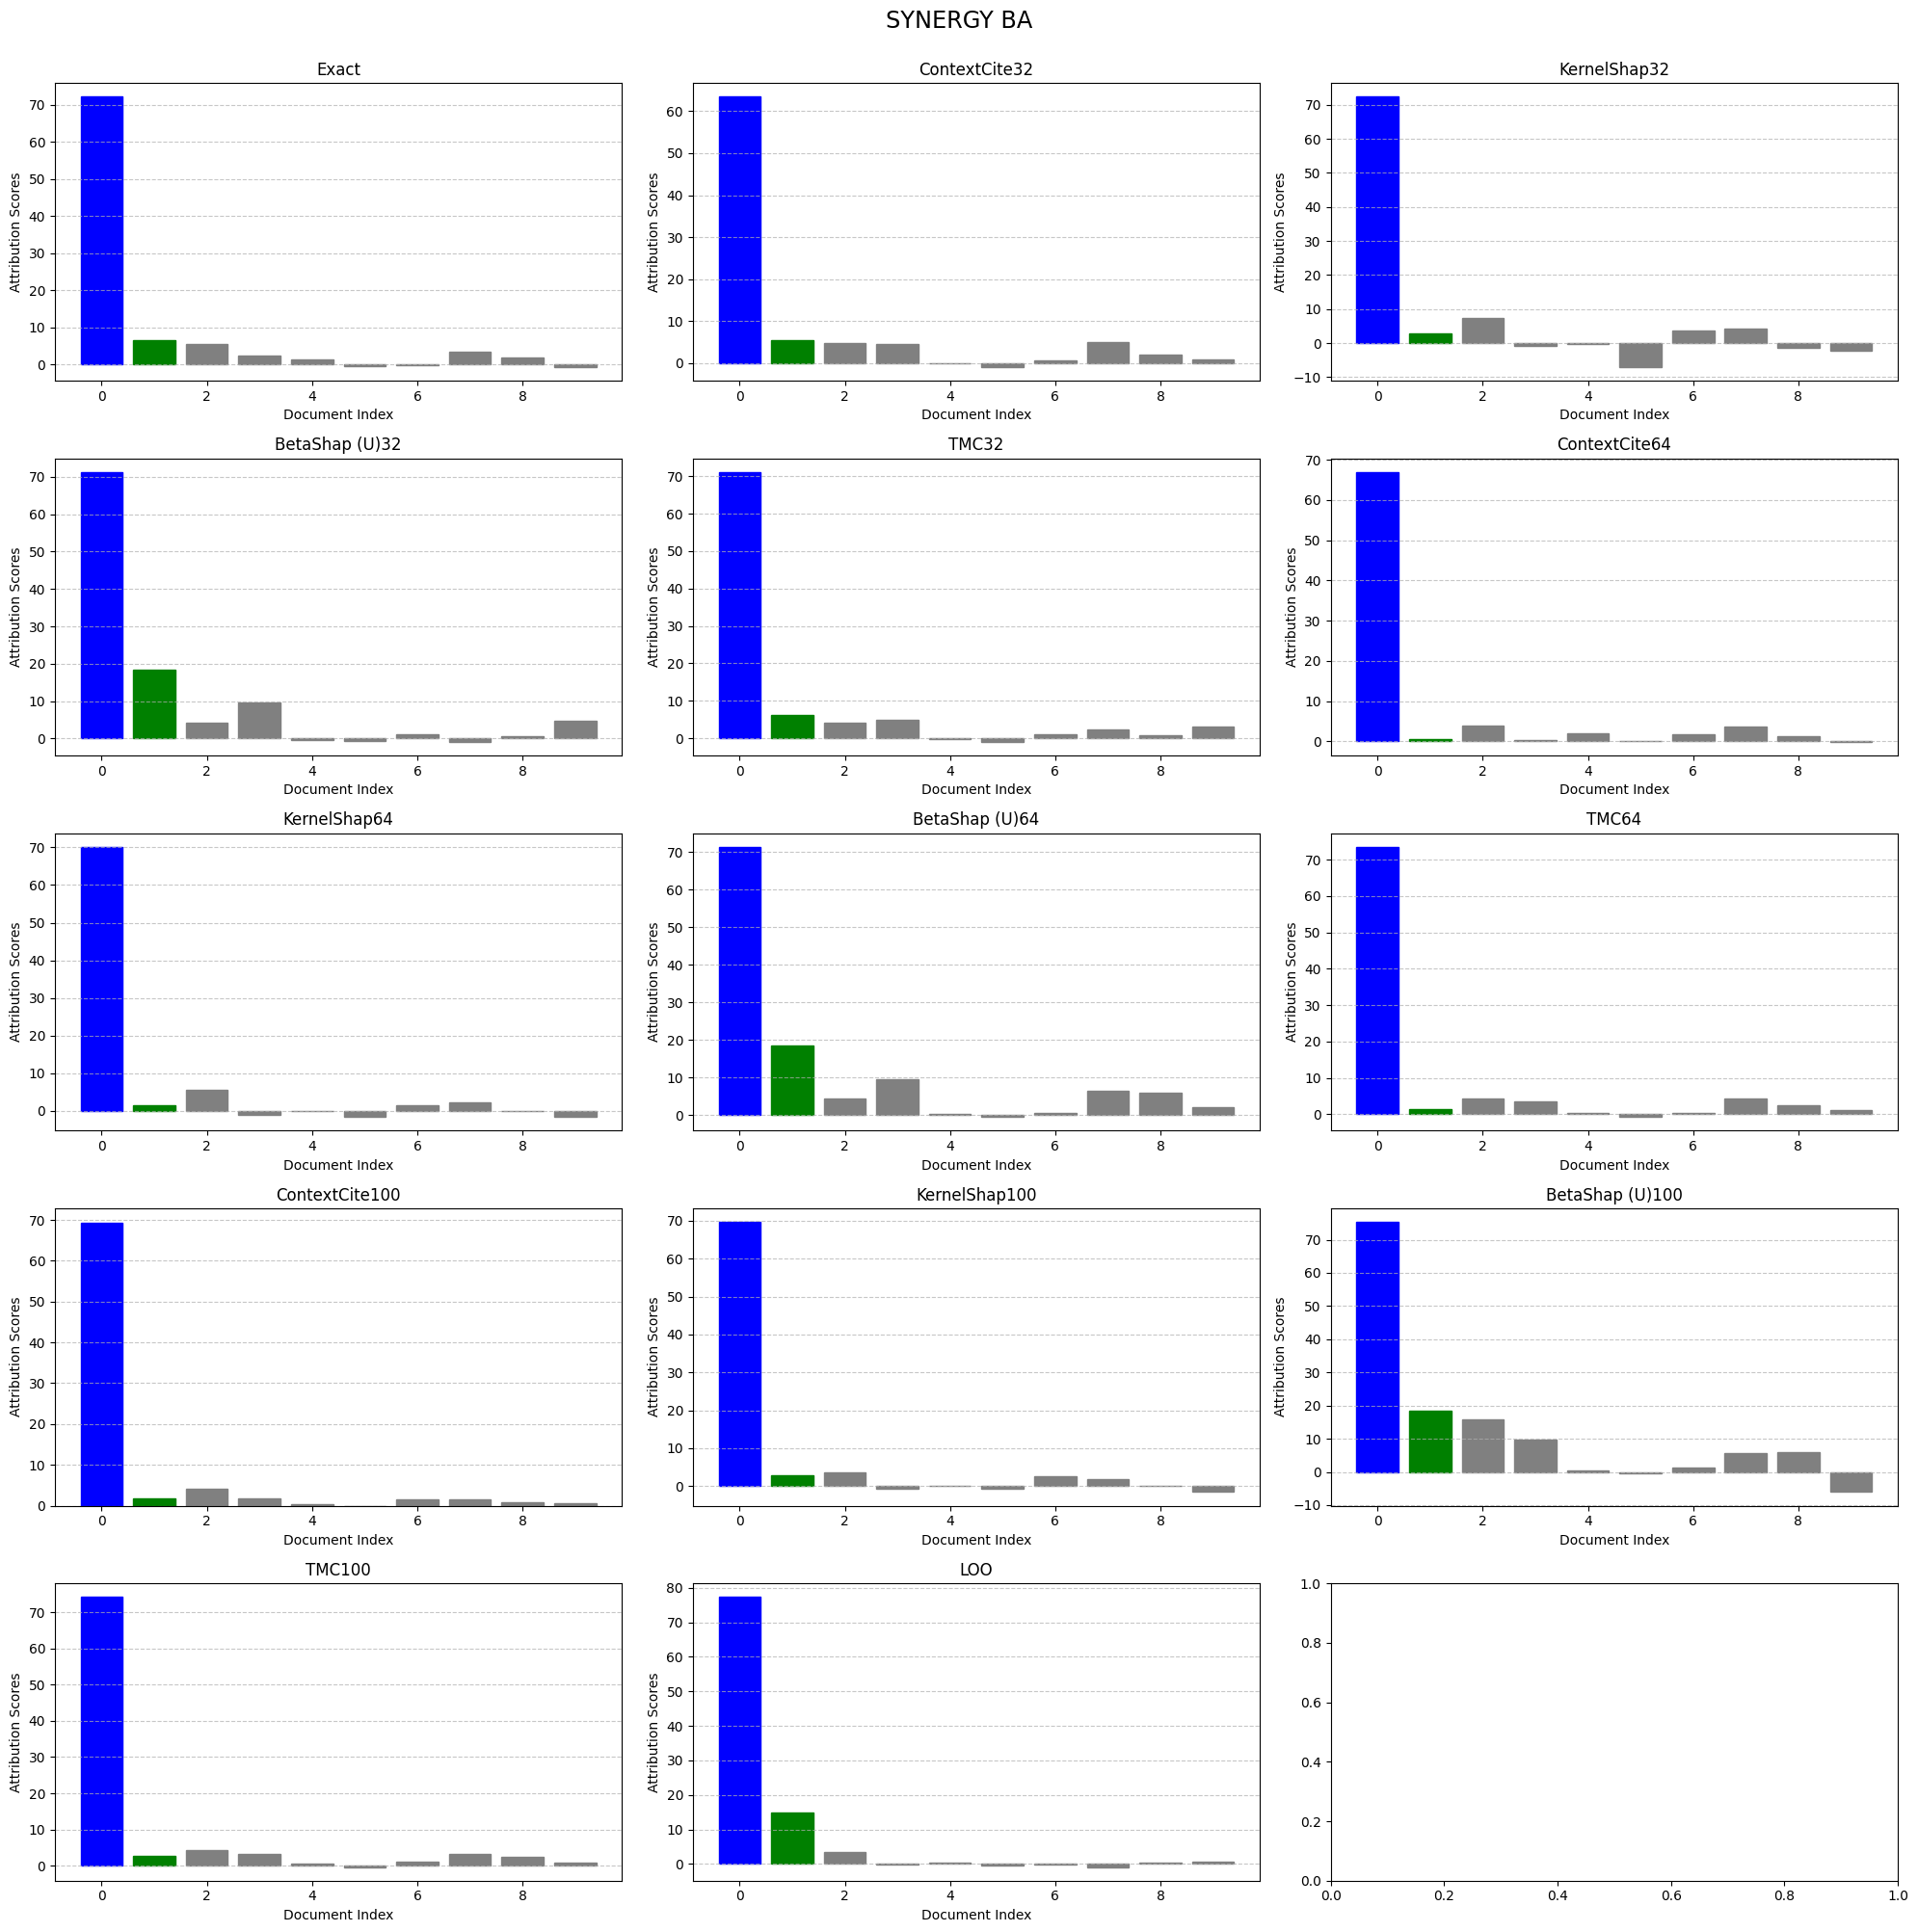

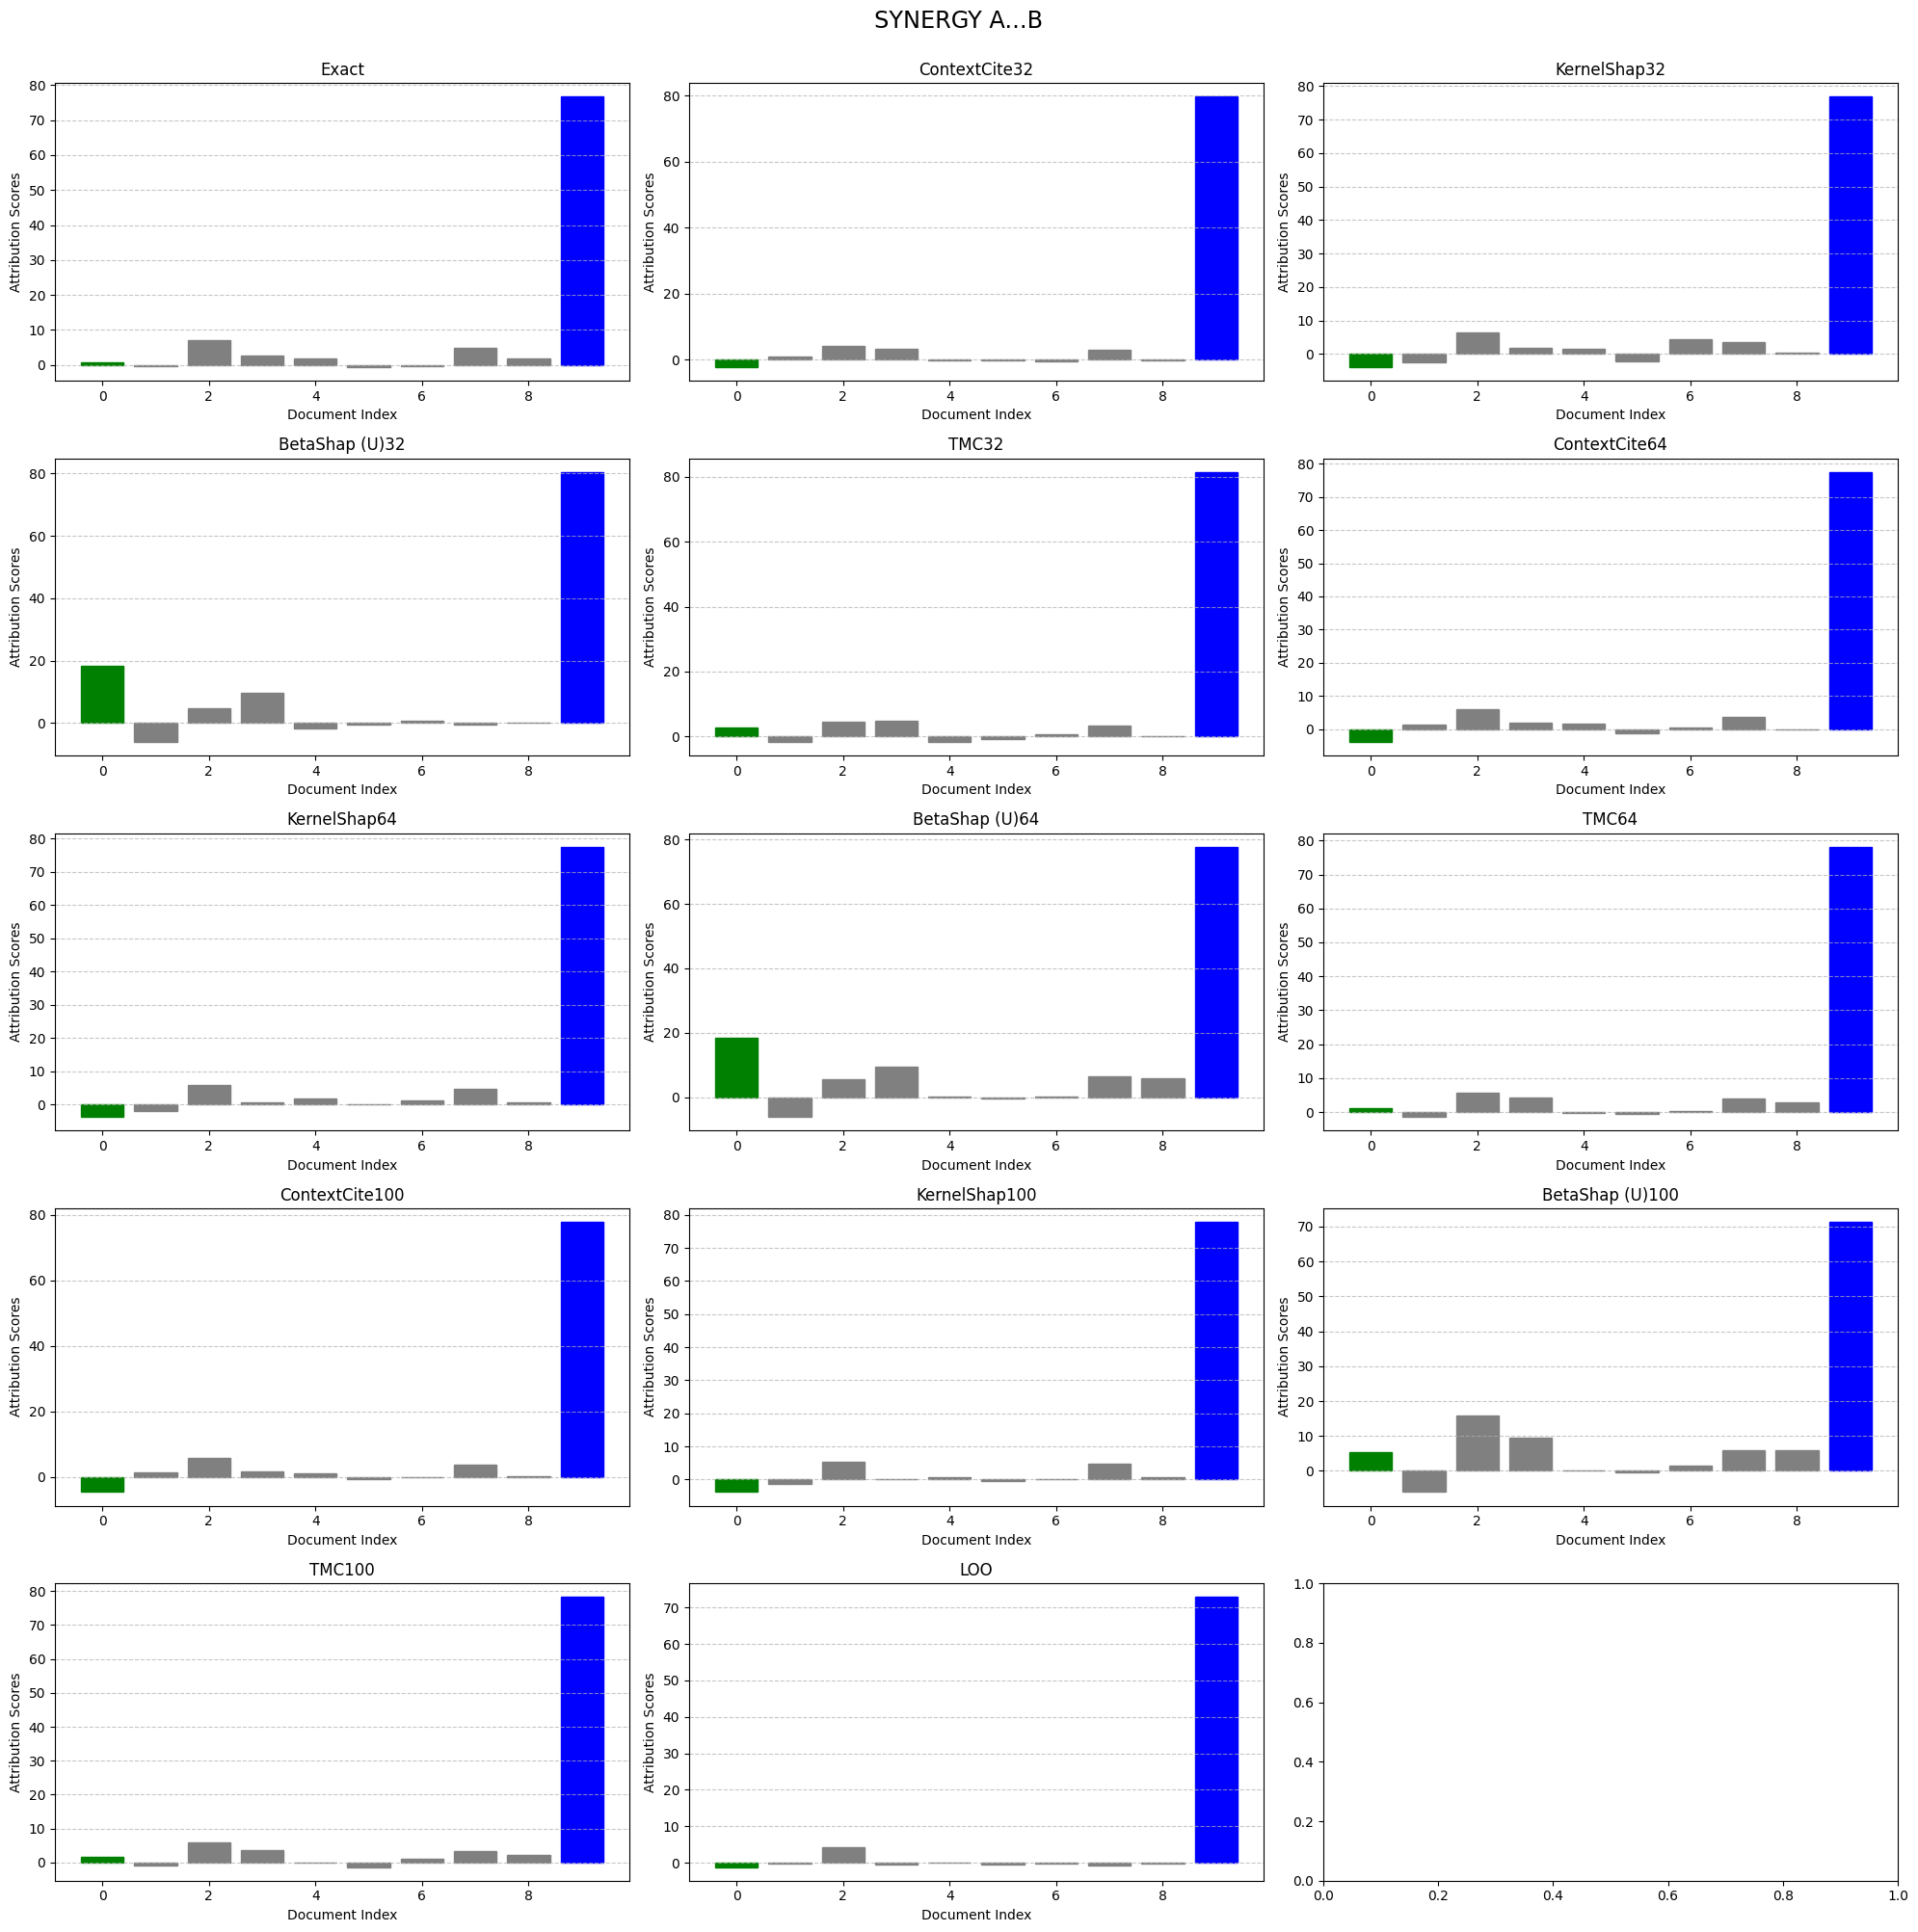

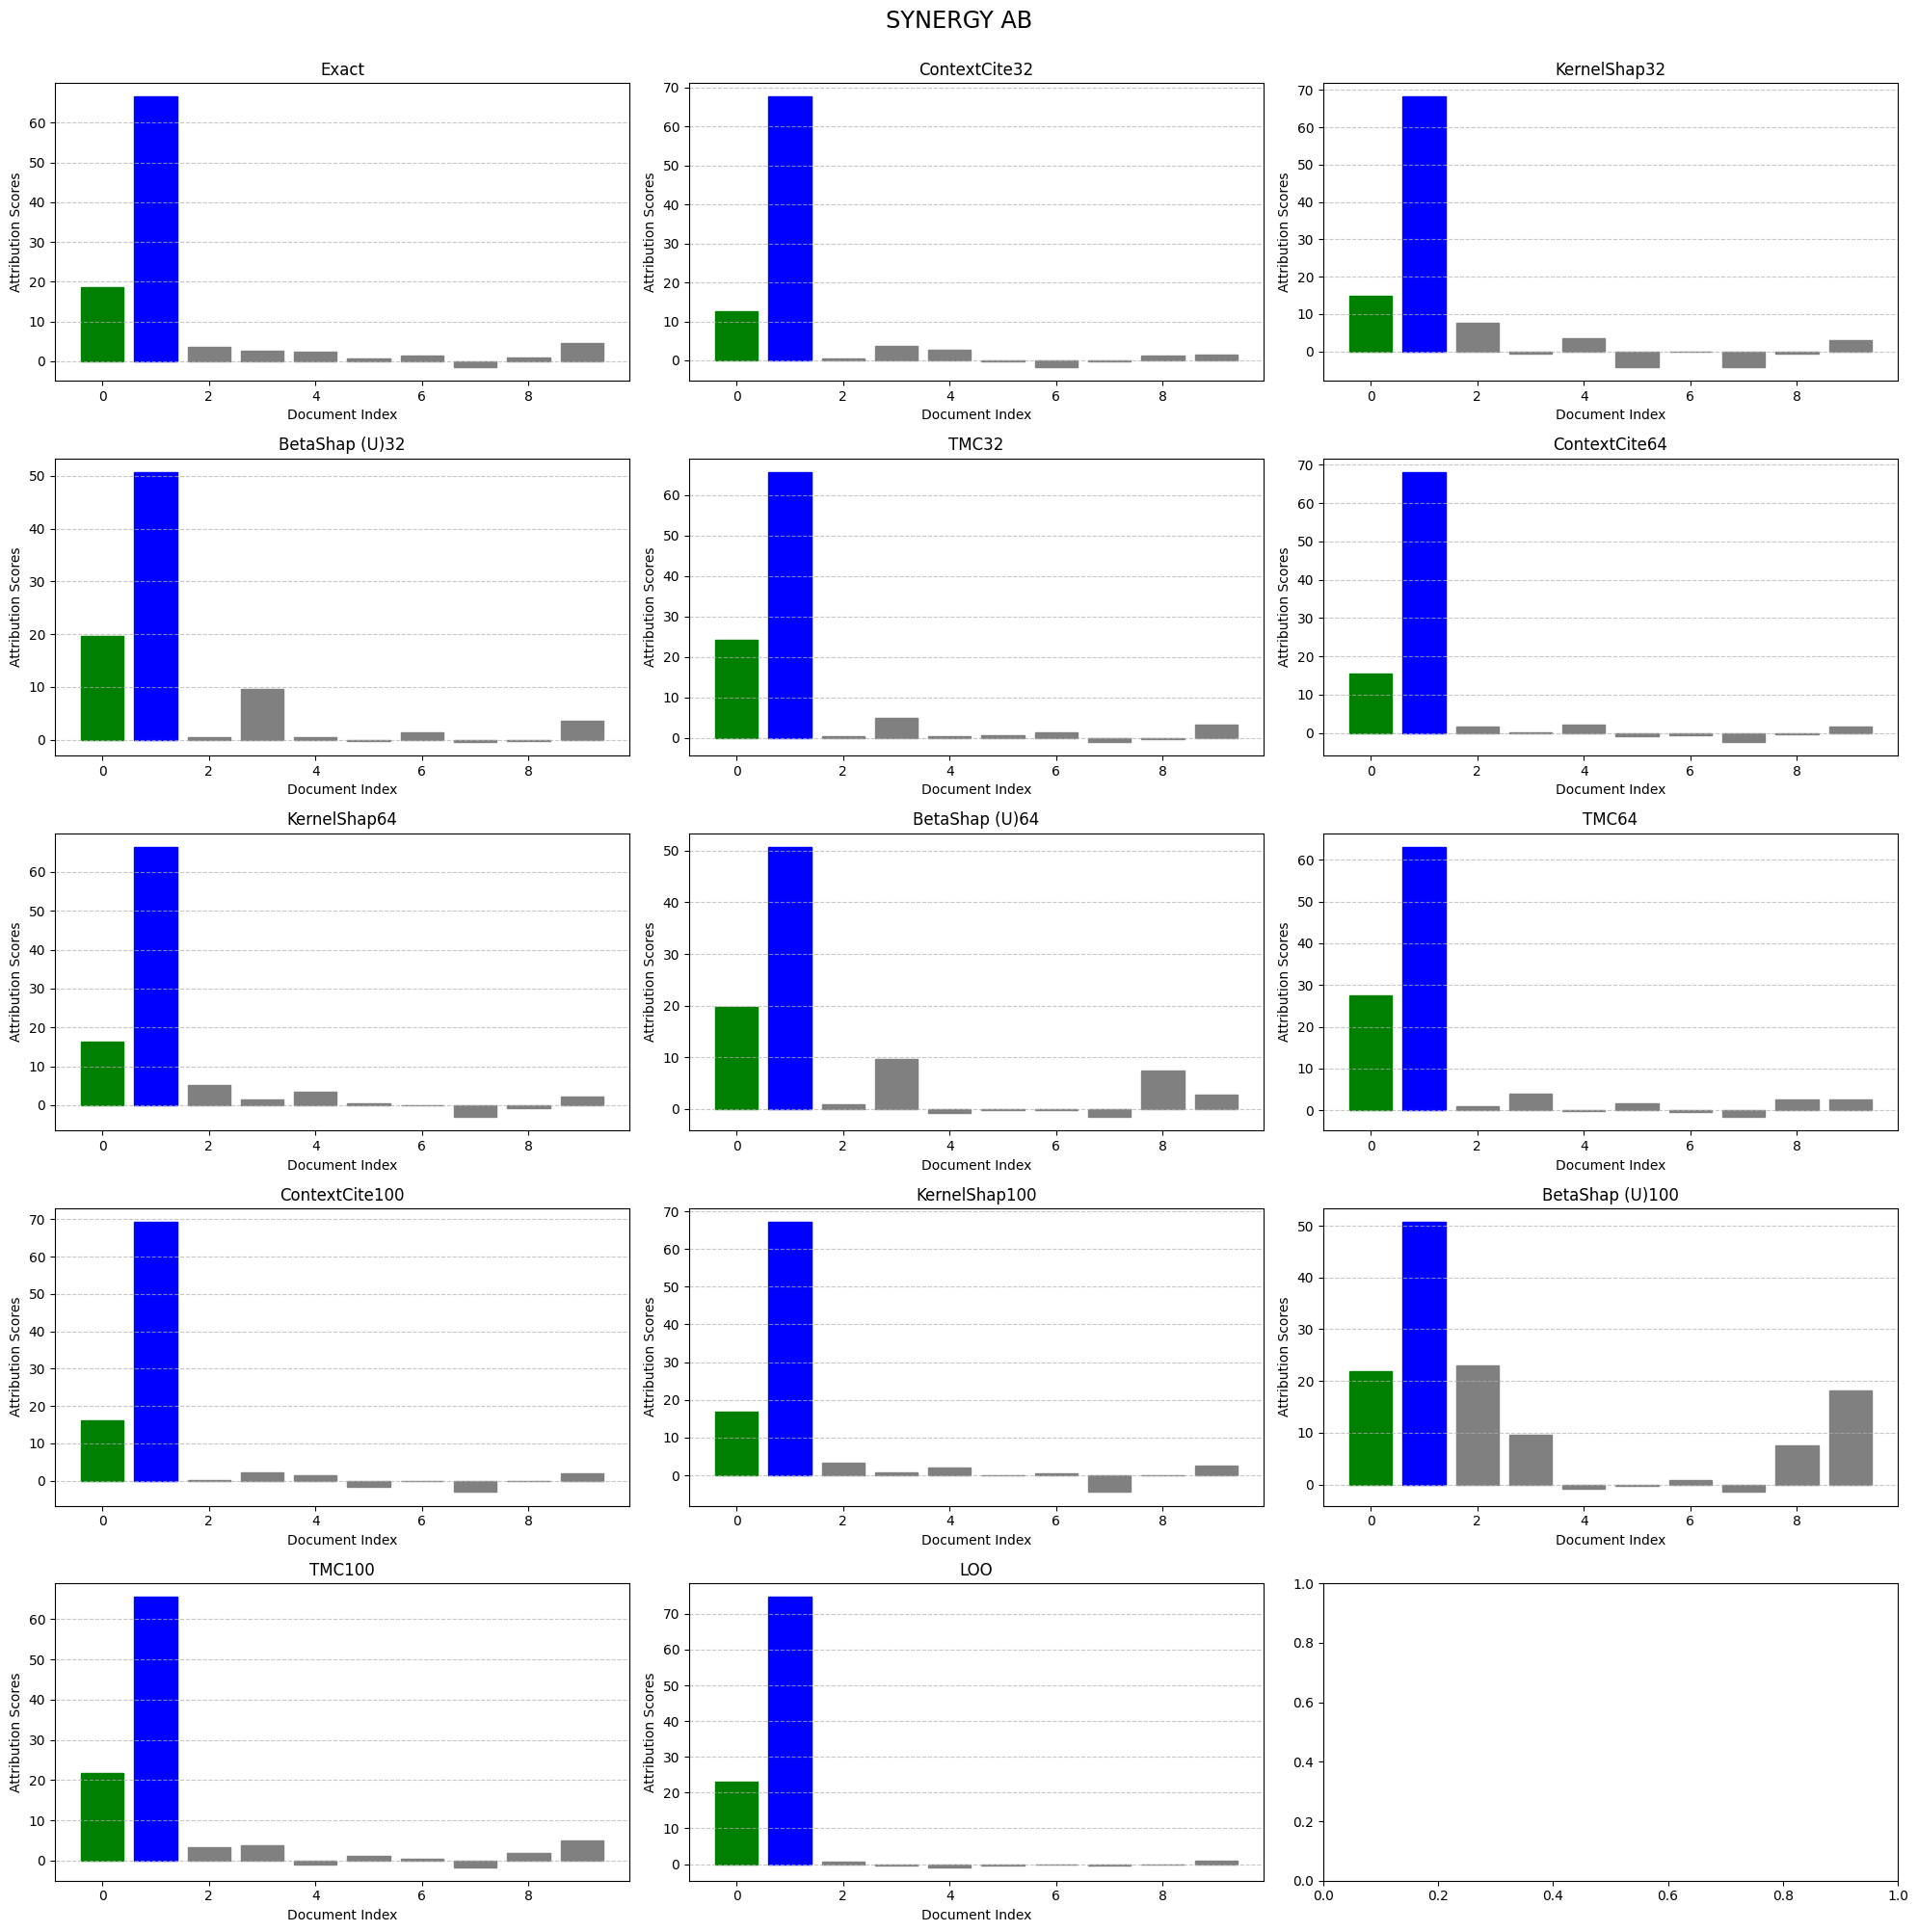

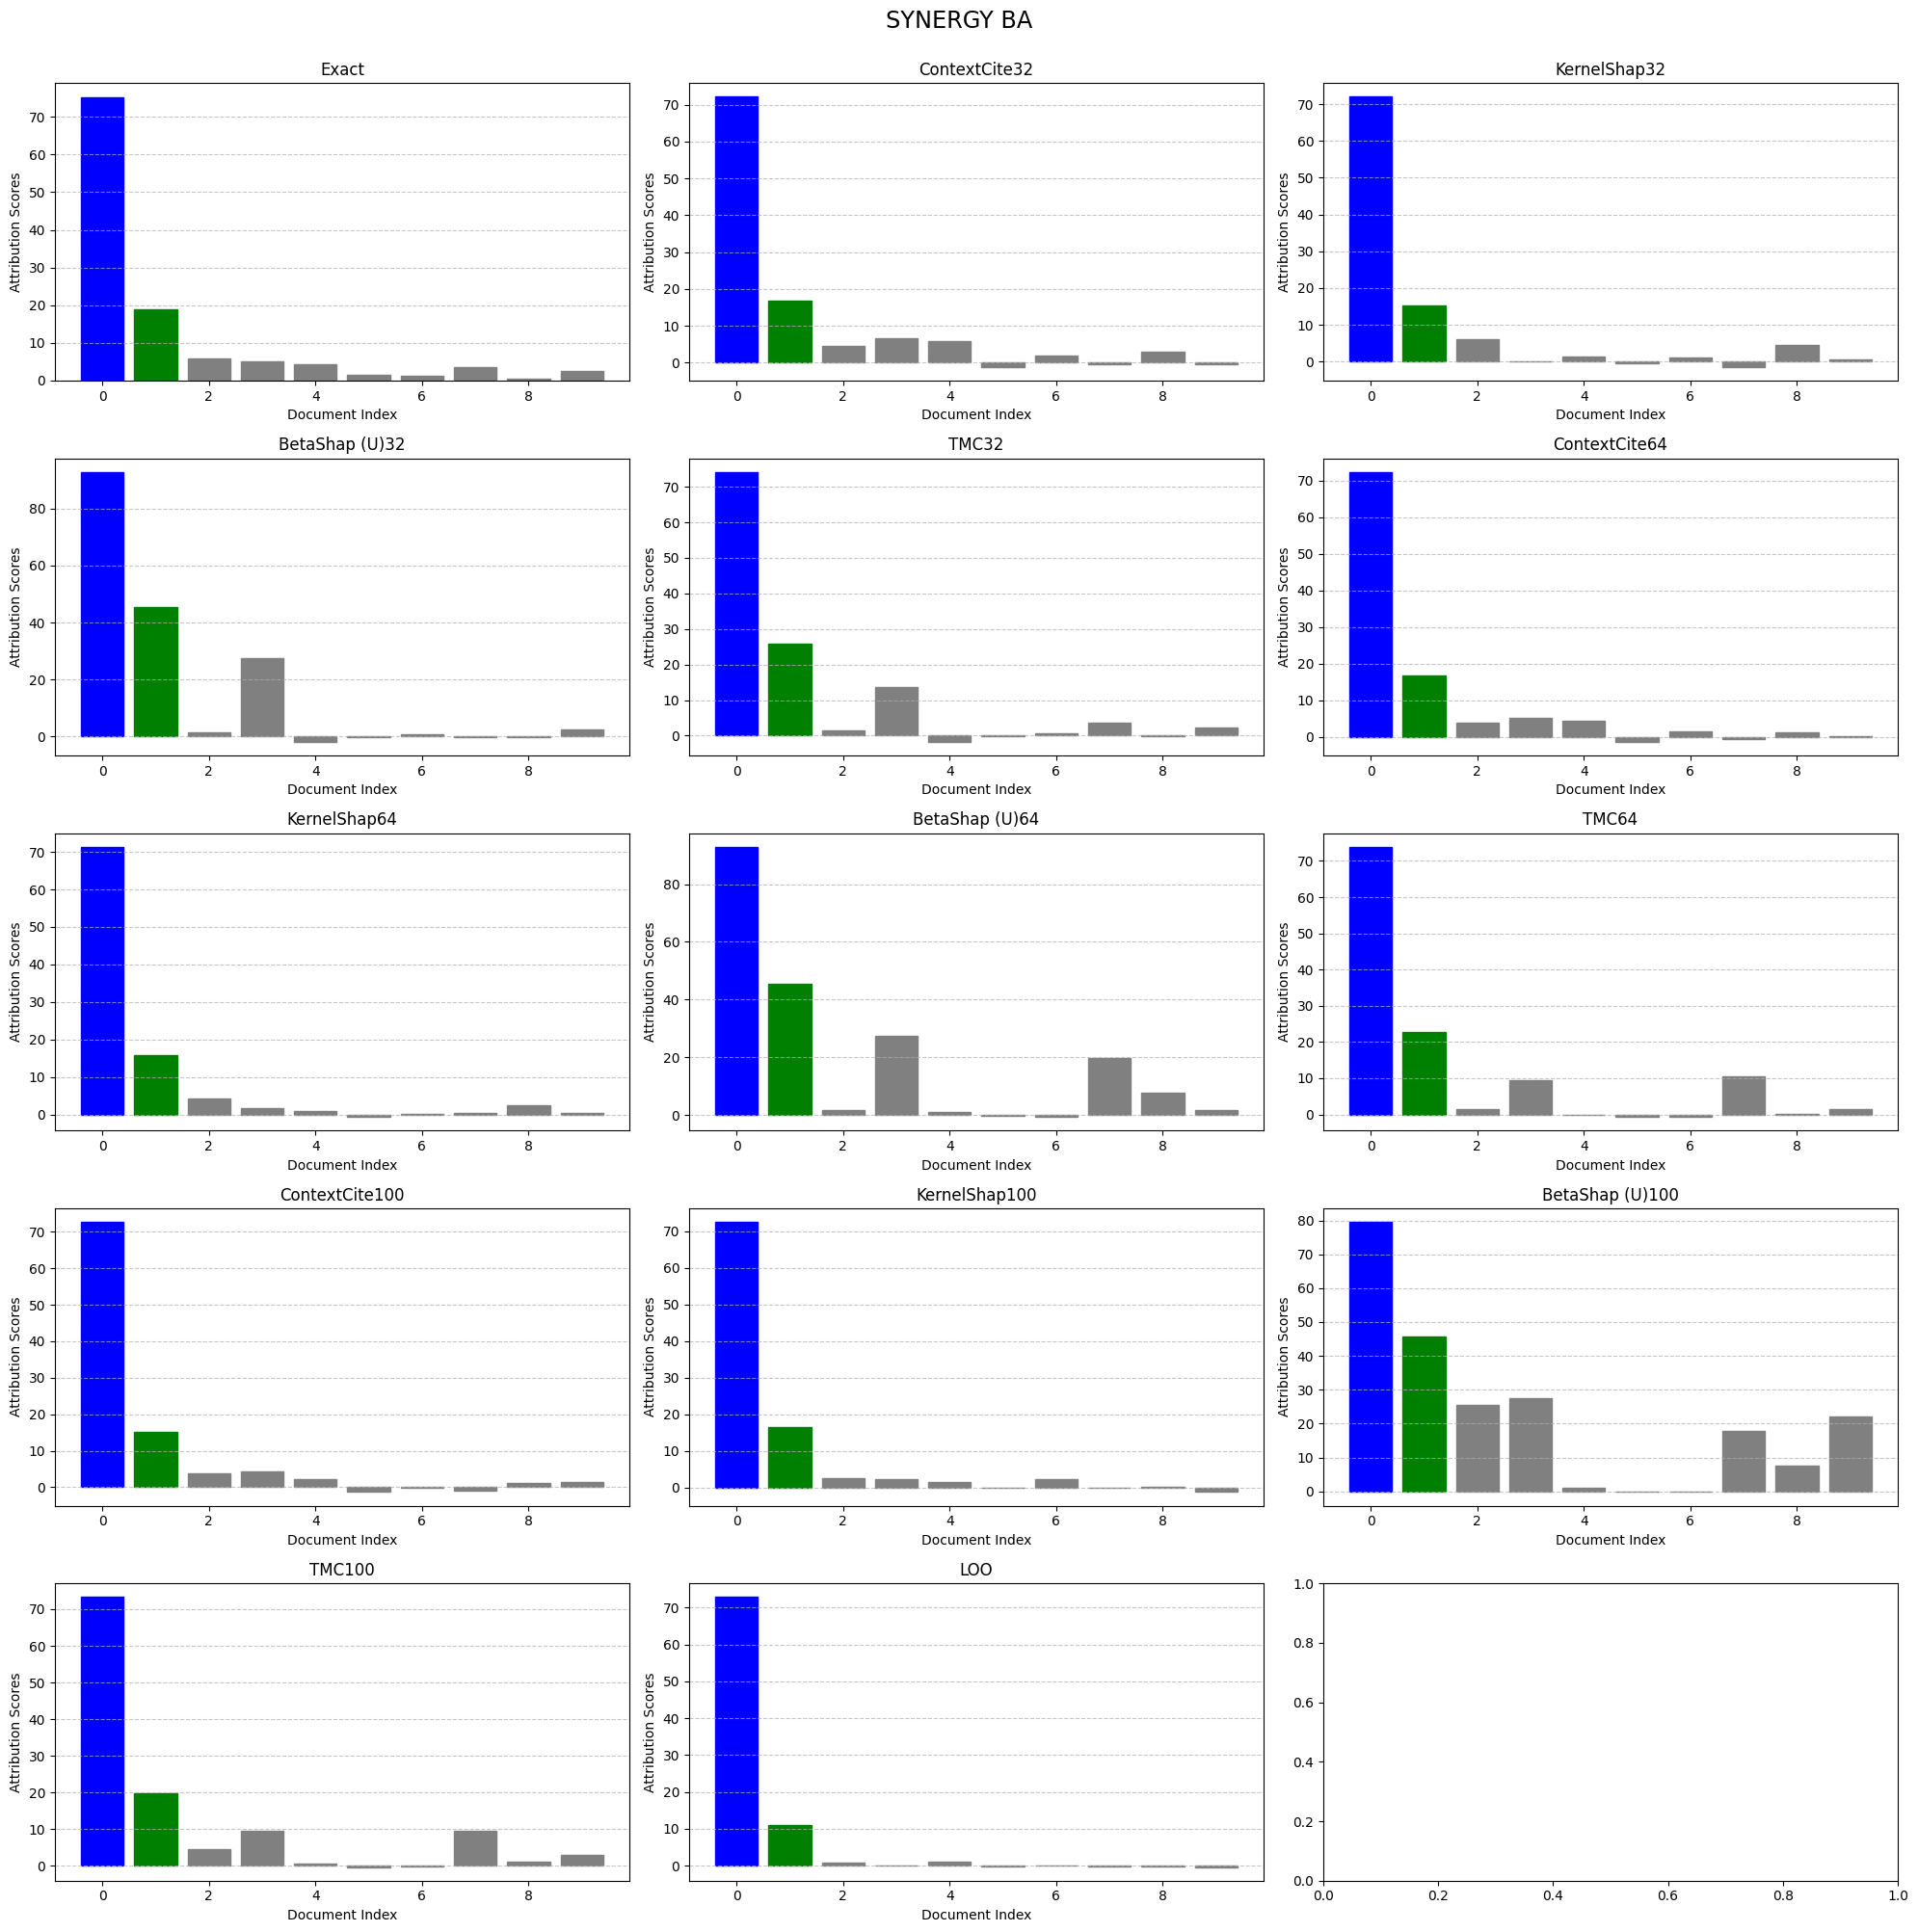

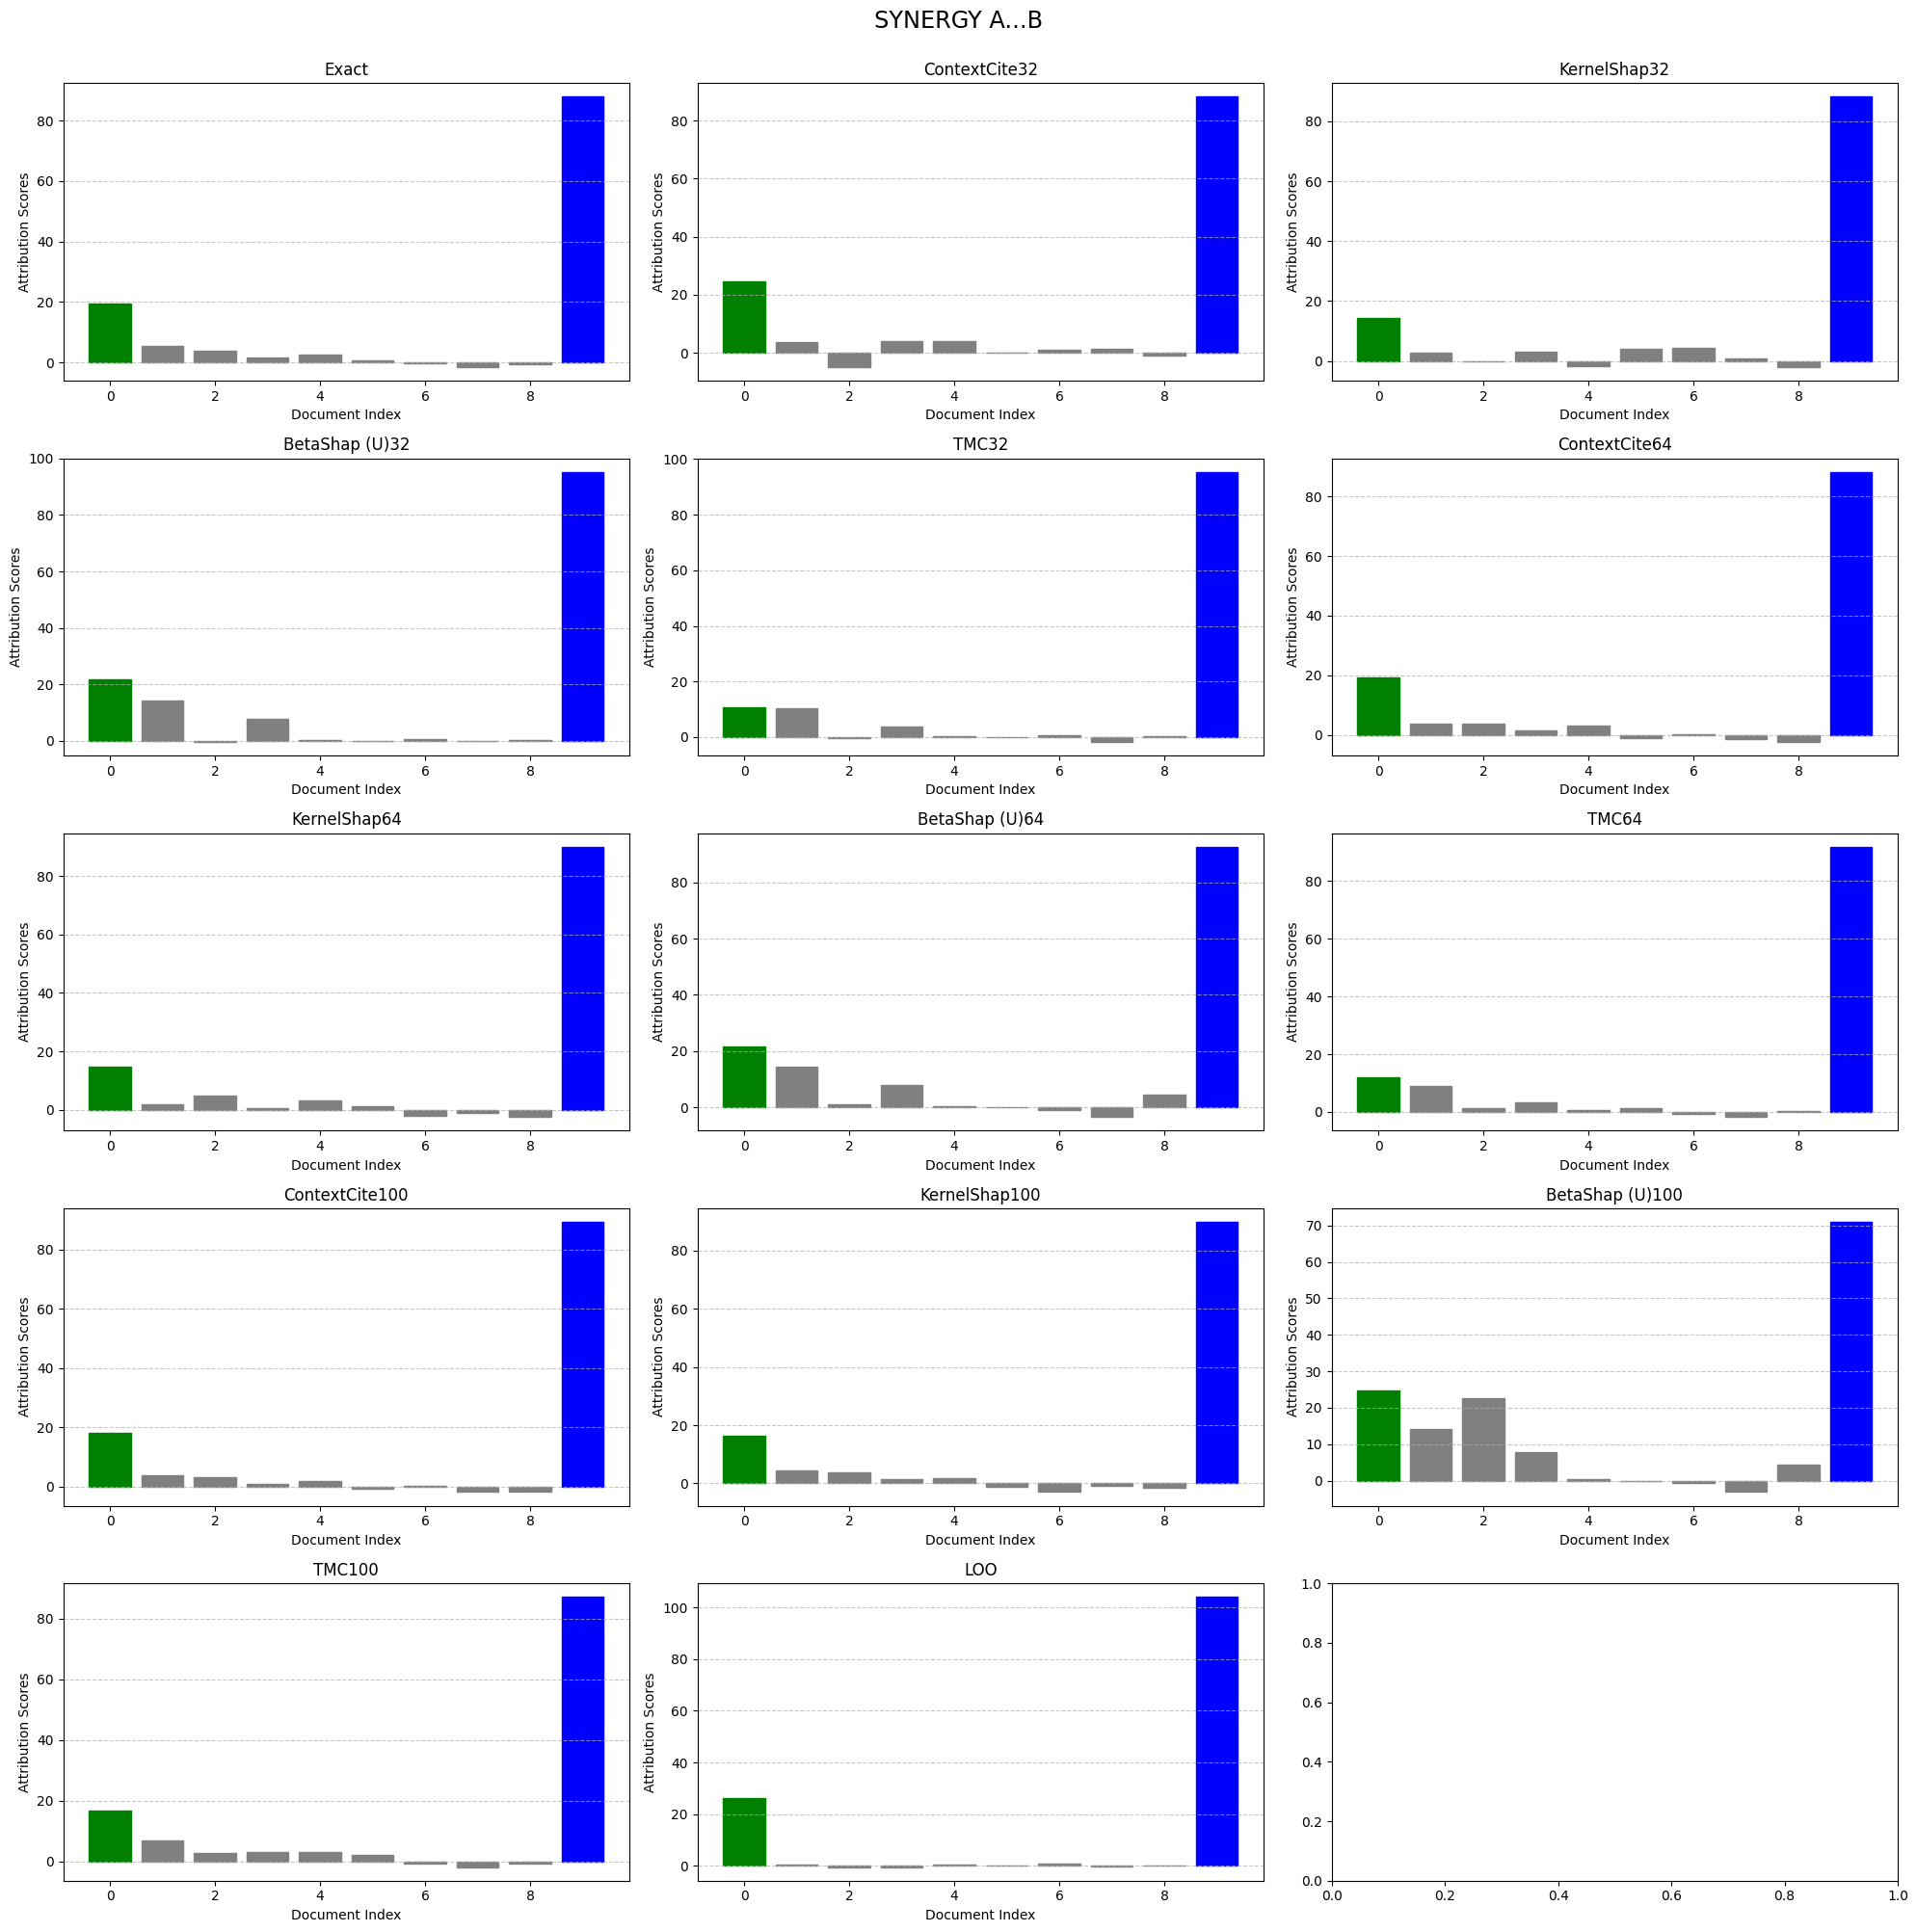

In [41]:
# embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
# for dataset_type in ["inverse_duplicate", "inverse_complementary", "inverse_synergy"] :
#     # df, scores_agg = load_and_process(dataset_type)
#     # df["similarity_score"] = df.apply(lambda row: compute_cosine_similarity(row, embedding_model=embedding_model), axis = 1)
#     print(df.shape)
for i in range(df.shape[0]):
    plot_scoring_per_query(scores_agg[i], query_id=i, dataset=df)

In [ ]:
# plt.figure(figsize = (15, 15))

# categories = scores[0]

# for i, cat in enumerate(categories) :
#     # plt.subplot(1, 3, i+1)
#     sns.histplot(df_train[df_train.salary_category == cat]["feature_2"],
#                 bins = 30,
#                 kde = True,
#                 element="step",
#                 fill = False,
#                 label =  f"Category {cat}"
#                 )
# plt.title(f"feature_2 for salary category")
# plt.xlabel("feature_2")
# x = np.linspace(0.35, 1, 50)
# plt.xticks(np.linspace(x.min(), x.max(), 50), rotation=45, ha='right')
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.ylabel("Count")
# plt.legend(title="Category")
# plt.tight_layout()